# import & load data

In [1]:
%run imports_N_loadData.ipynb

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load&process Synthetic data===========================
len(ground_truth_synthetic): 45
---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_df_synthetic) 3519
len(rate_df_synthetic) 95
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_measure_denoised) 29813
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


In [2]:
pressure_measure=pressure_measure_denoised
pressure_time=pressure_time_denoised
ground_truth=ground_truth_denoised
pressure_df=pressure_df_denoised
rate_df=rate_df_denoised
colum_names=colum_names_denoised
data_inOneRow=data_inOneRow_denoised

# detect with maximum first order derivative

In [3]:
points=[[index for index in range(len(pressure_measure))]]
time_step=1
%run detect_useMaxFirstDerivative.ipynb

'len(buildUp_df): 29813,len(buildUp_max_FOD): 3599'
===============output==================
Max_FOD


# Filter use Delta Tangent 

In [4]:
time_halfWindow=0.2
point_halfWindow=None
polynomial_order=1
tangent_type="single_point"
# polynomial_order=3
# tangent_type="average"
deltaTangent_criterion=40
points=Max_FOD[0]
%run detect_useDeltaTangent.ipynb

start to predict using tangent...
-------calculate_Parameters_allCurve using 'polynomial' fitting
detect 68 buildups and 8 drawdowns 
===============output==================
'buildup_DT: 68,drawdown_DT: 8'


<Figure size 1440x720 with 0 Axes>

# plot & save

In [5]:
# txt=print_tuning_parameters(percentile_tuning,fine_tuning)
# txt+=txt+f"\ntime_halfWindow:{time_halfWindow}\n"
# pprint(txt)
txt=f"buildup:{len(buildup_DT)}, drawdown:{len(drawdown_DT)}"

---initializing...
---plotting...


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


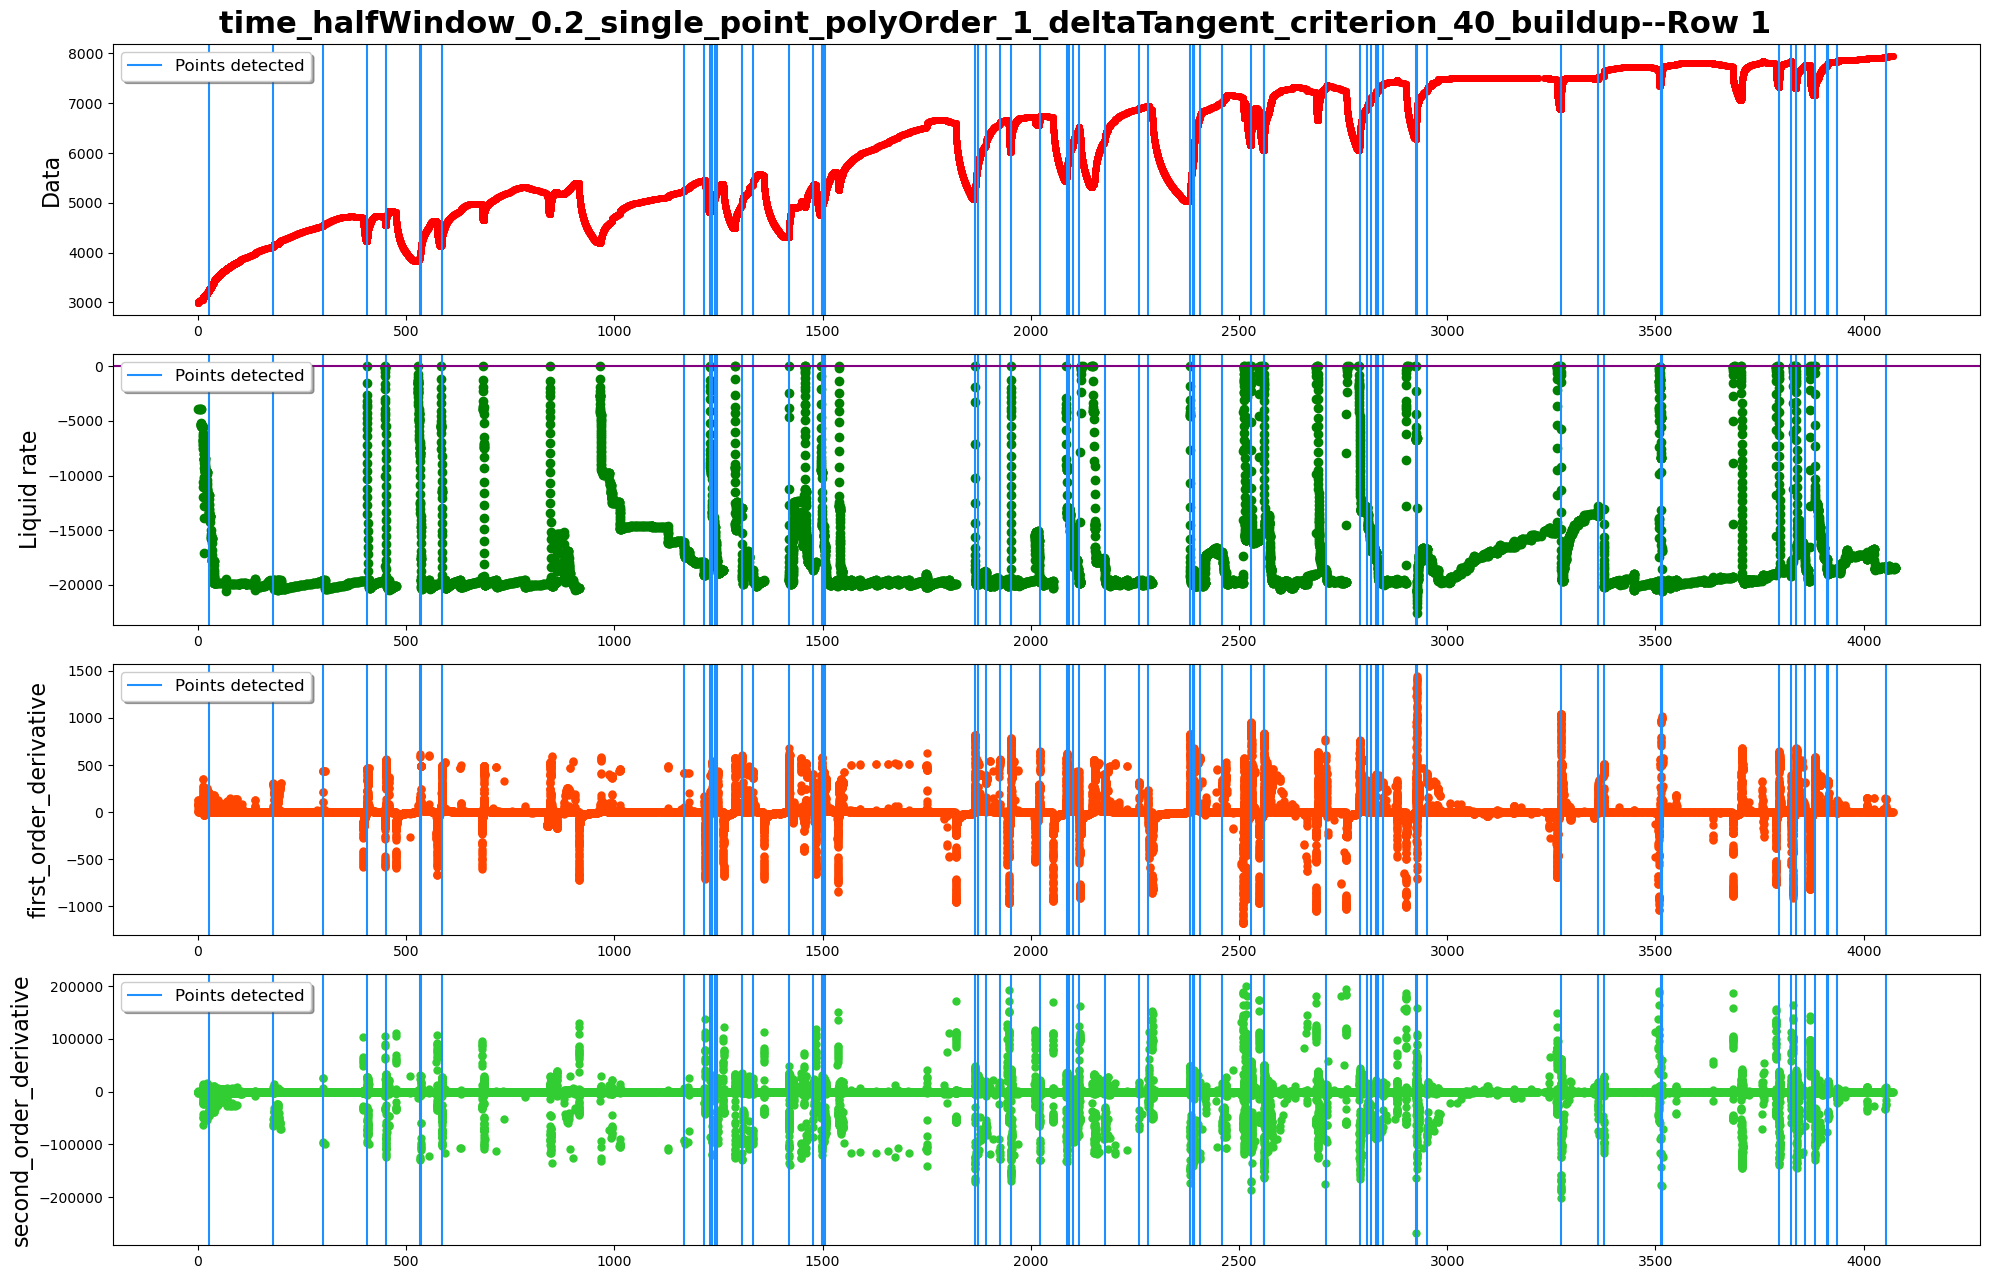

save whole....
detected 68 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[434]


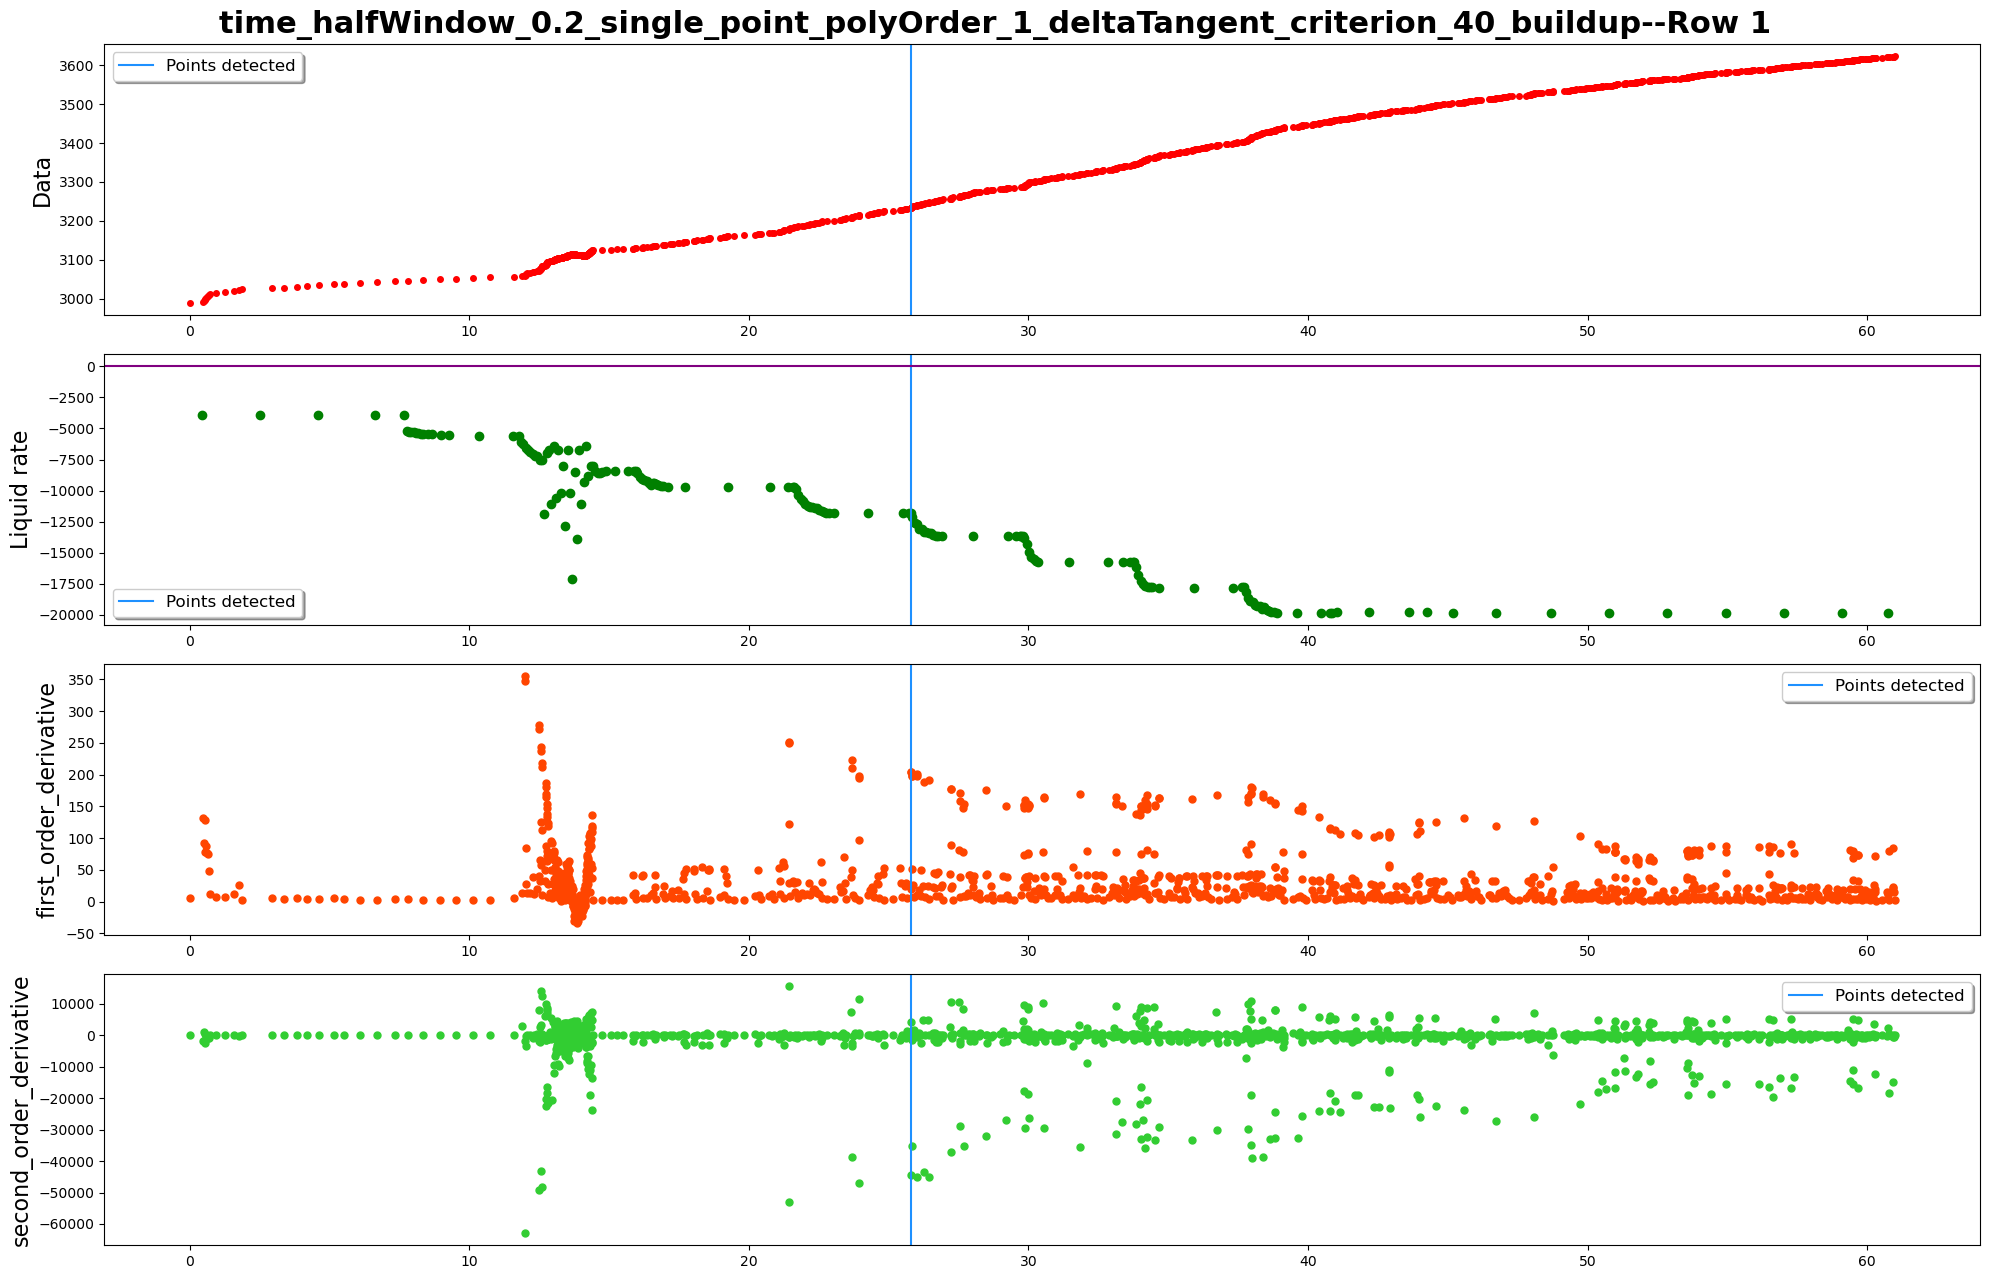

------row 2-----detected points:[1814, 2114]


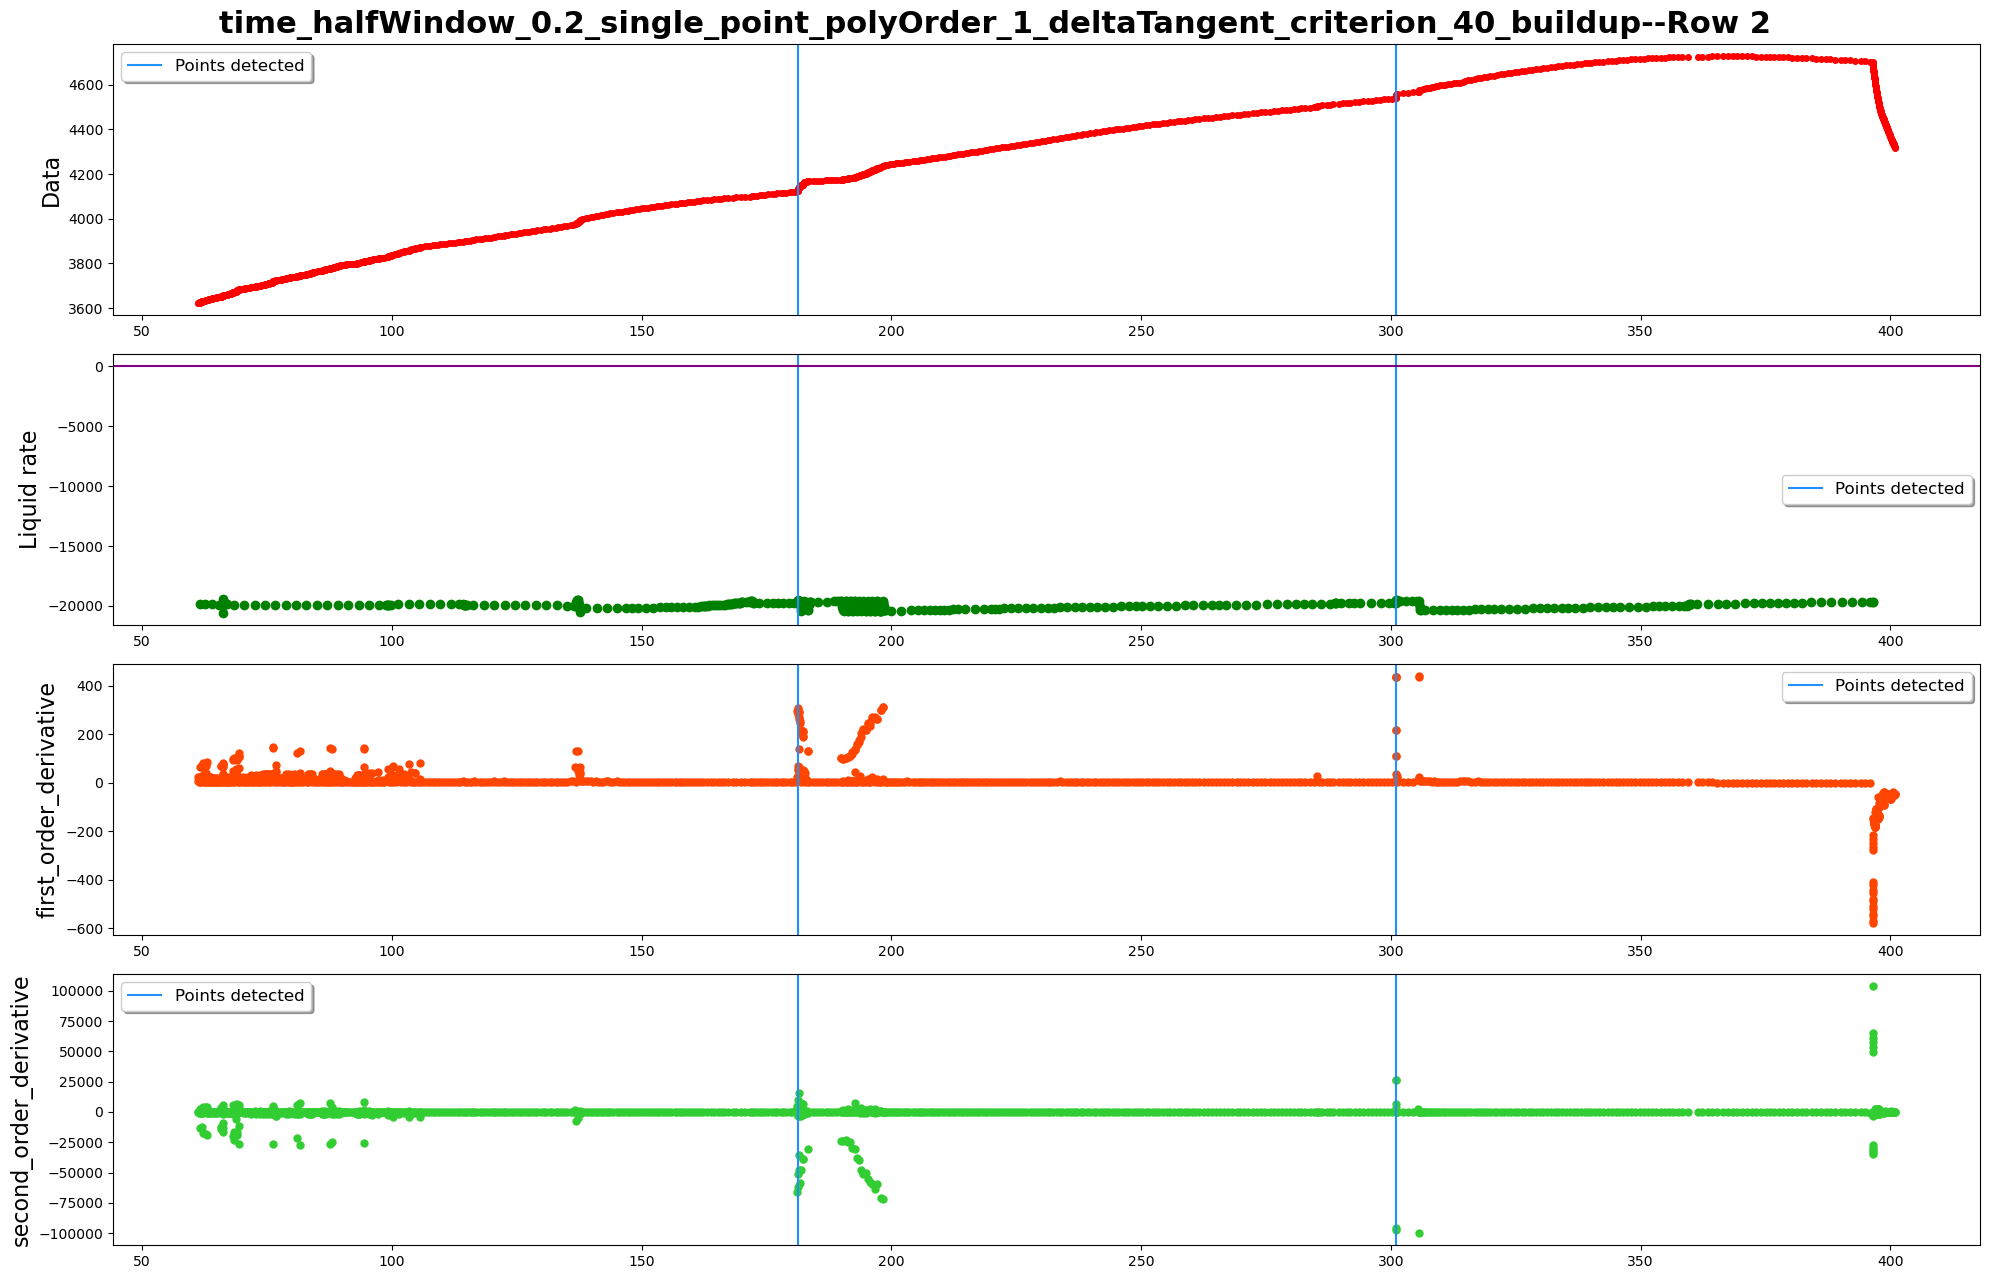

------row 3-----detected points:[2515, 2943]


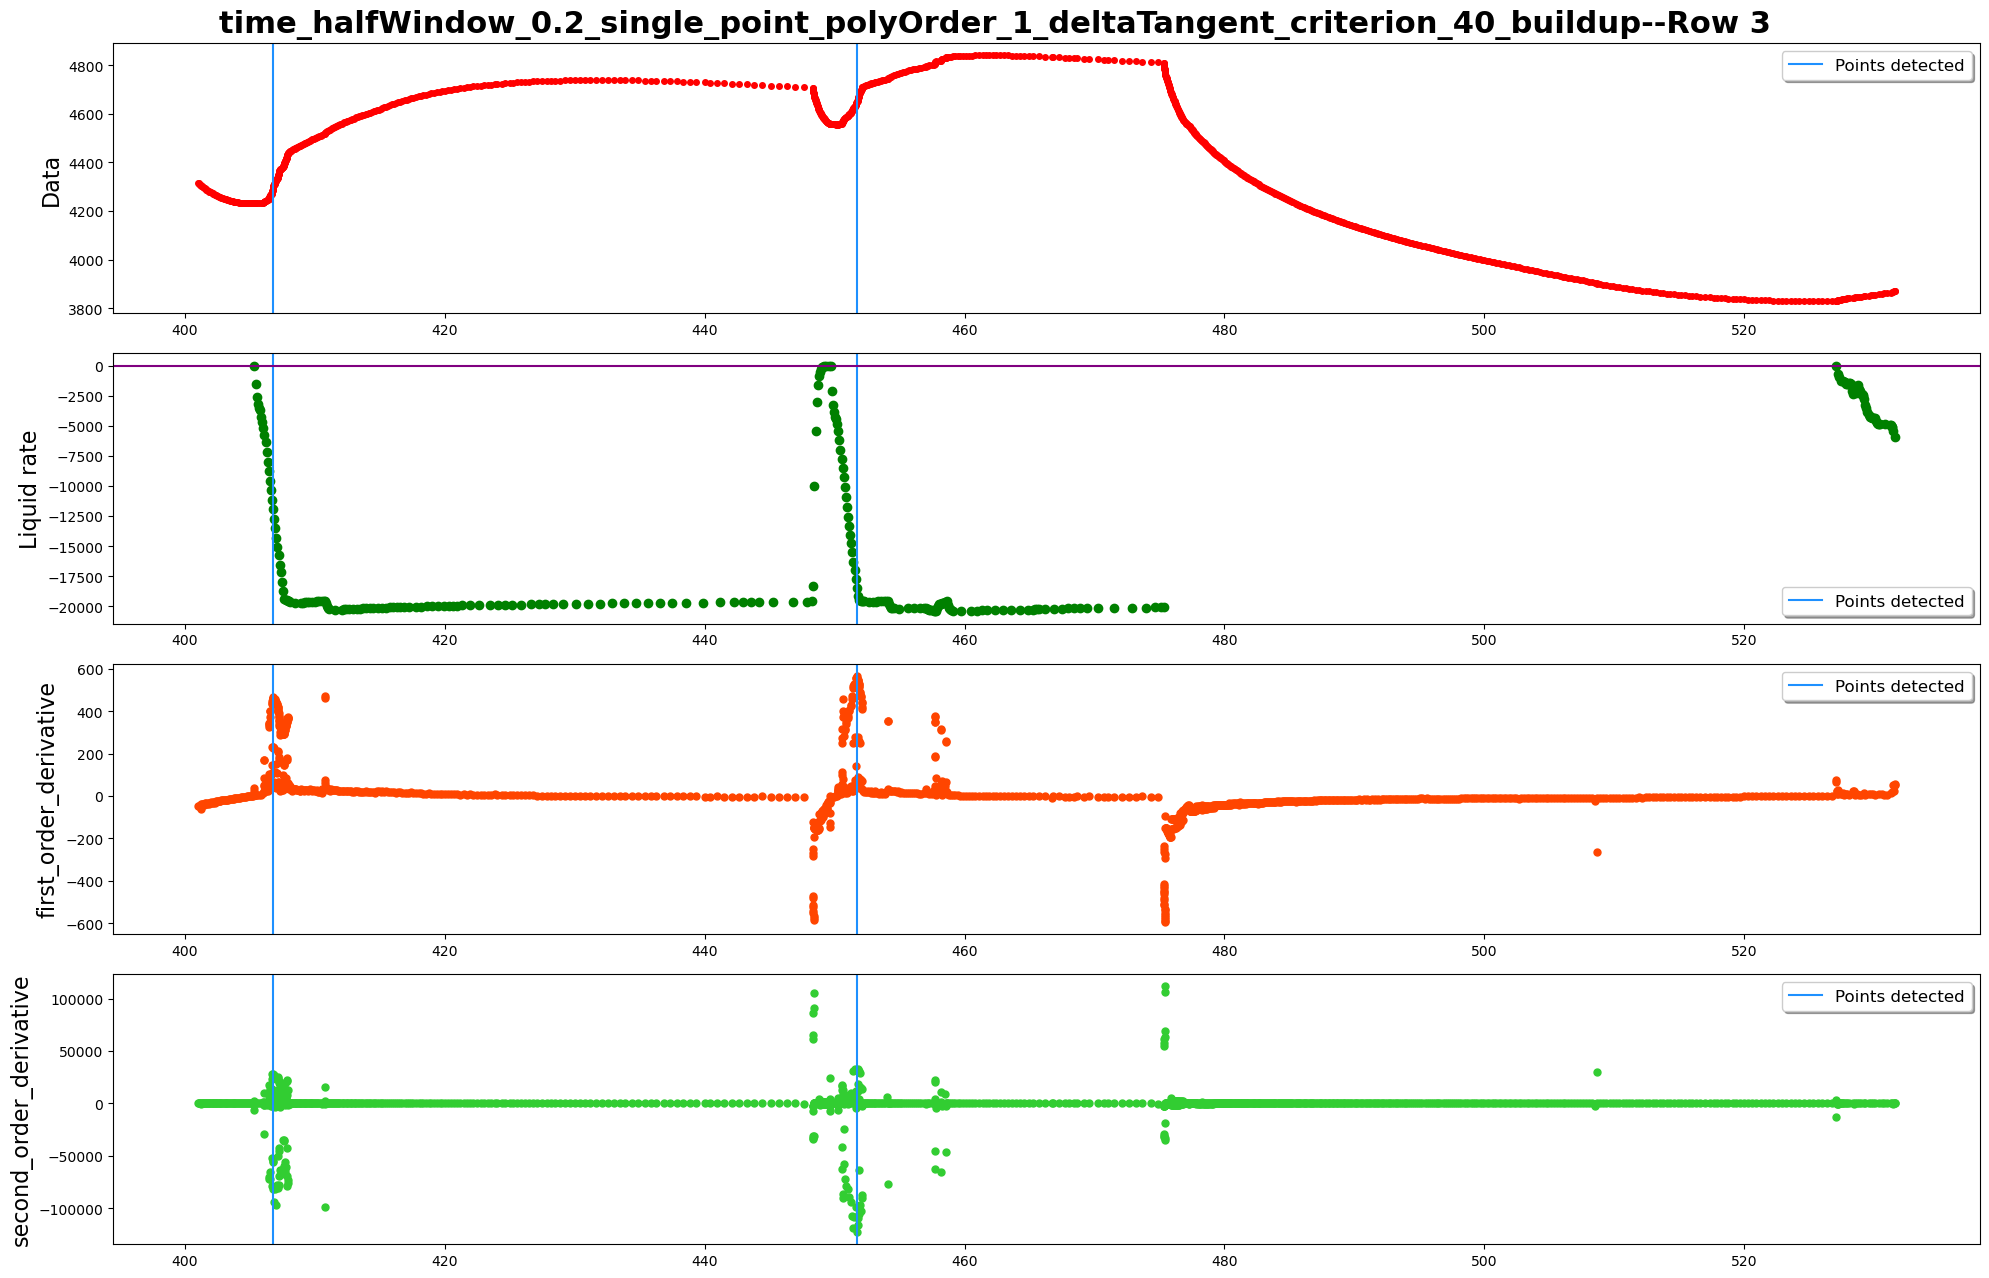

------row 4-----detected points:[3628, 3693, 4293]


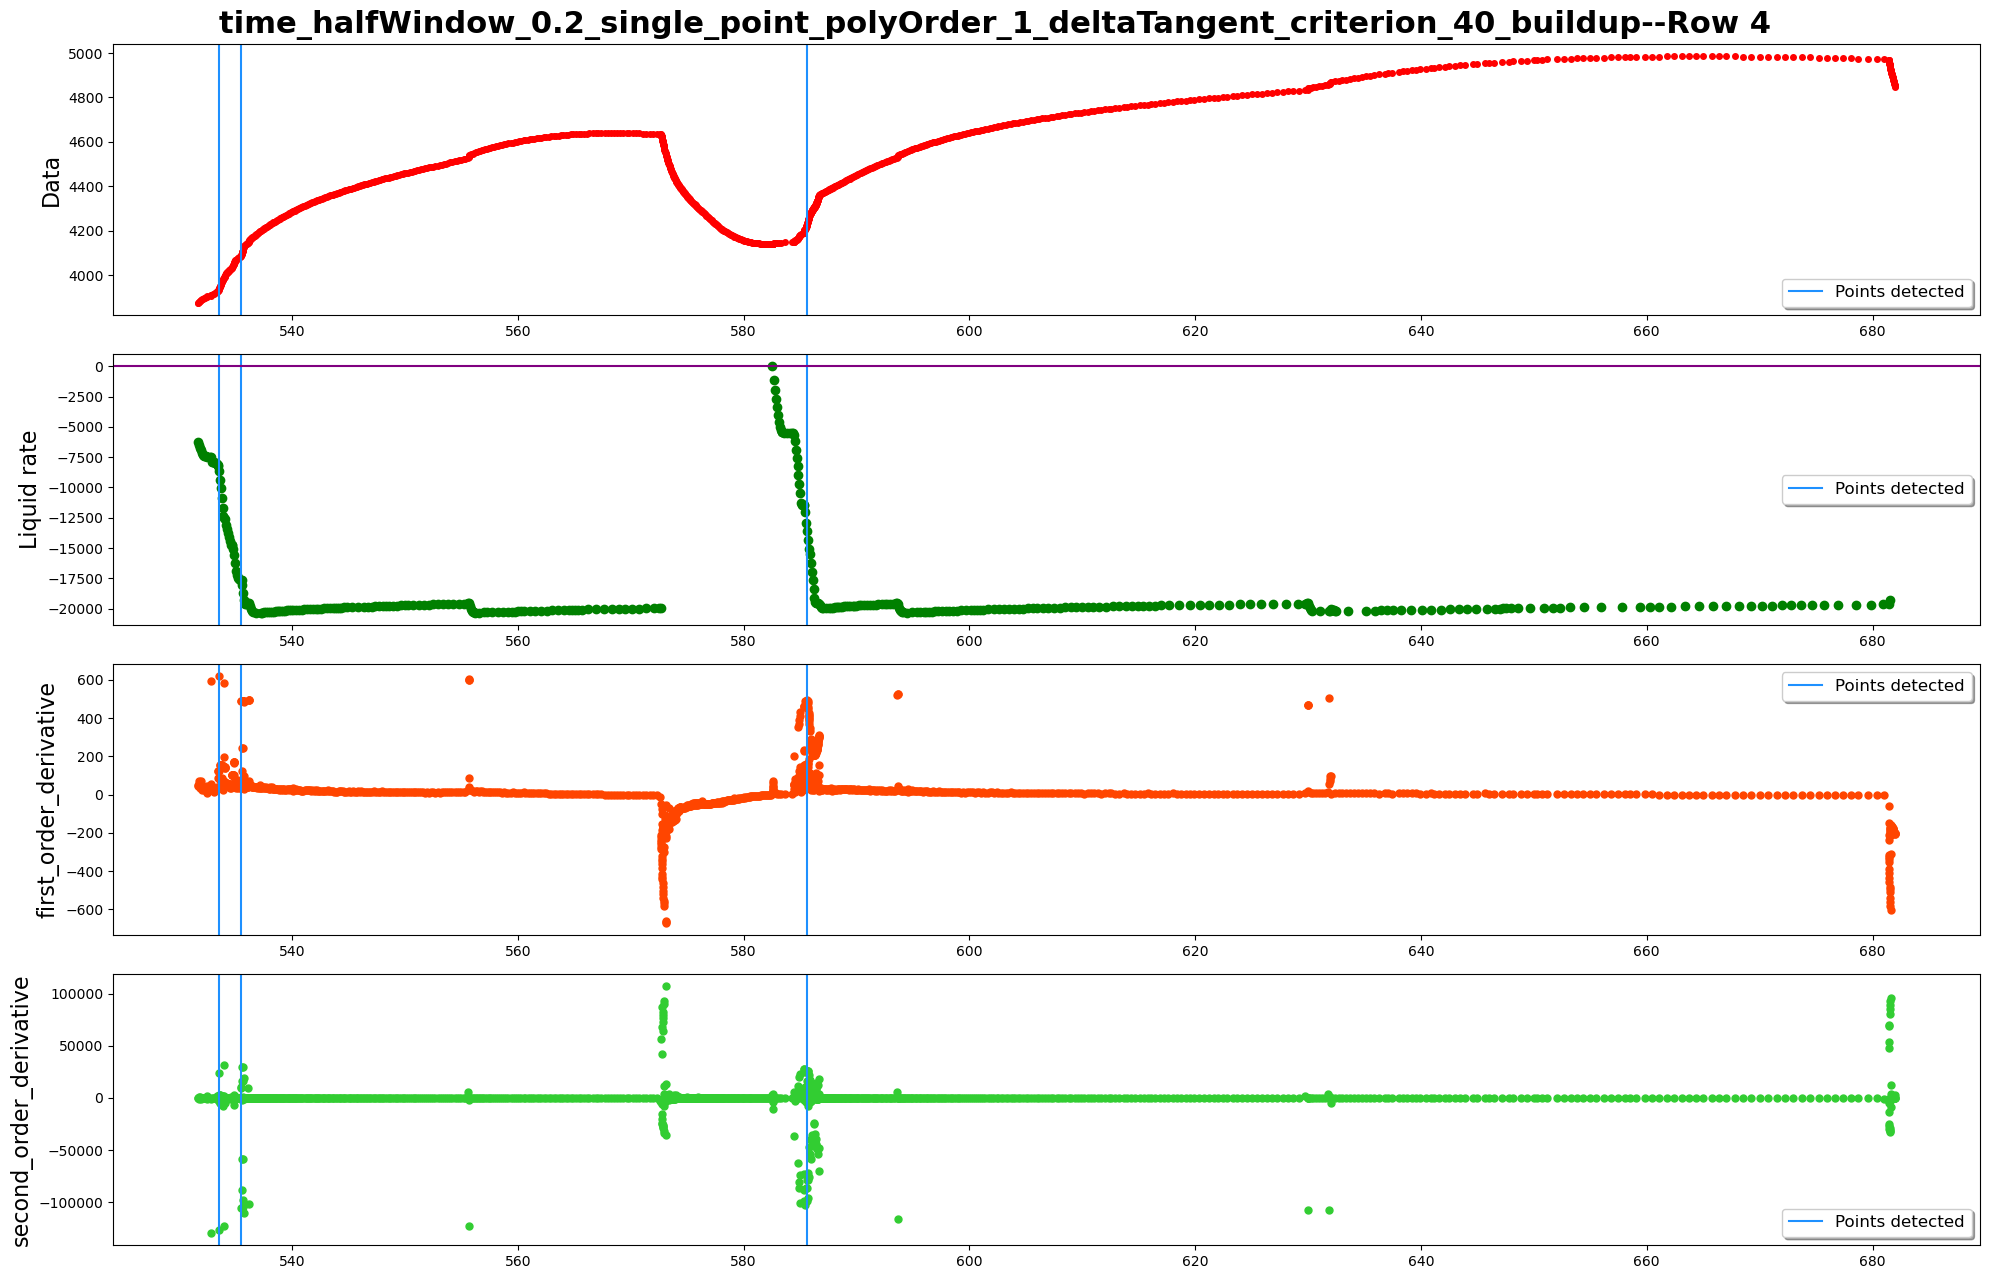

------row 5-----detected points:[]


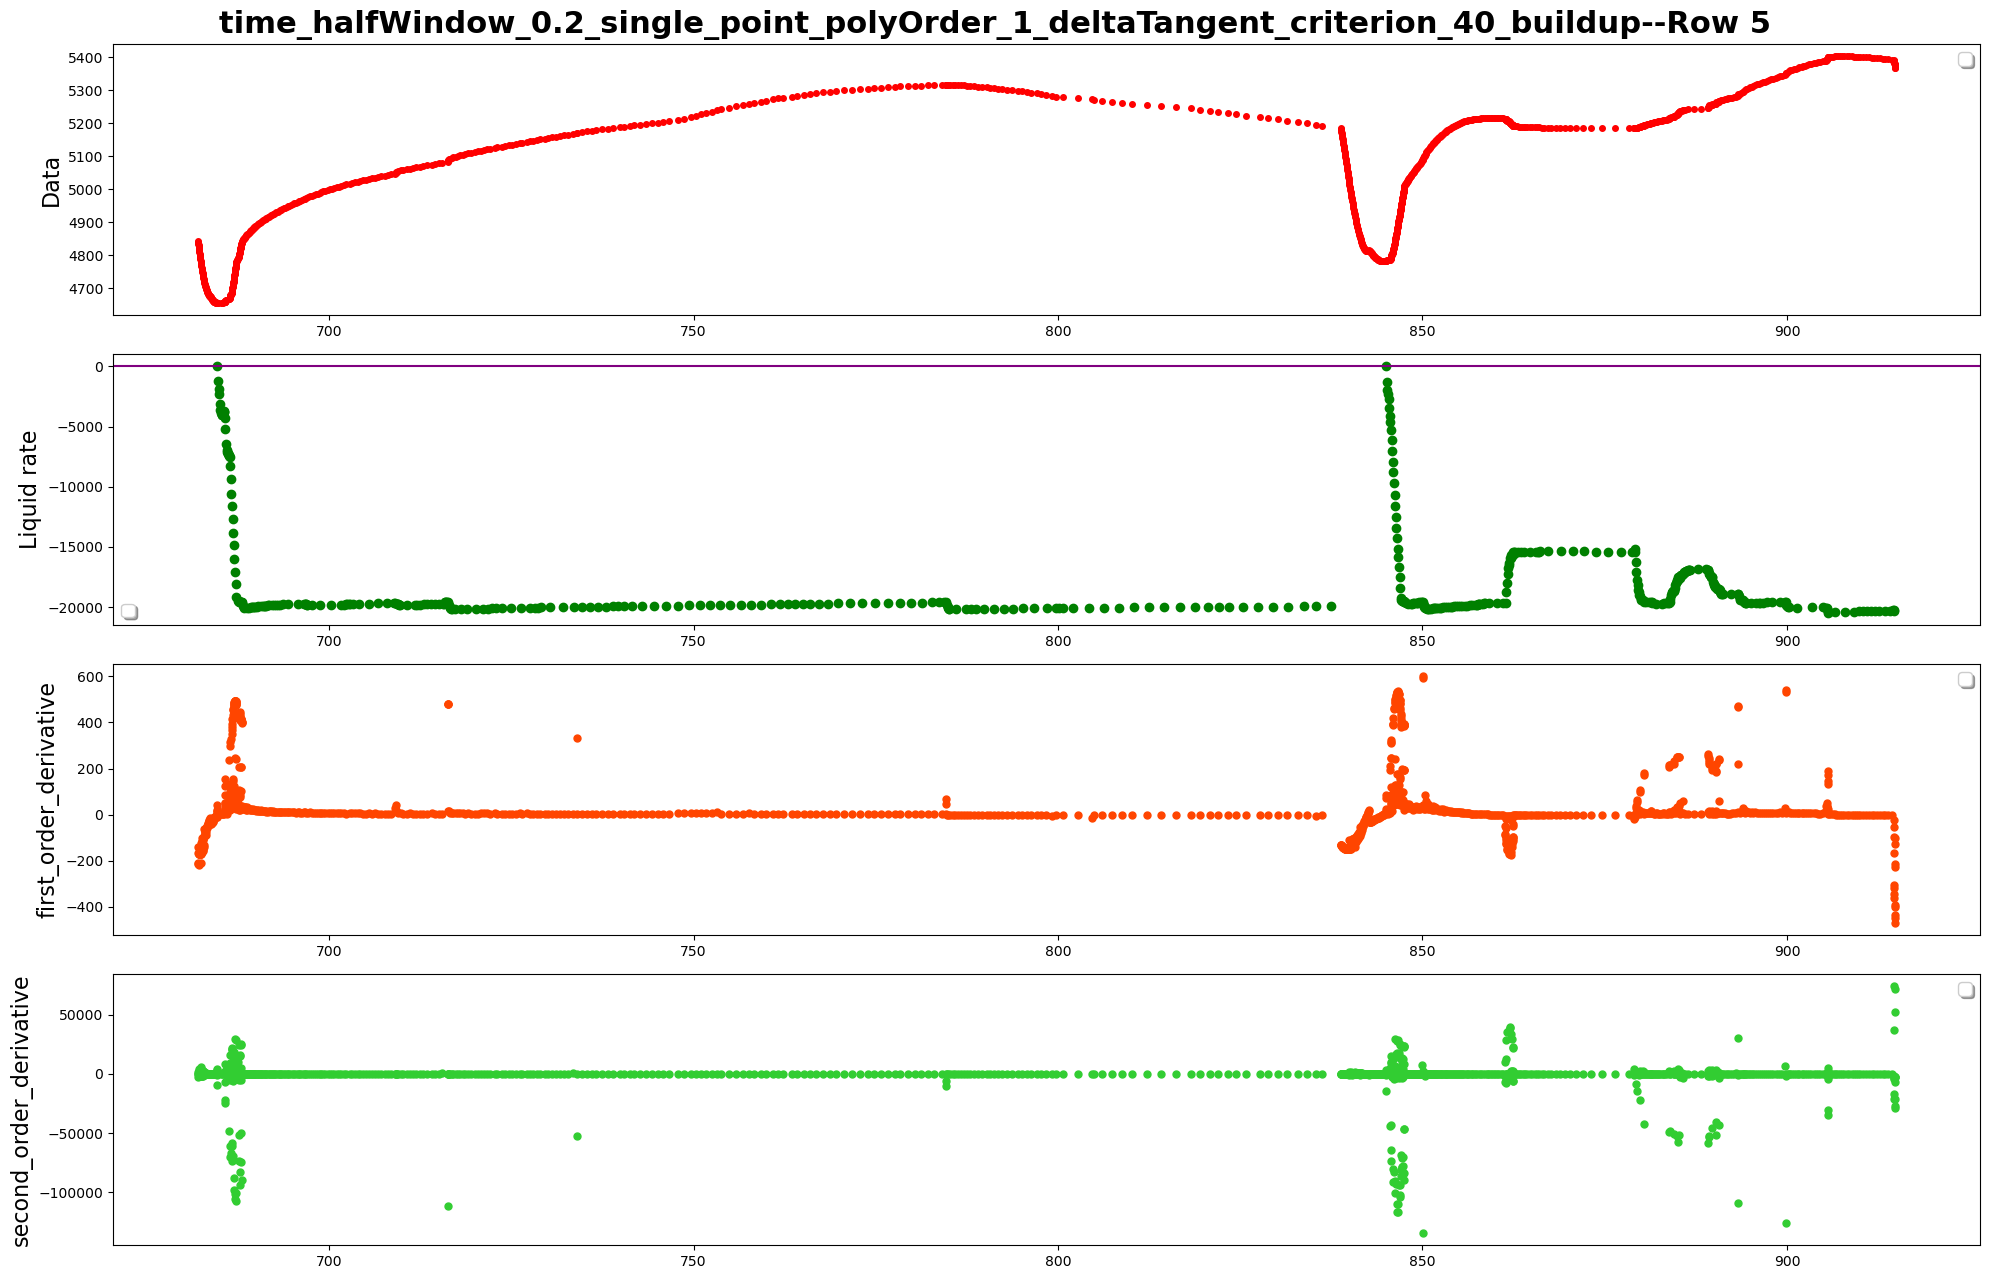

------row 6-----detected points:[7102]


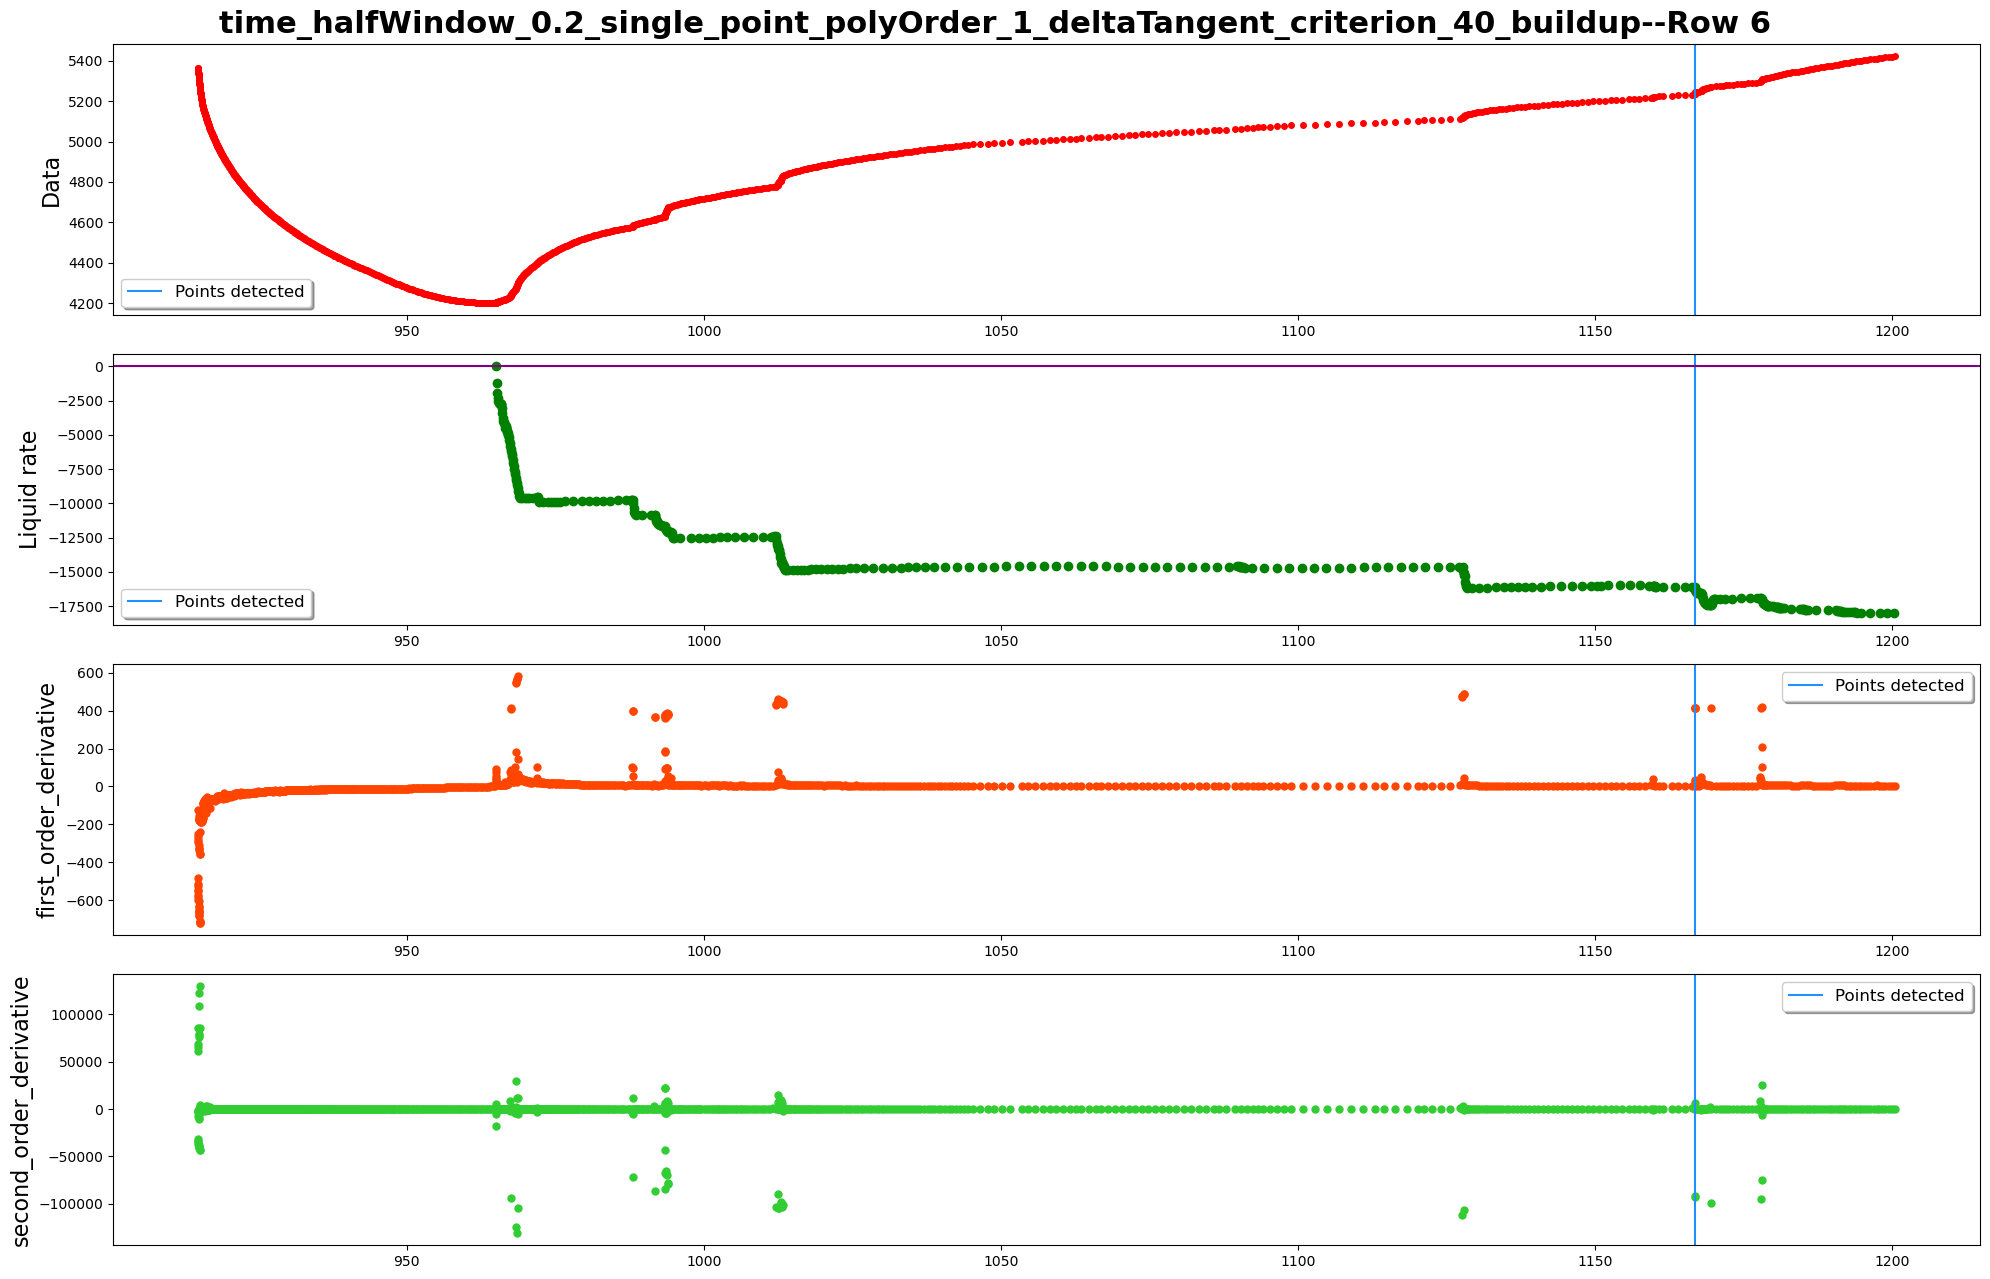

------row 7-----detected points:[7220, 7556, 7623, 7723, 7775, 7816]


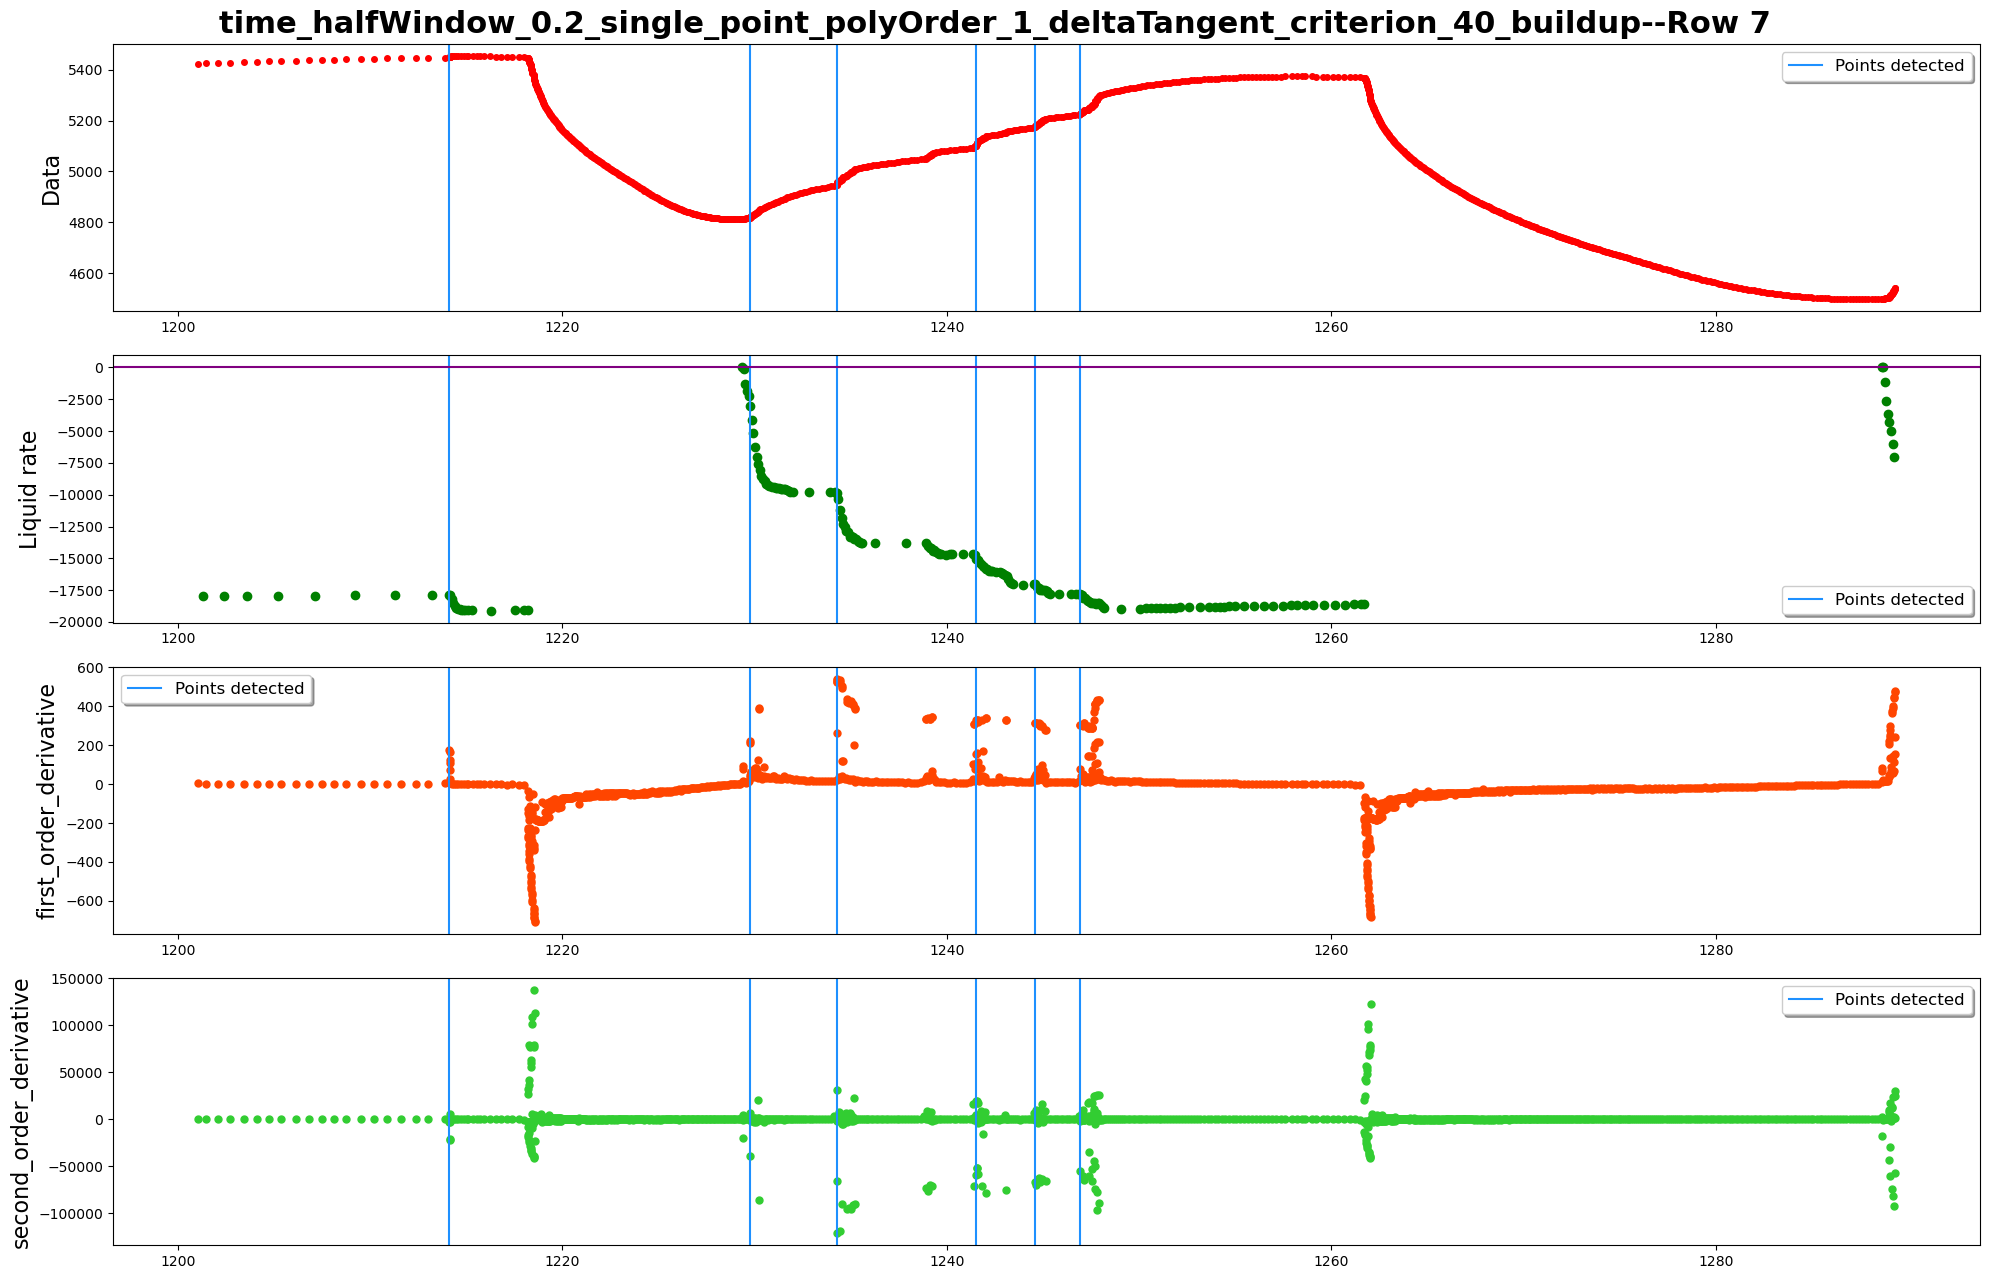

------row 8-----detected points:[8601, 8874]


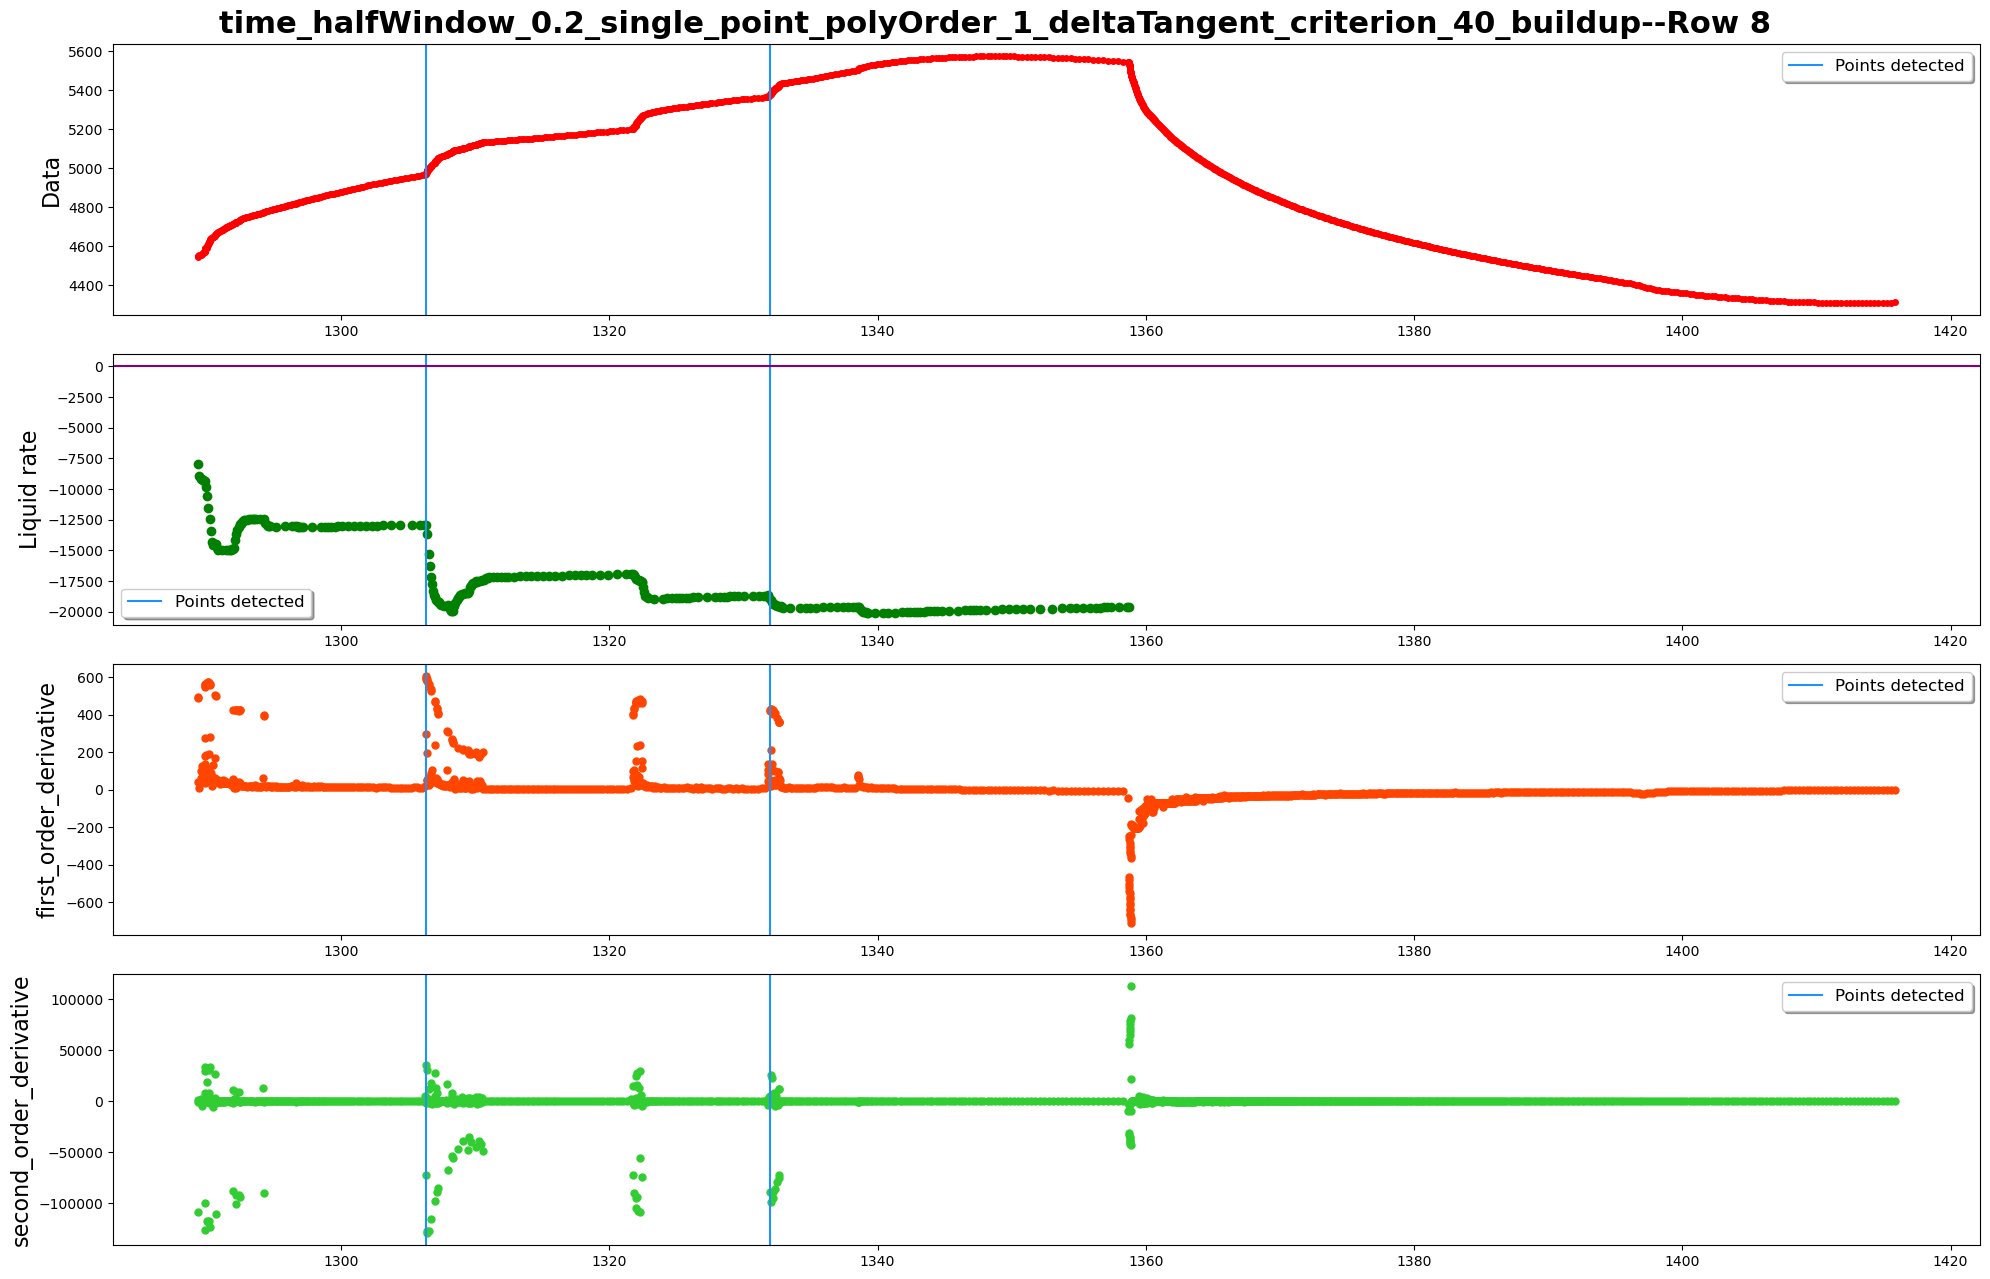

------row 9-----detected points:[9726, 10466]


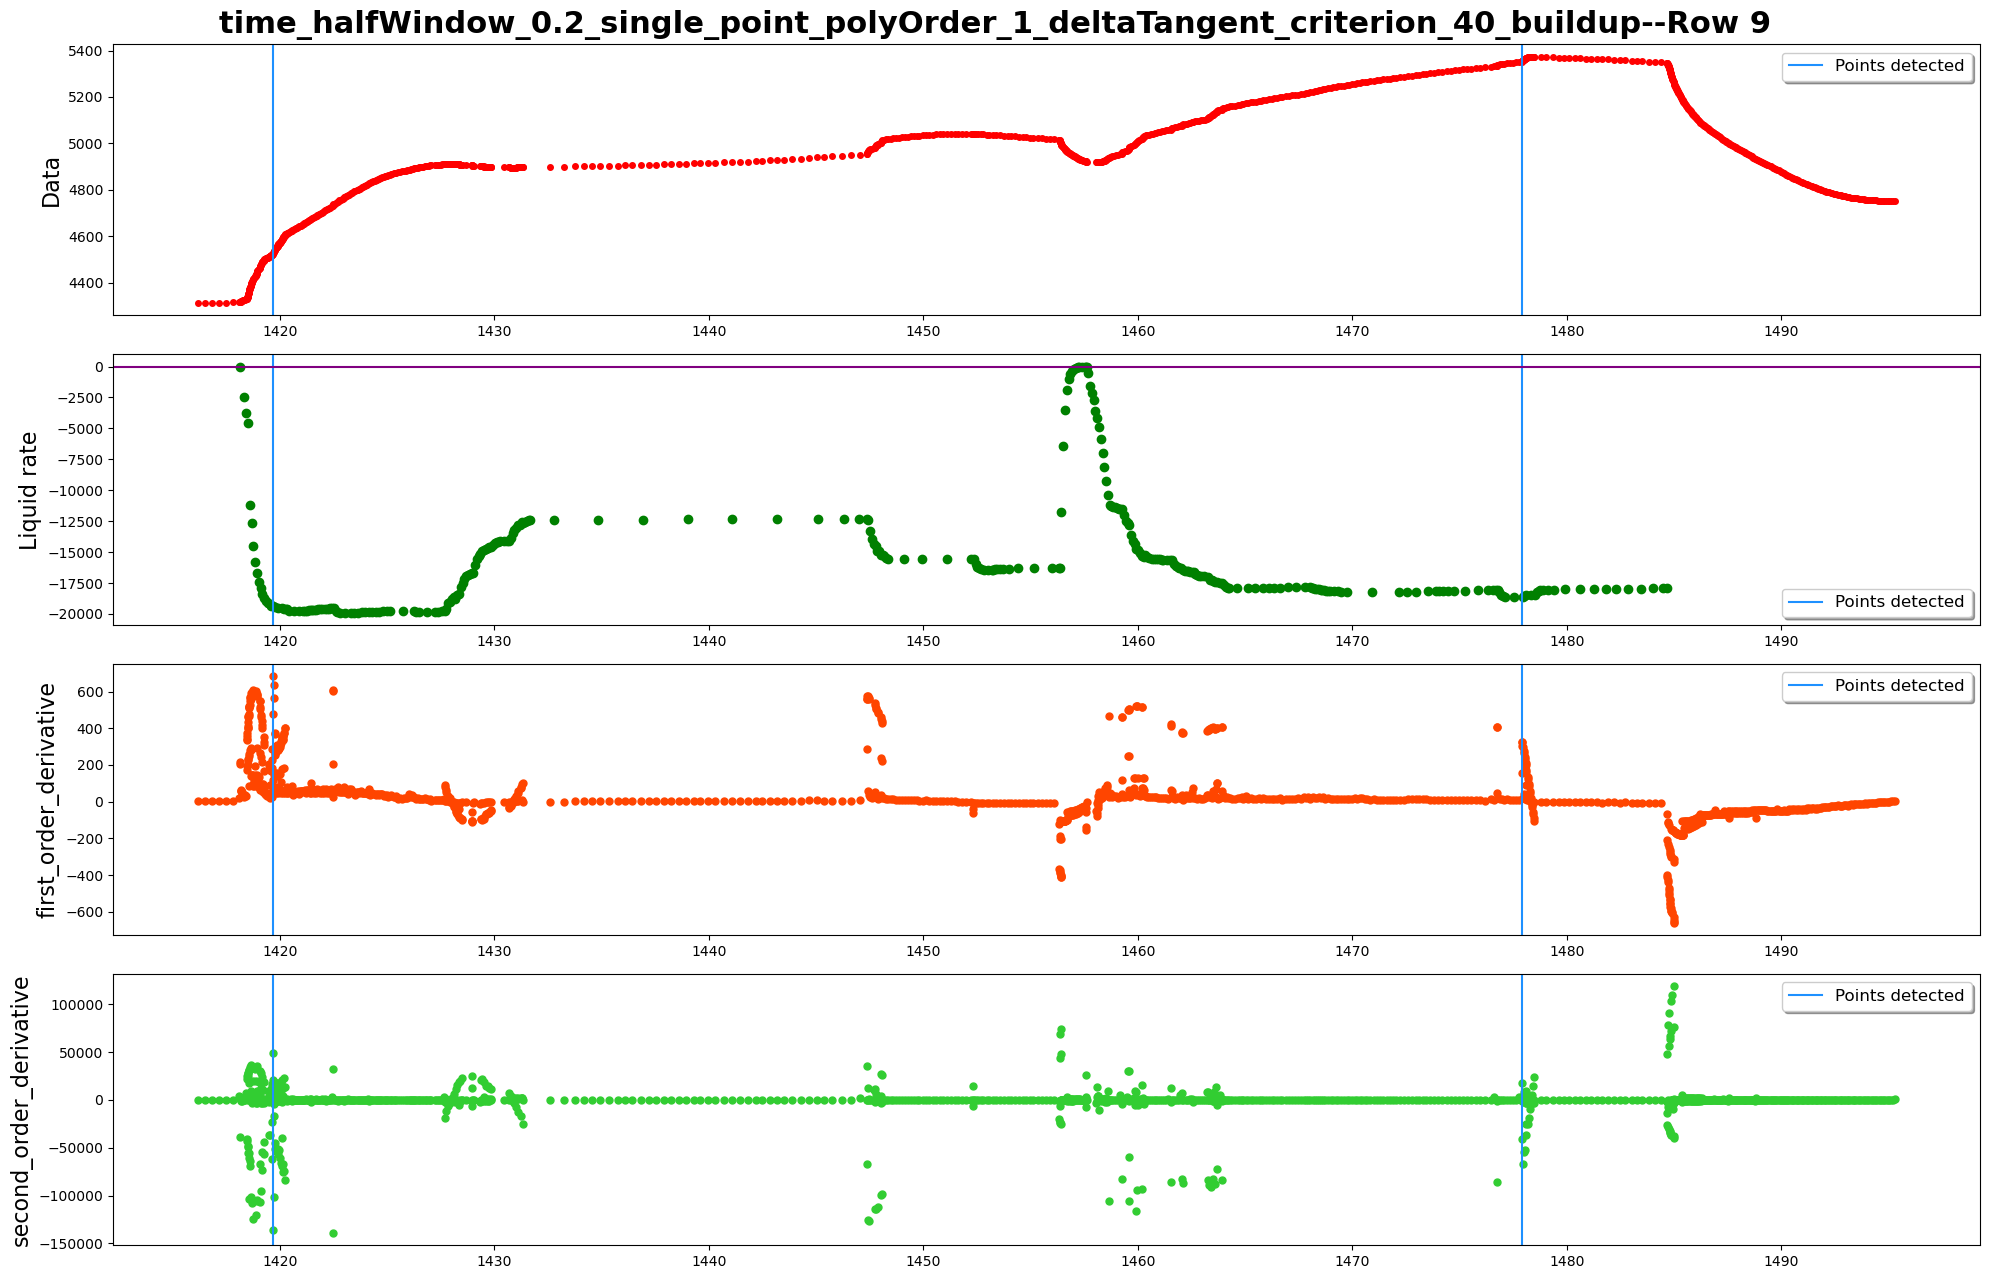

------row 10-----detected points:[10874, 10953, 10974, 11029]


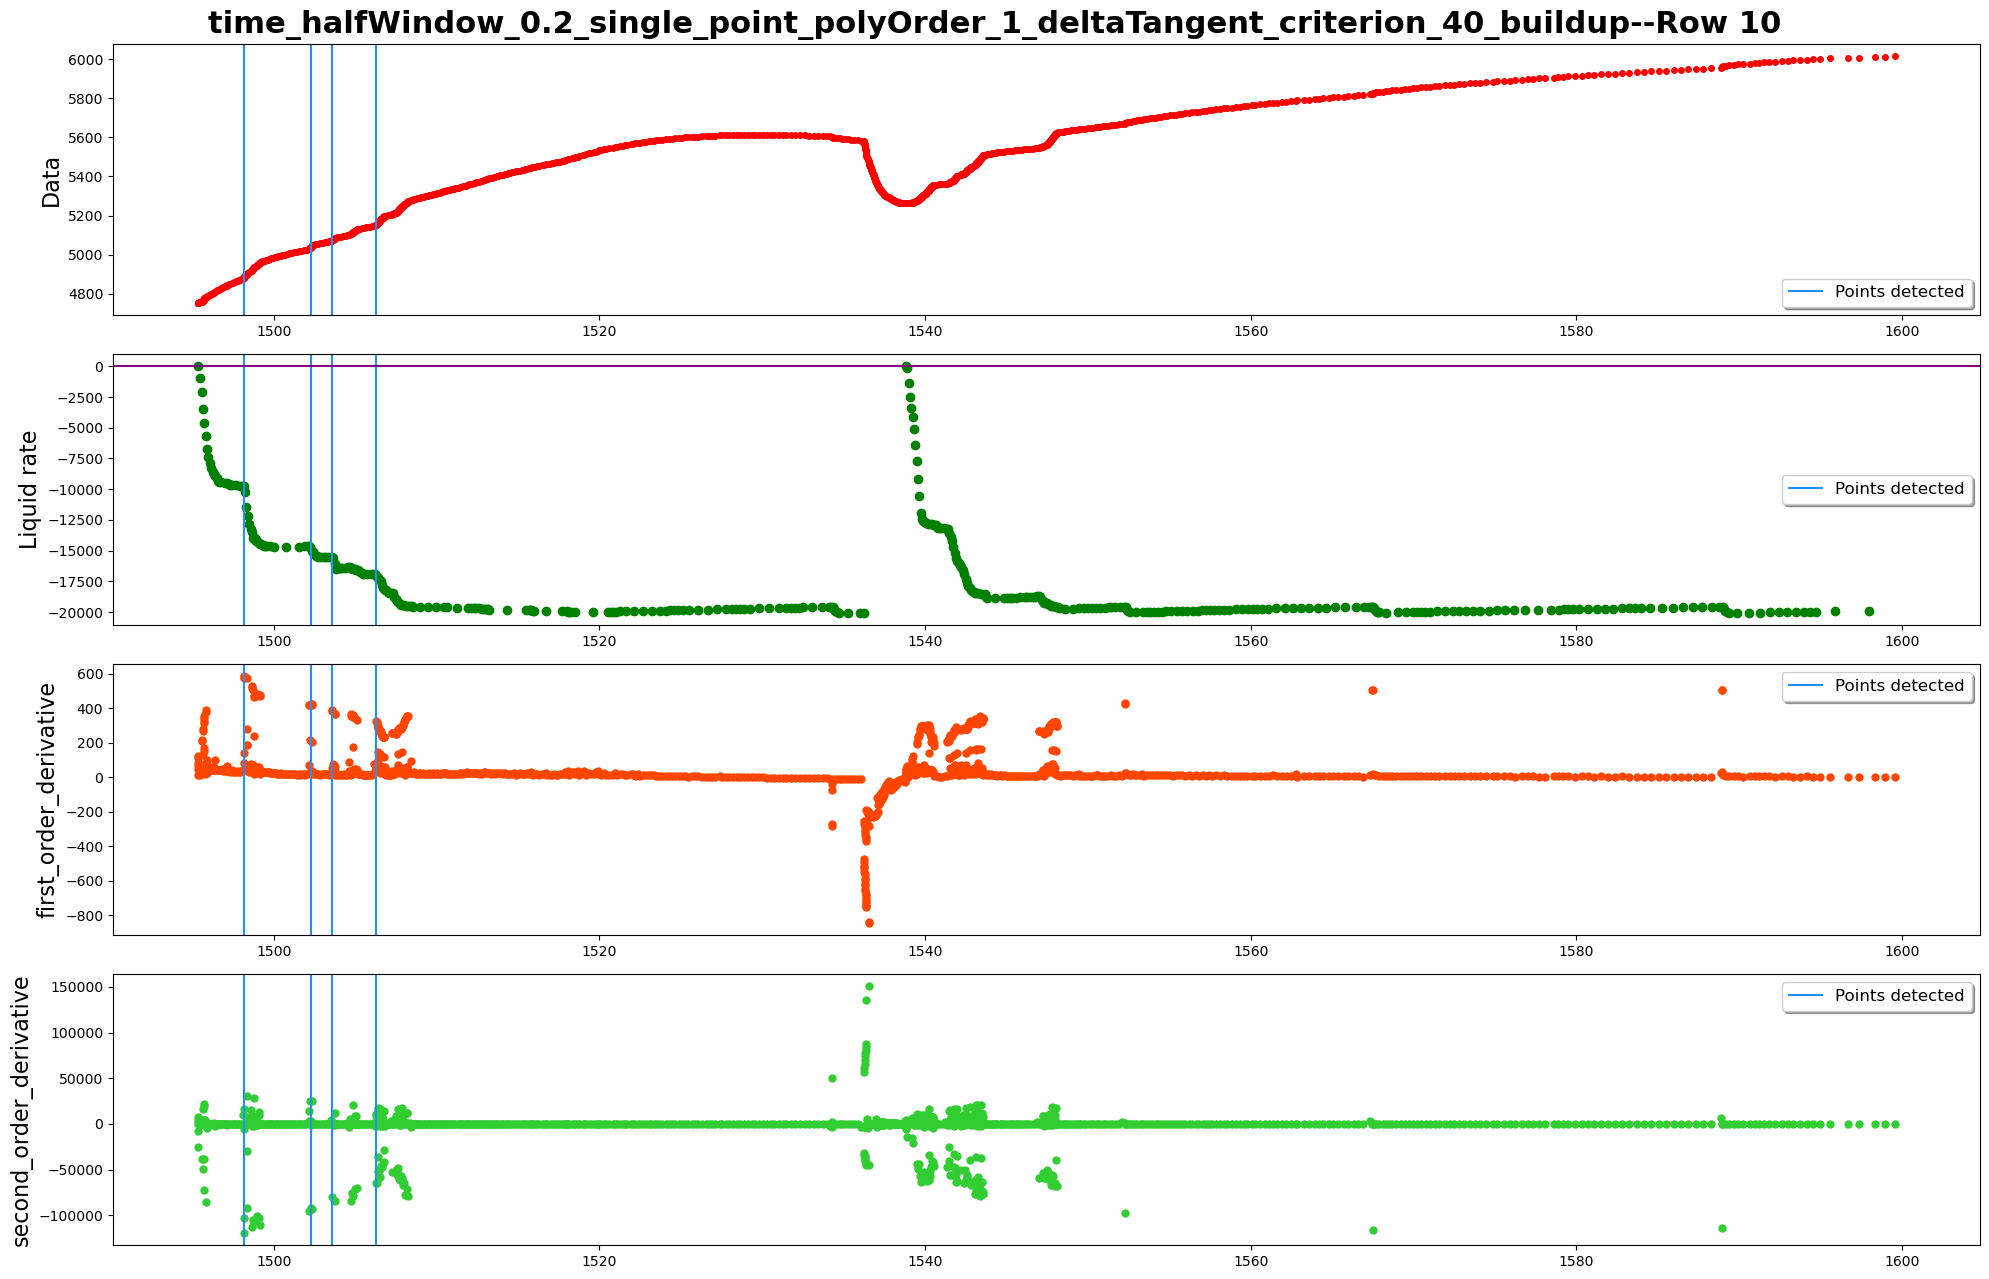

------row 11-----detected points:[13043]


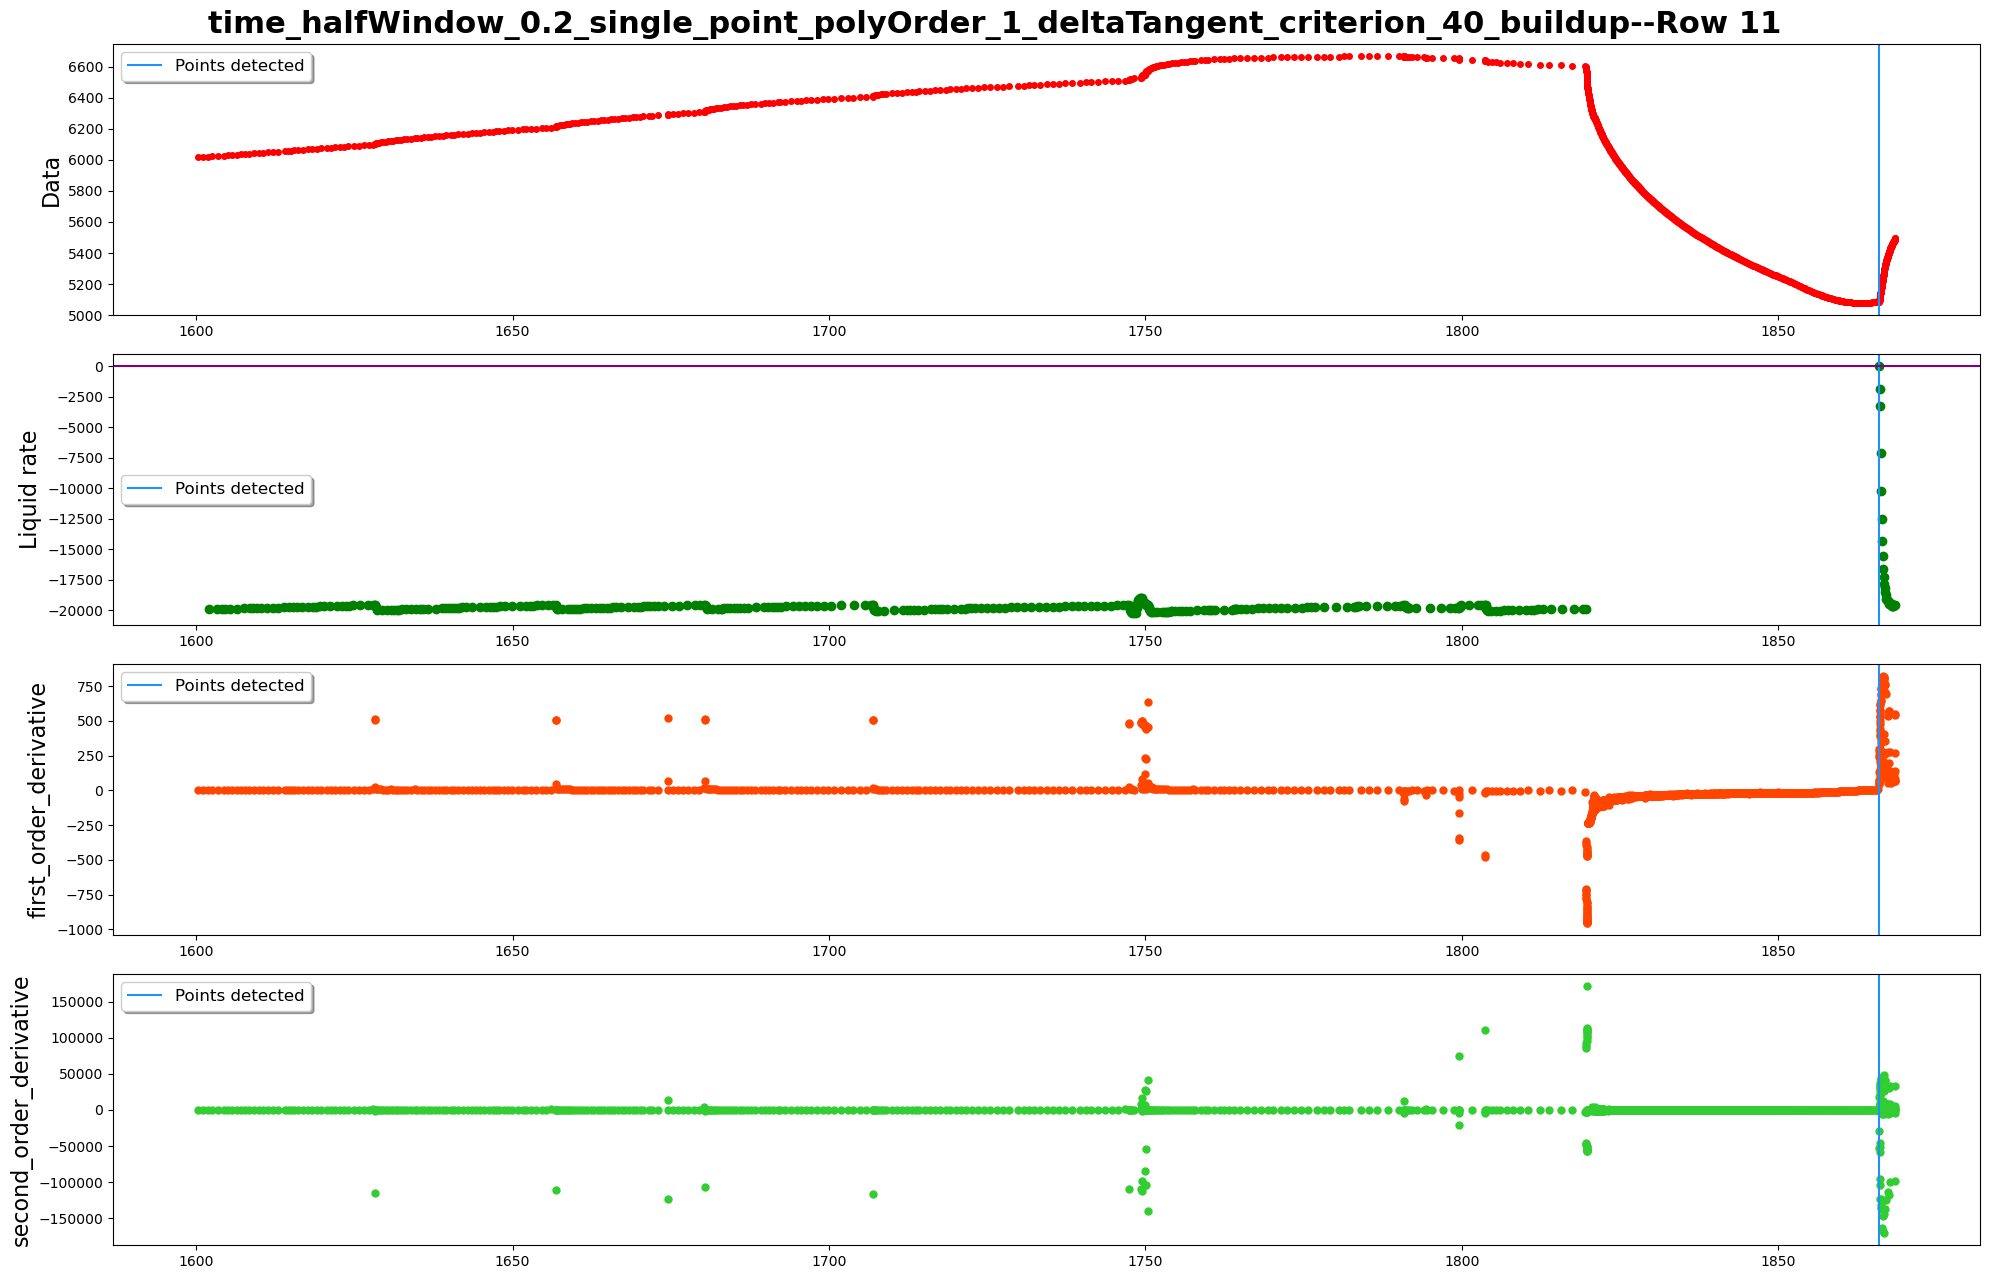

------row 12-----detected points:[13336, 13529, 13781, 14143]


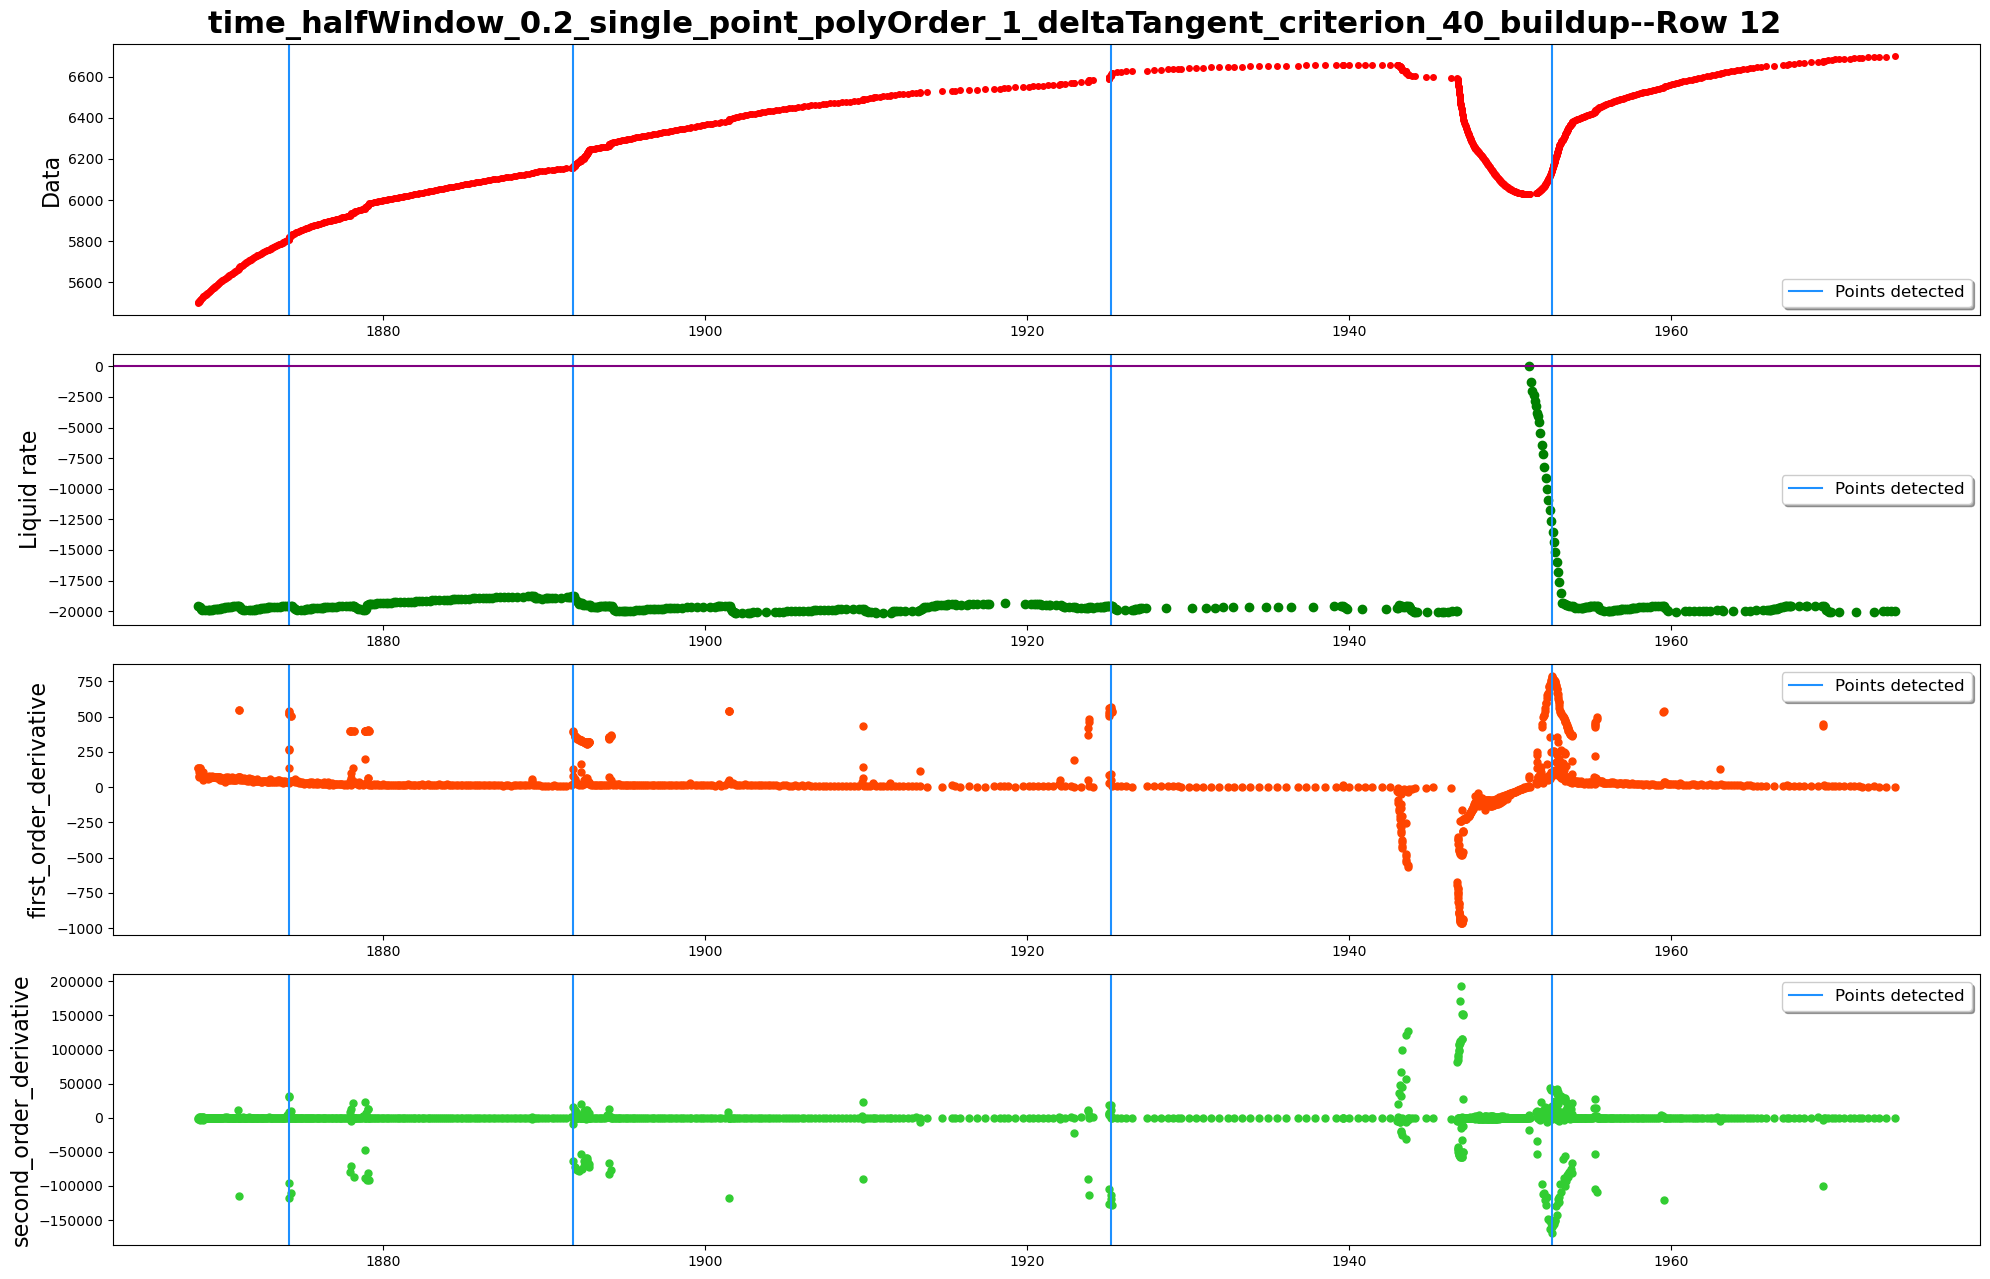

------row 13-----detected points:[14686, 15405, 15576]


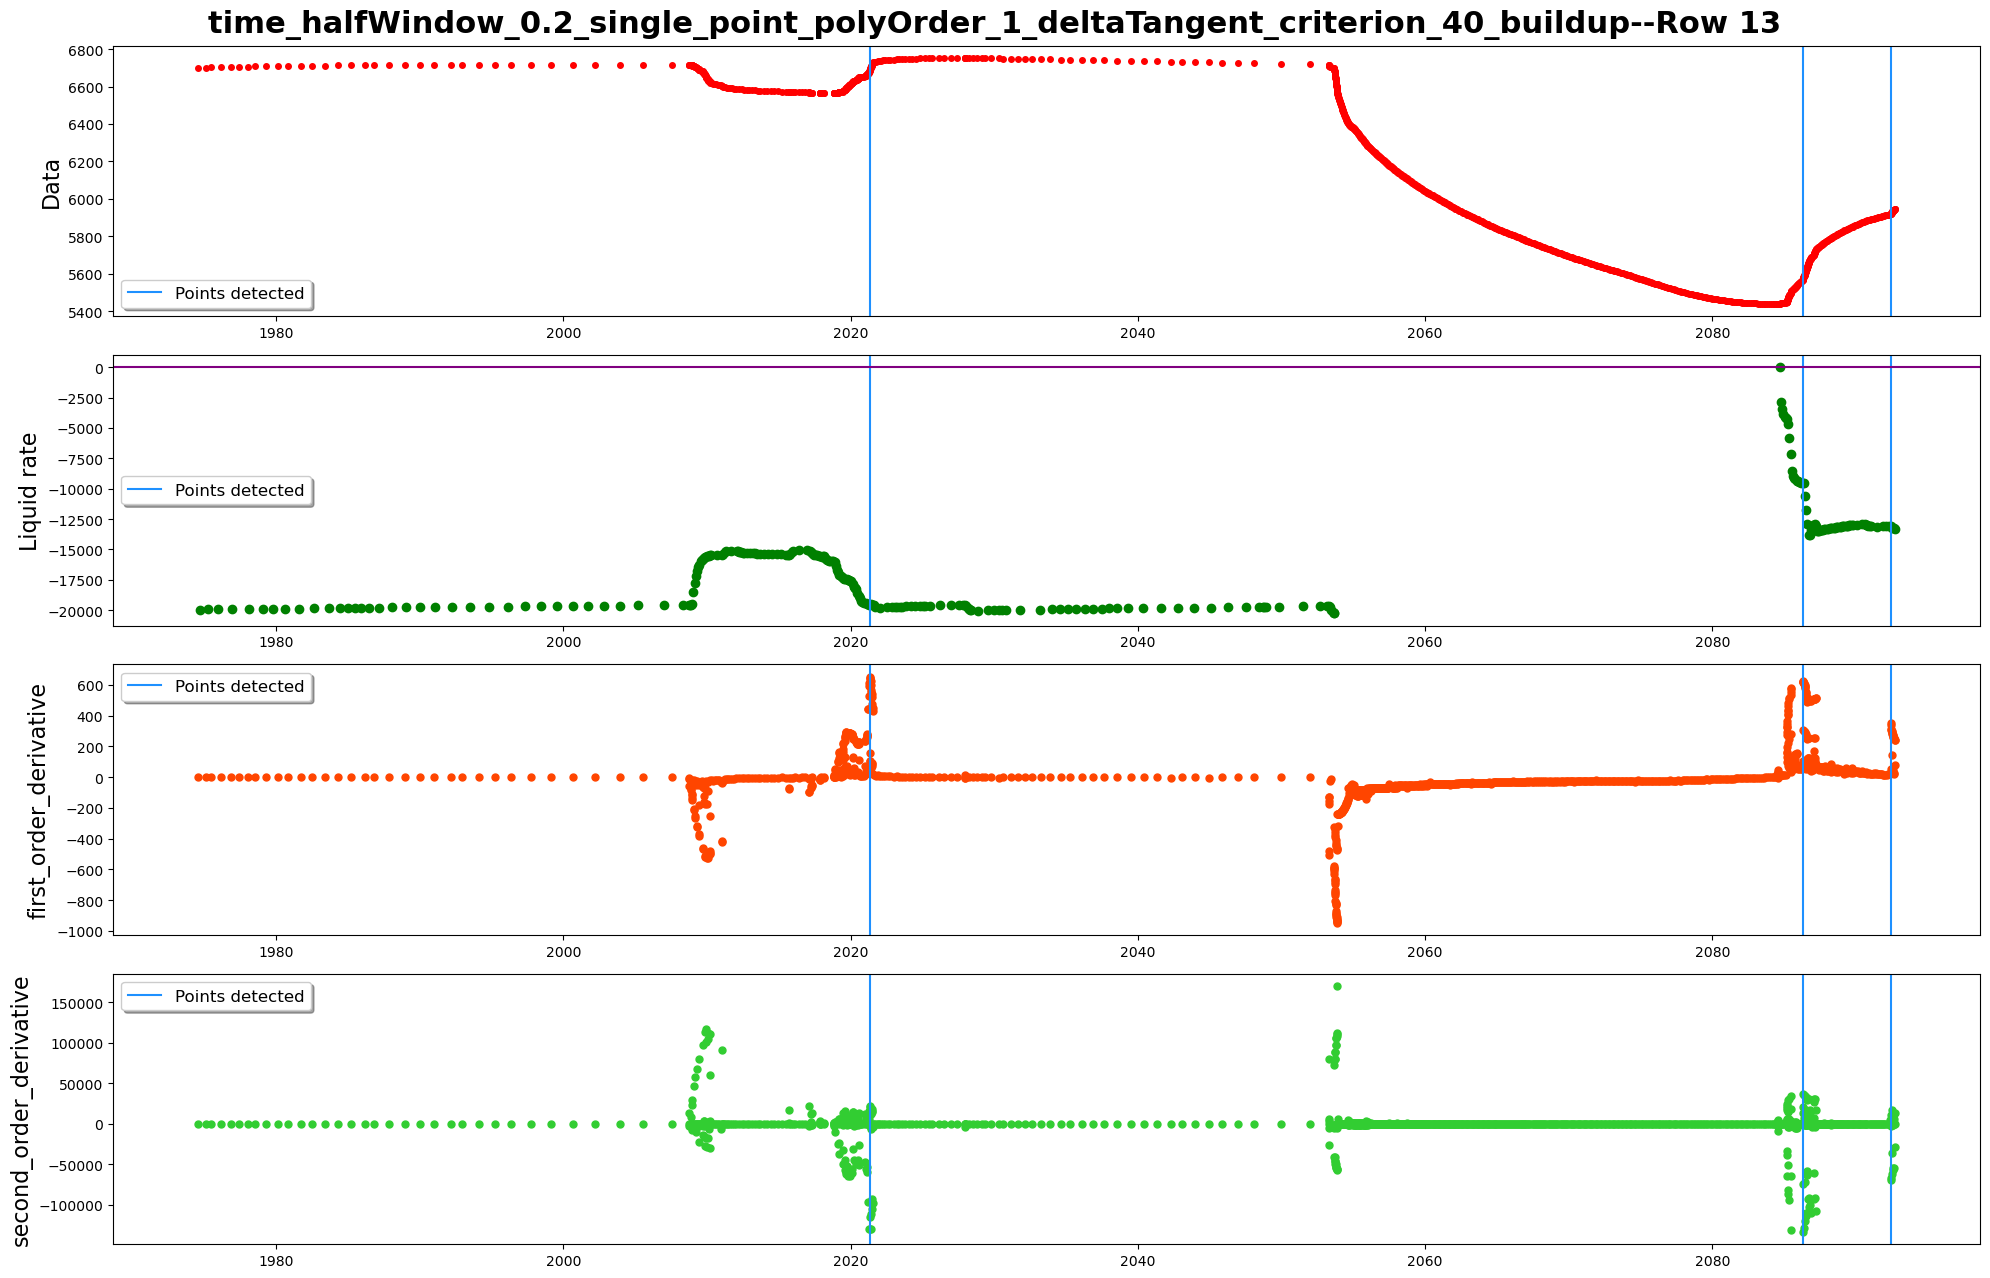

------row 14-----detected points:[15741, 16009]


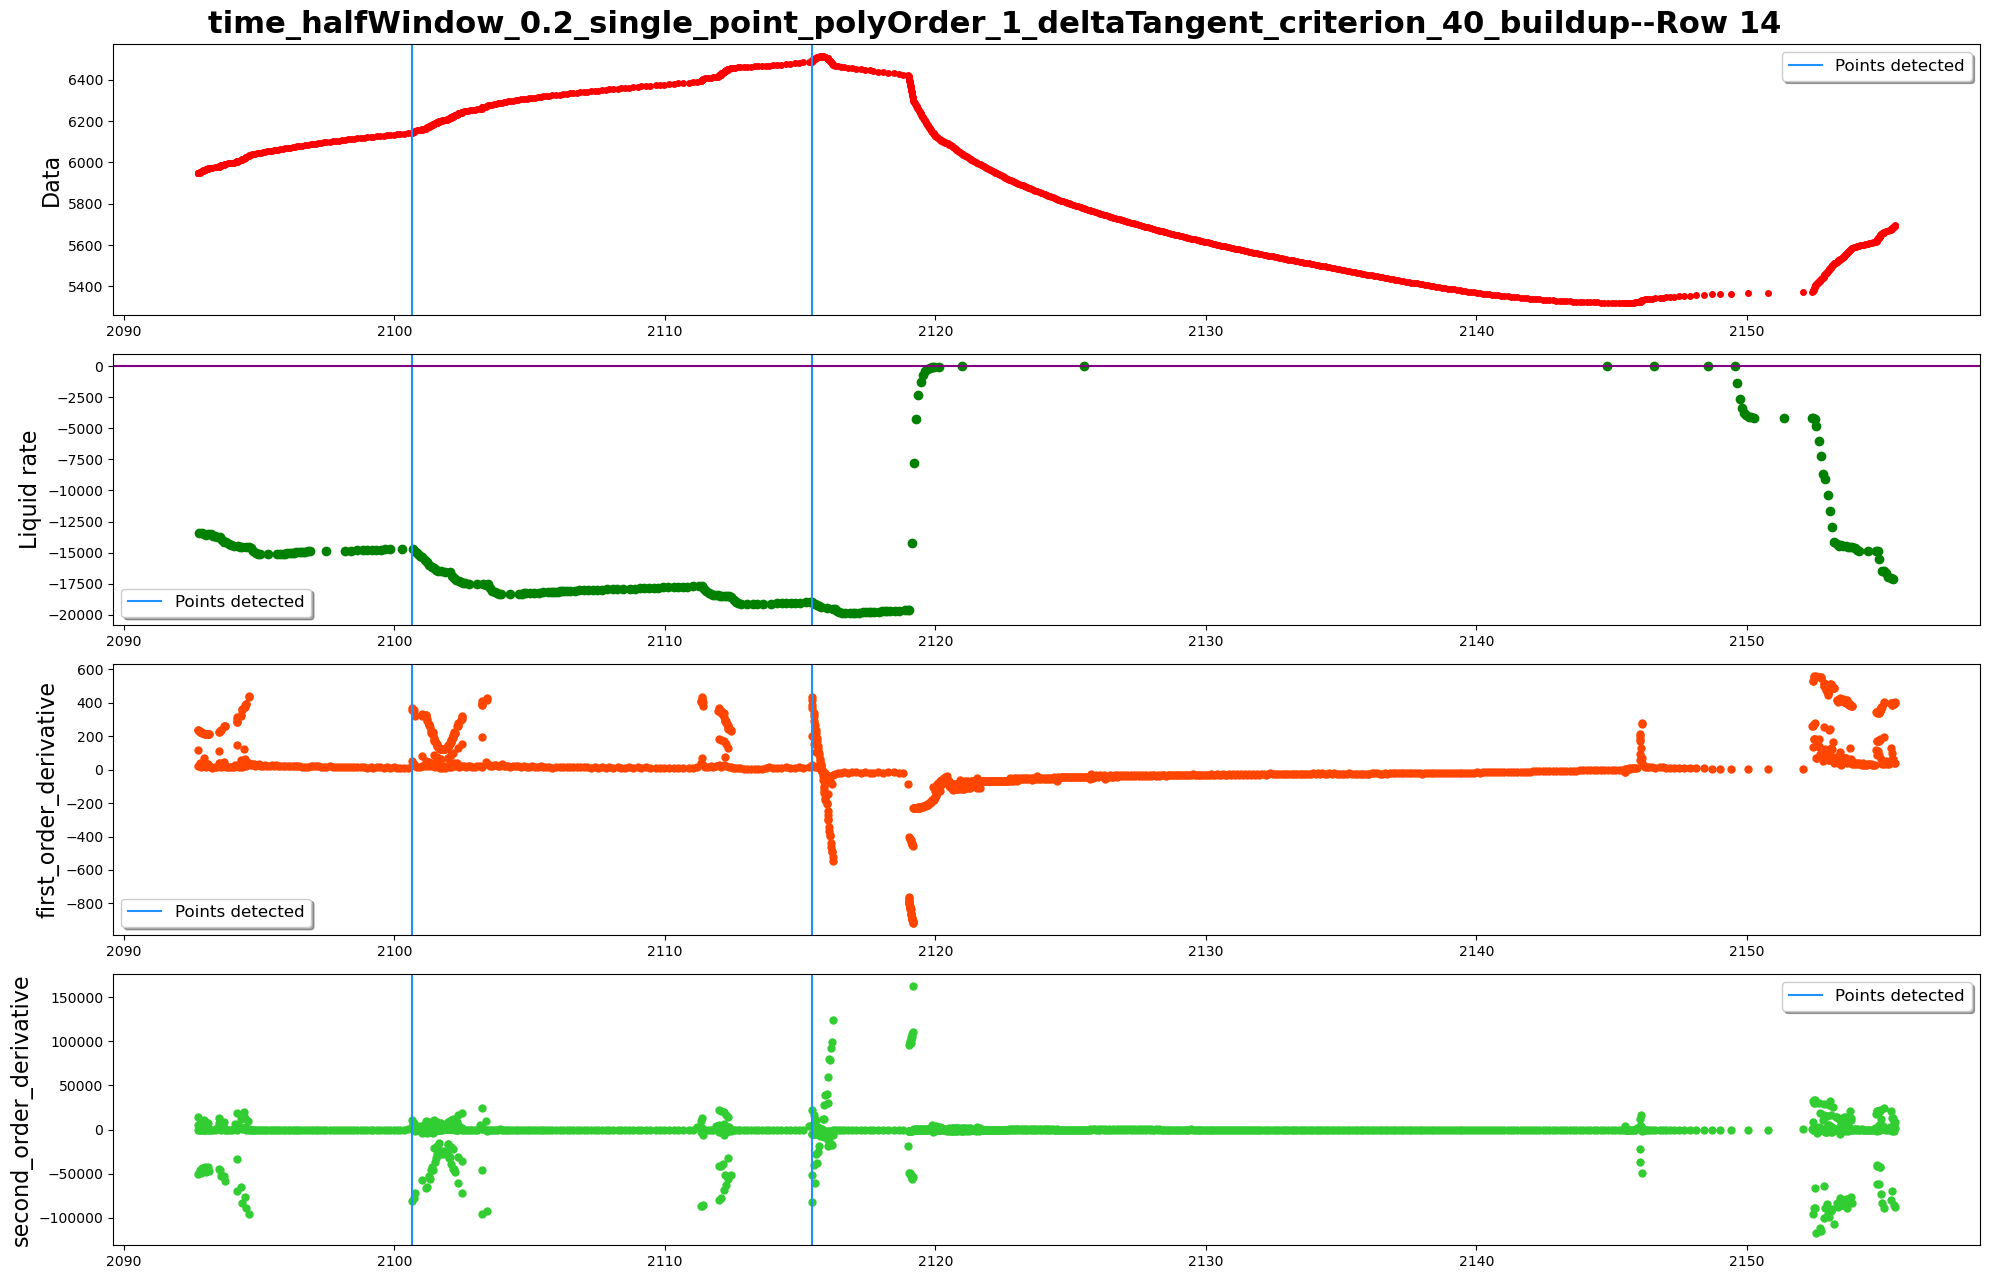

------row 15-----detected points:[17158, 17467, 17511]


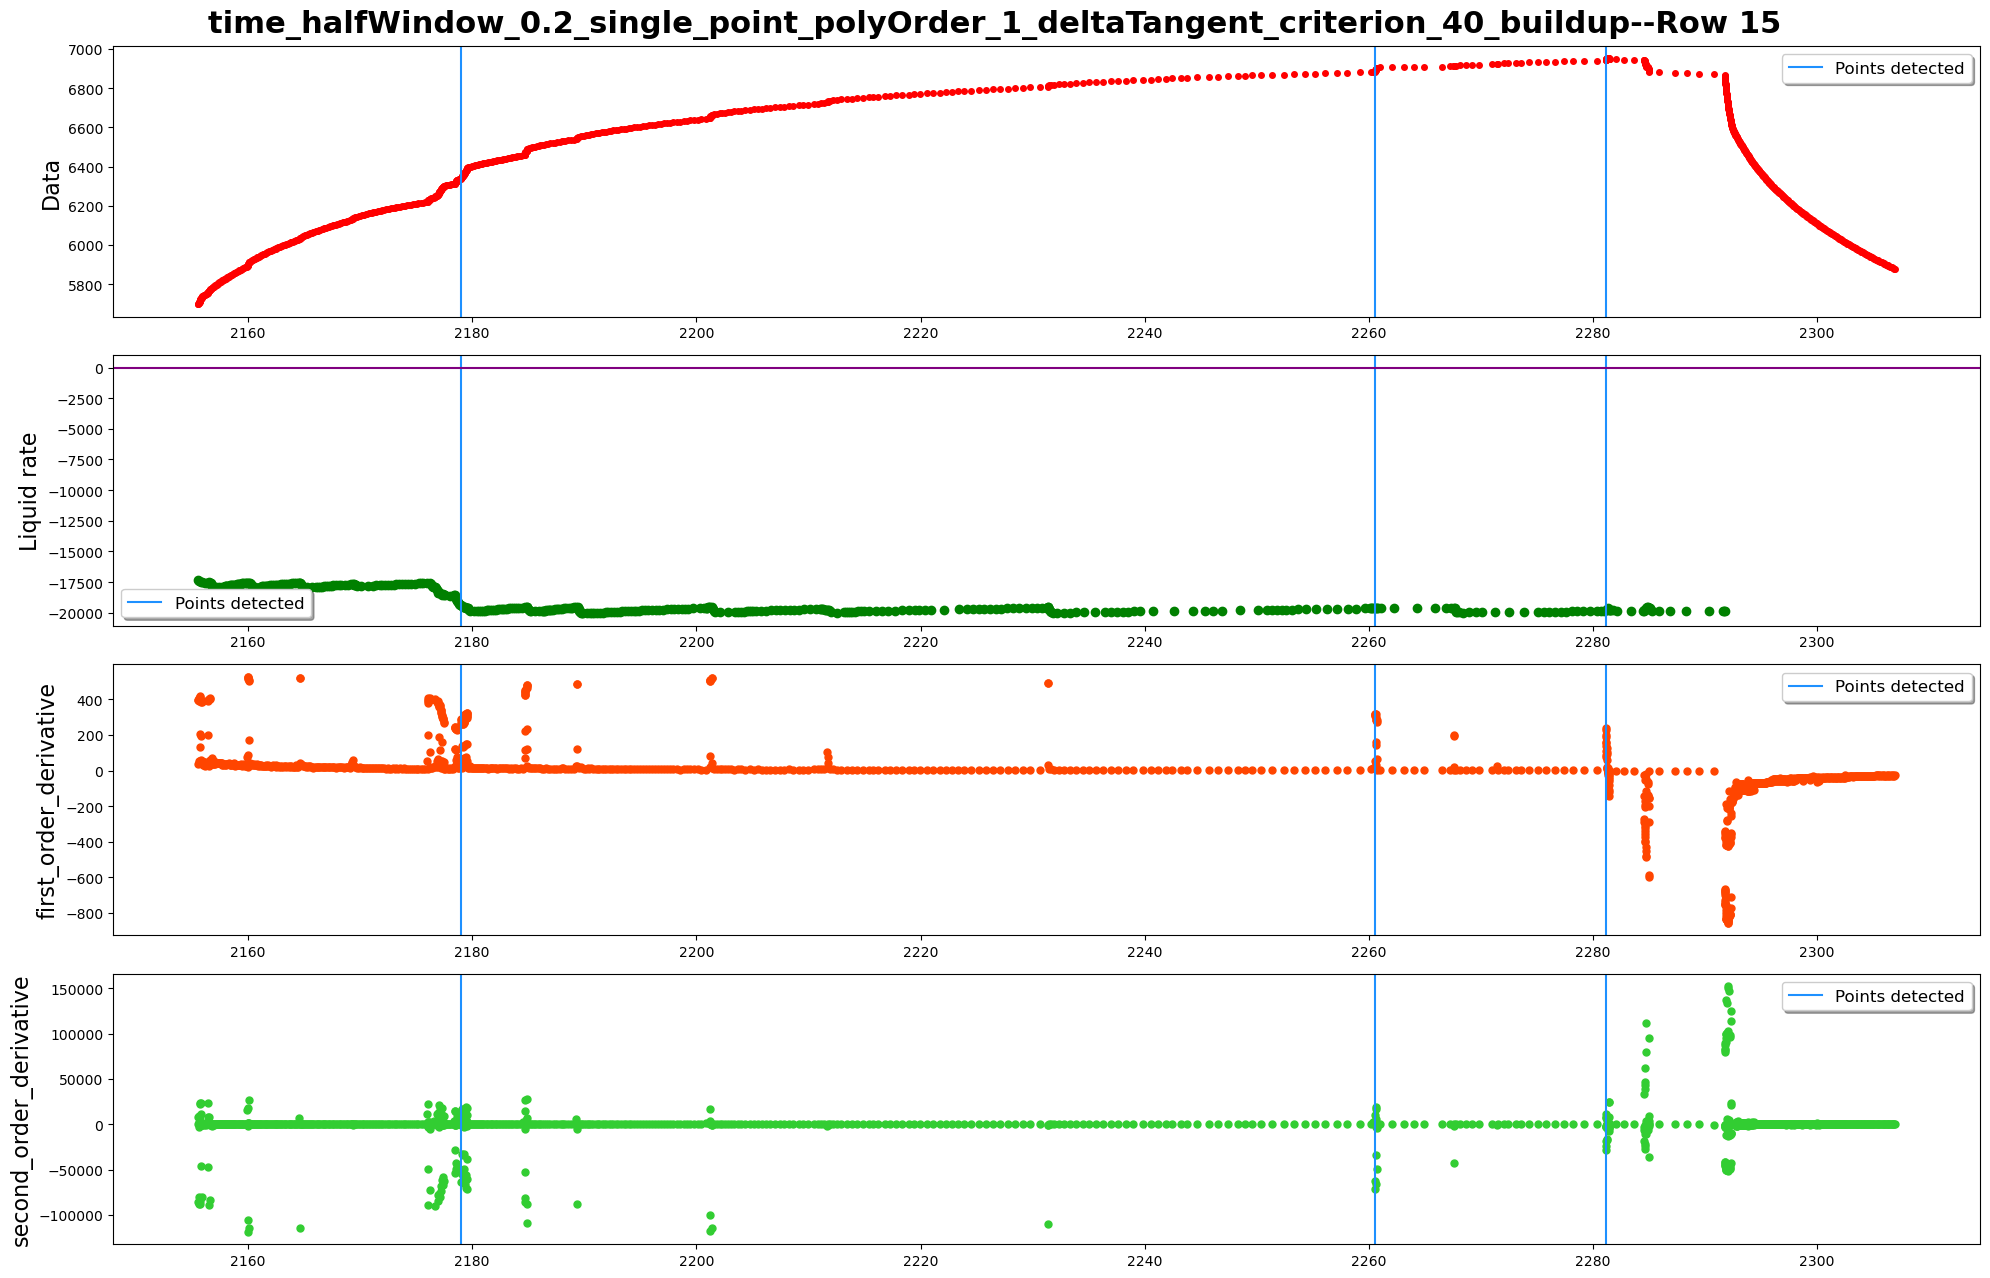

------row 16-----detected points:[18437, 18782, 18818]


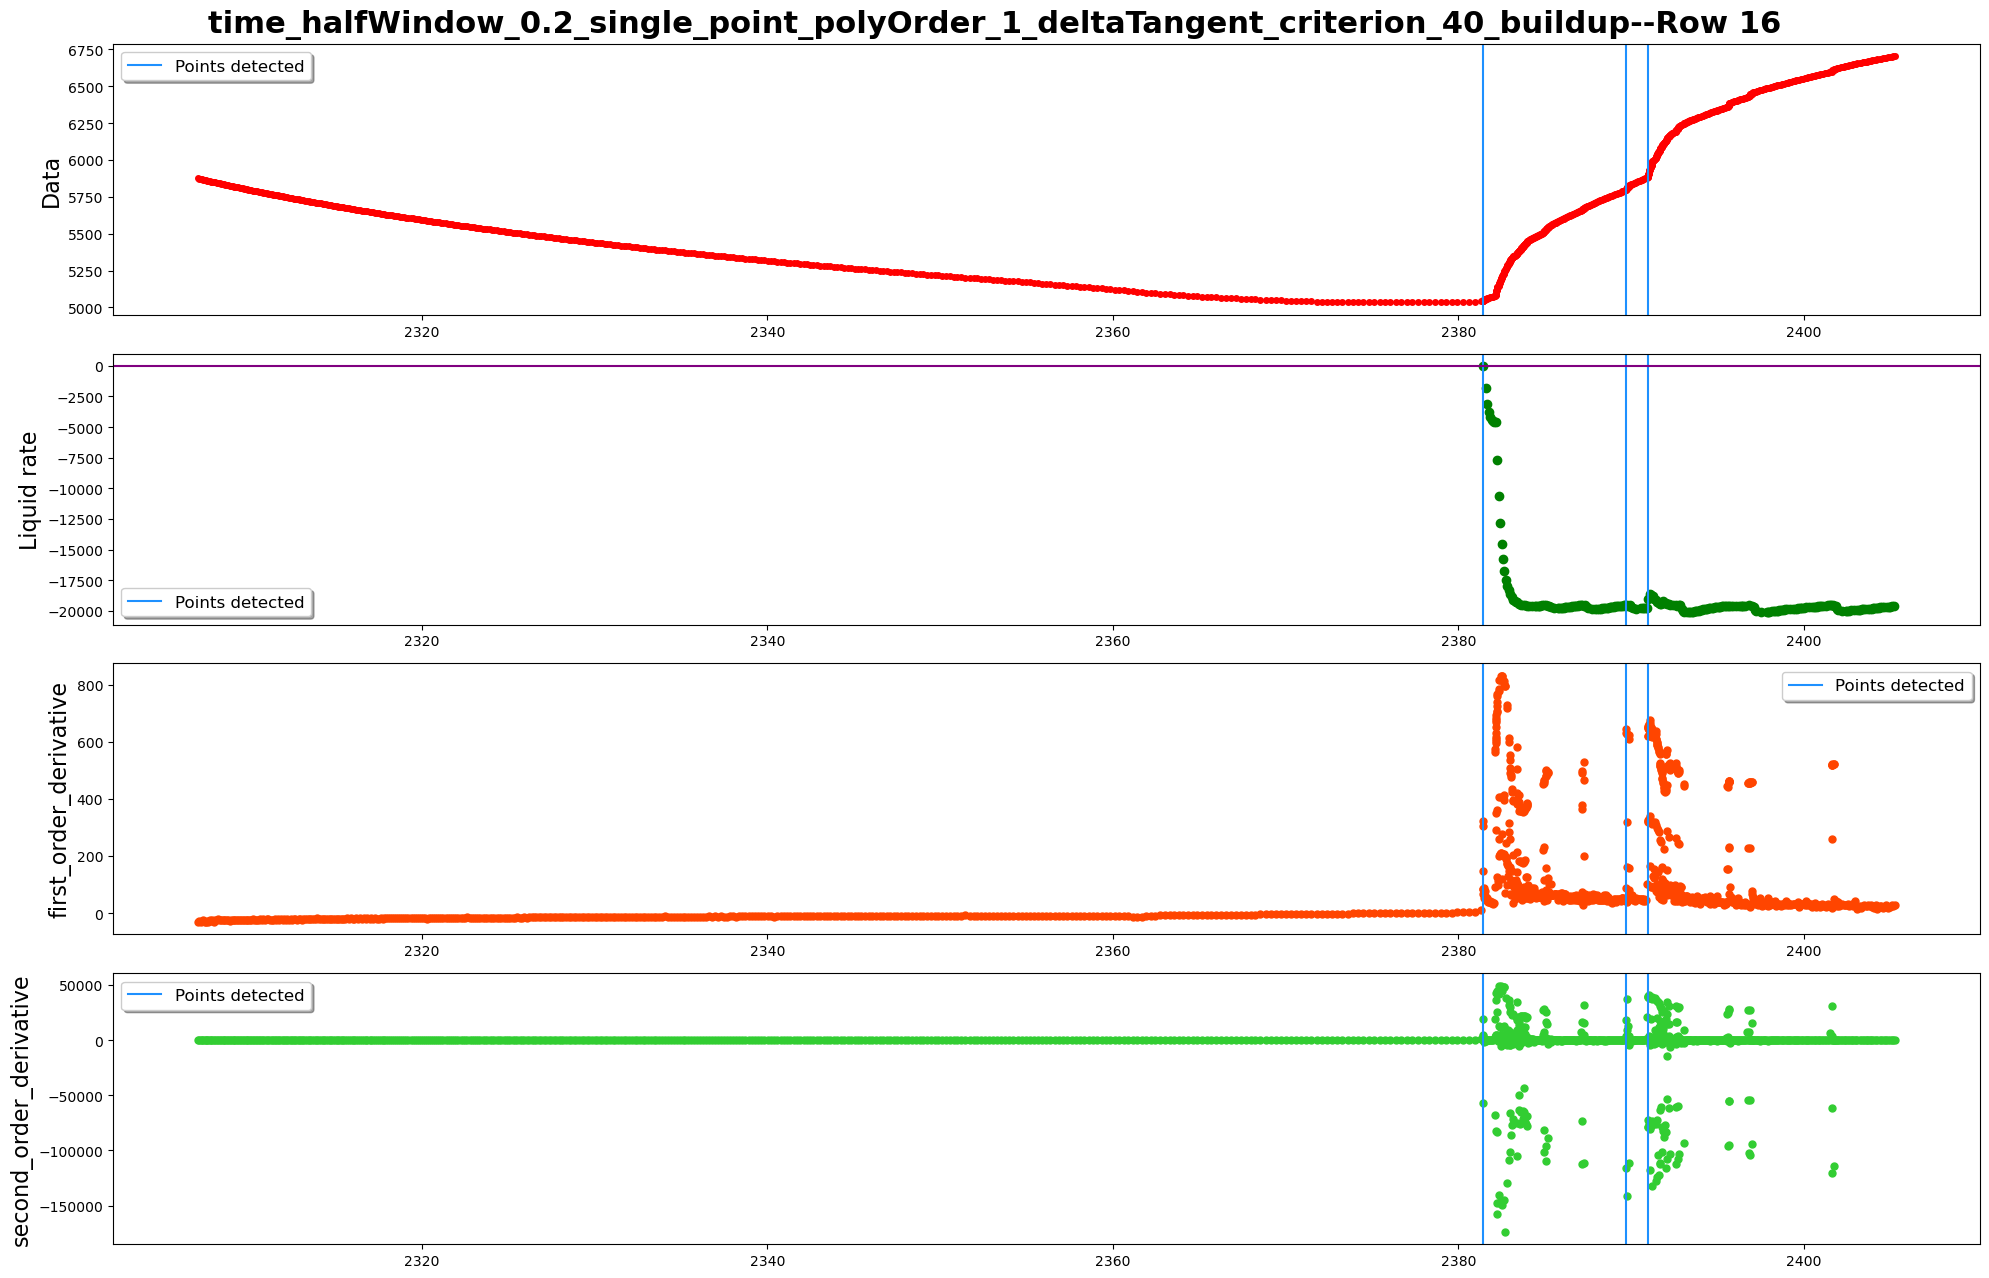

------row 17-----detected points:[19208, 19459, 20348]


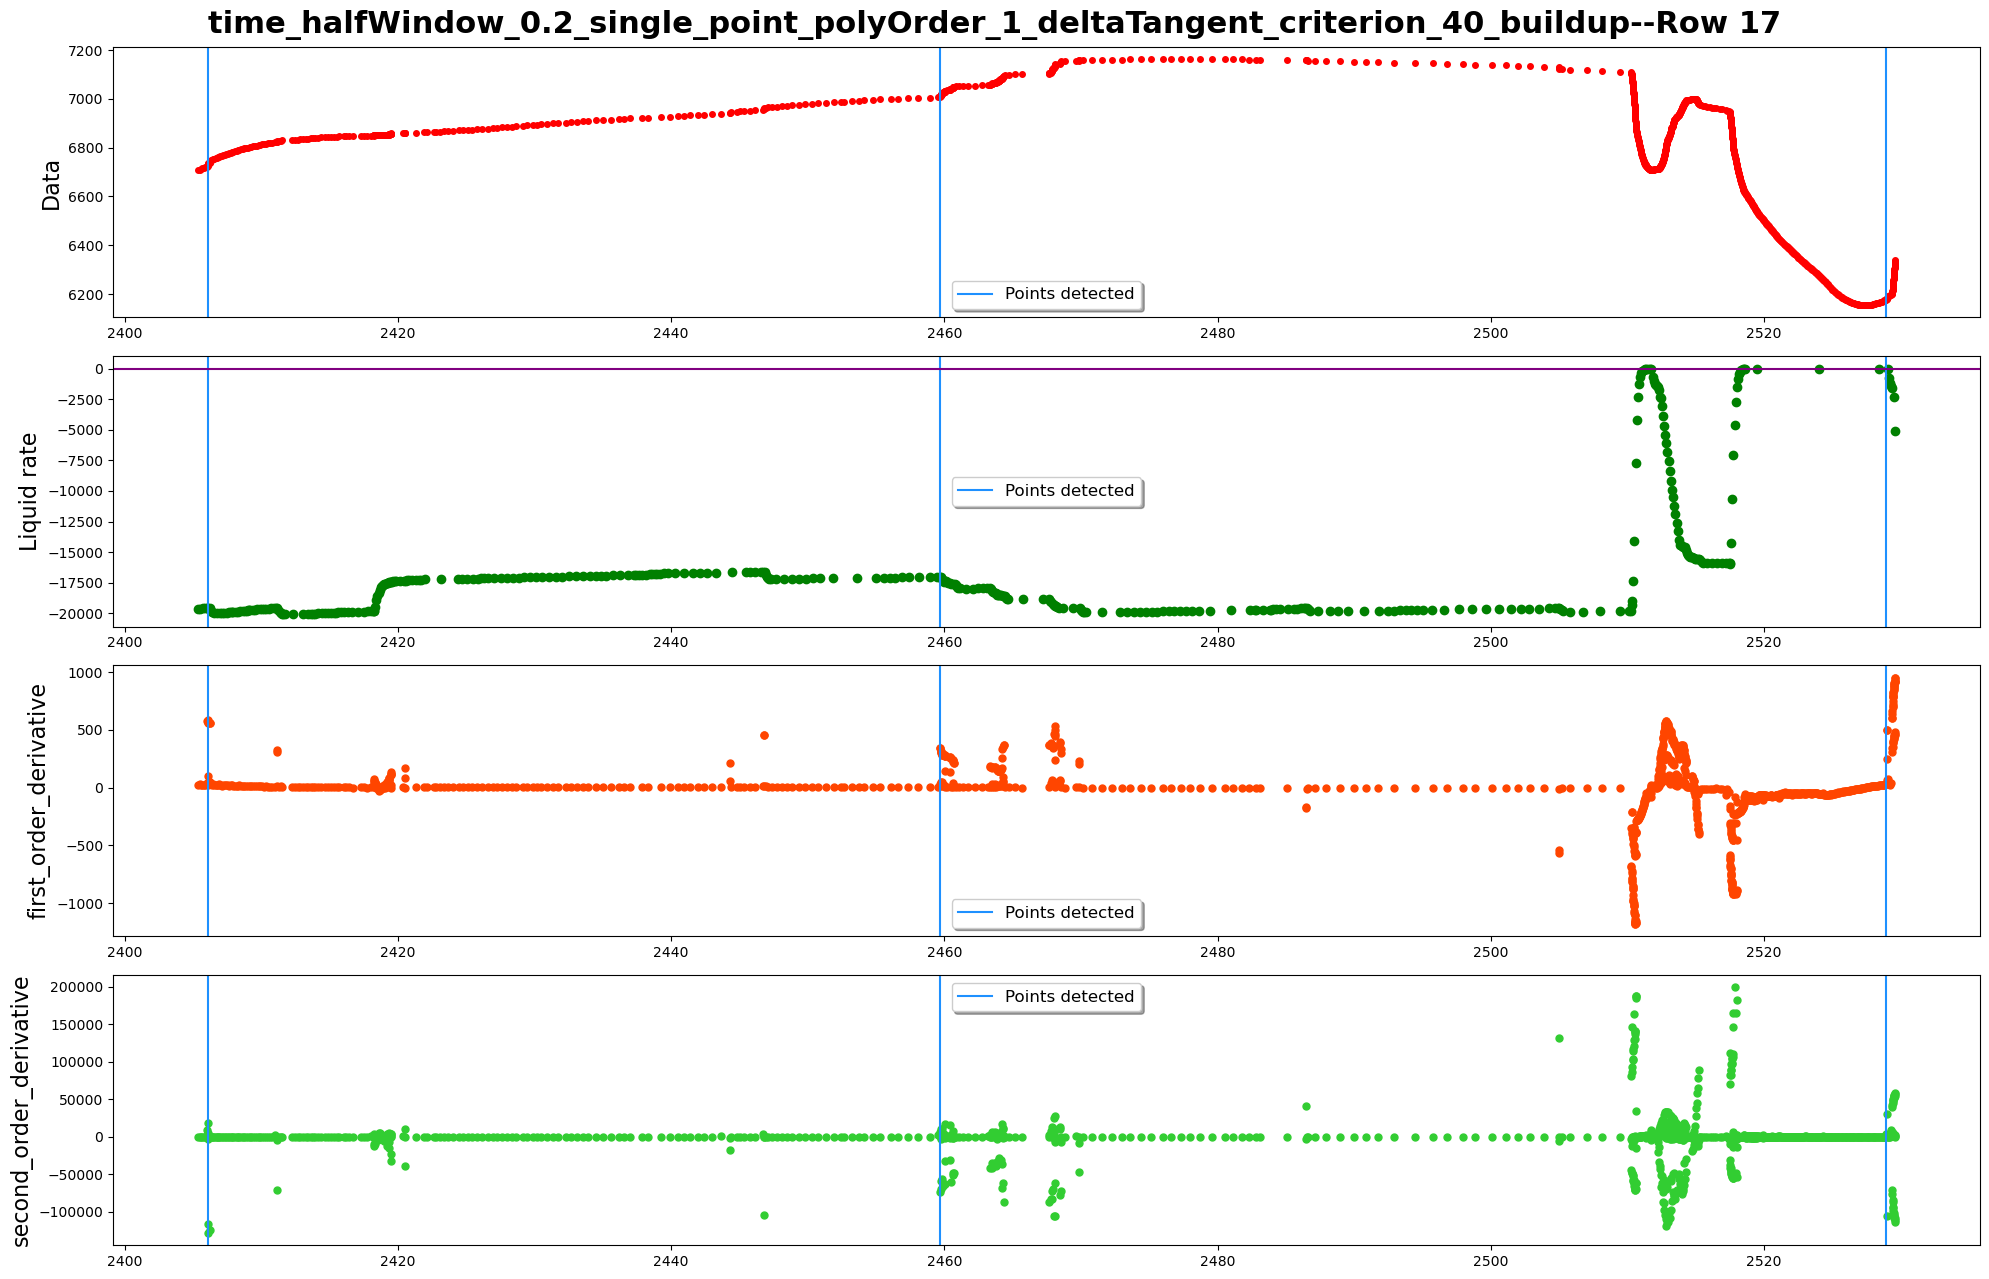

------row 18-----detected points:[21066, 21094]


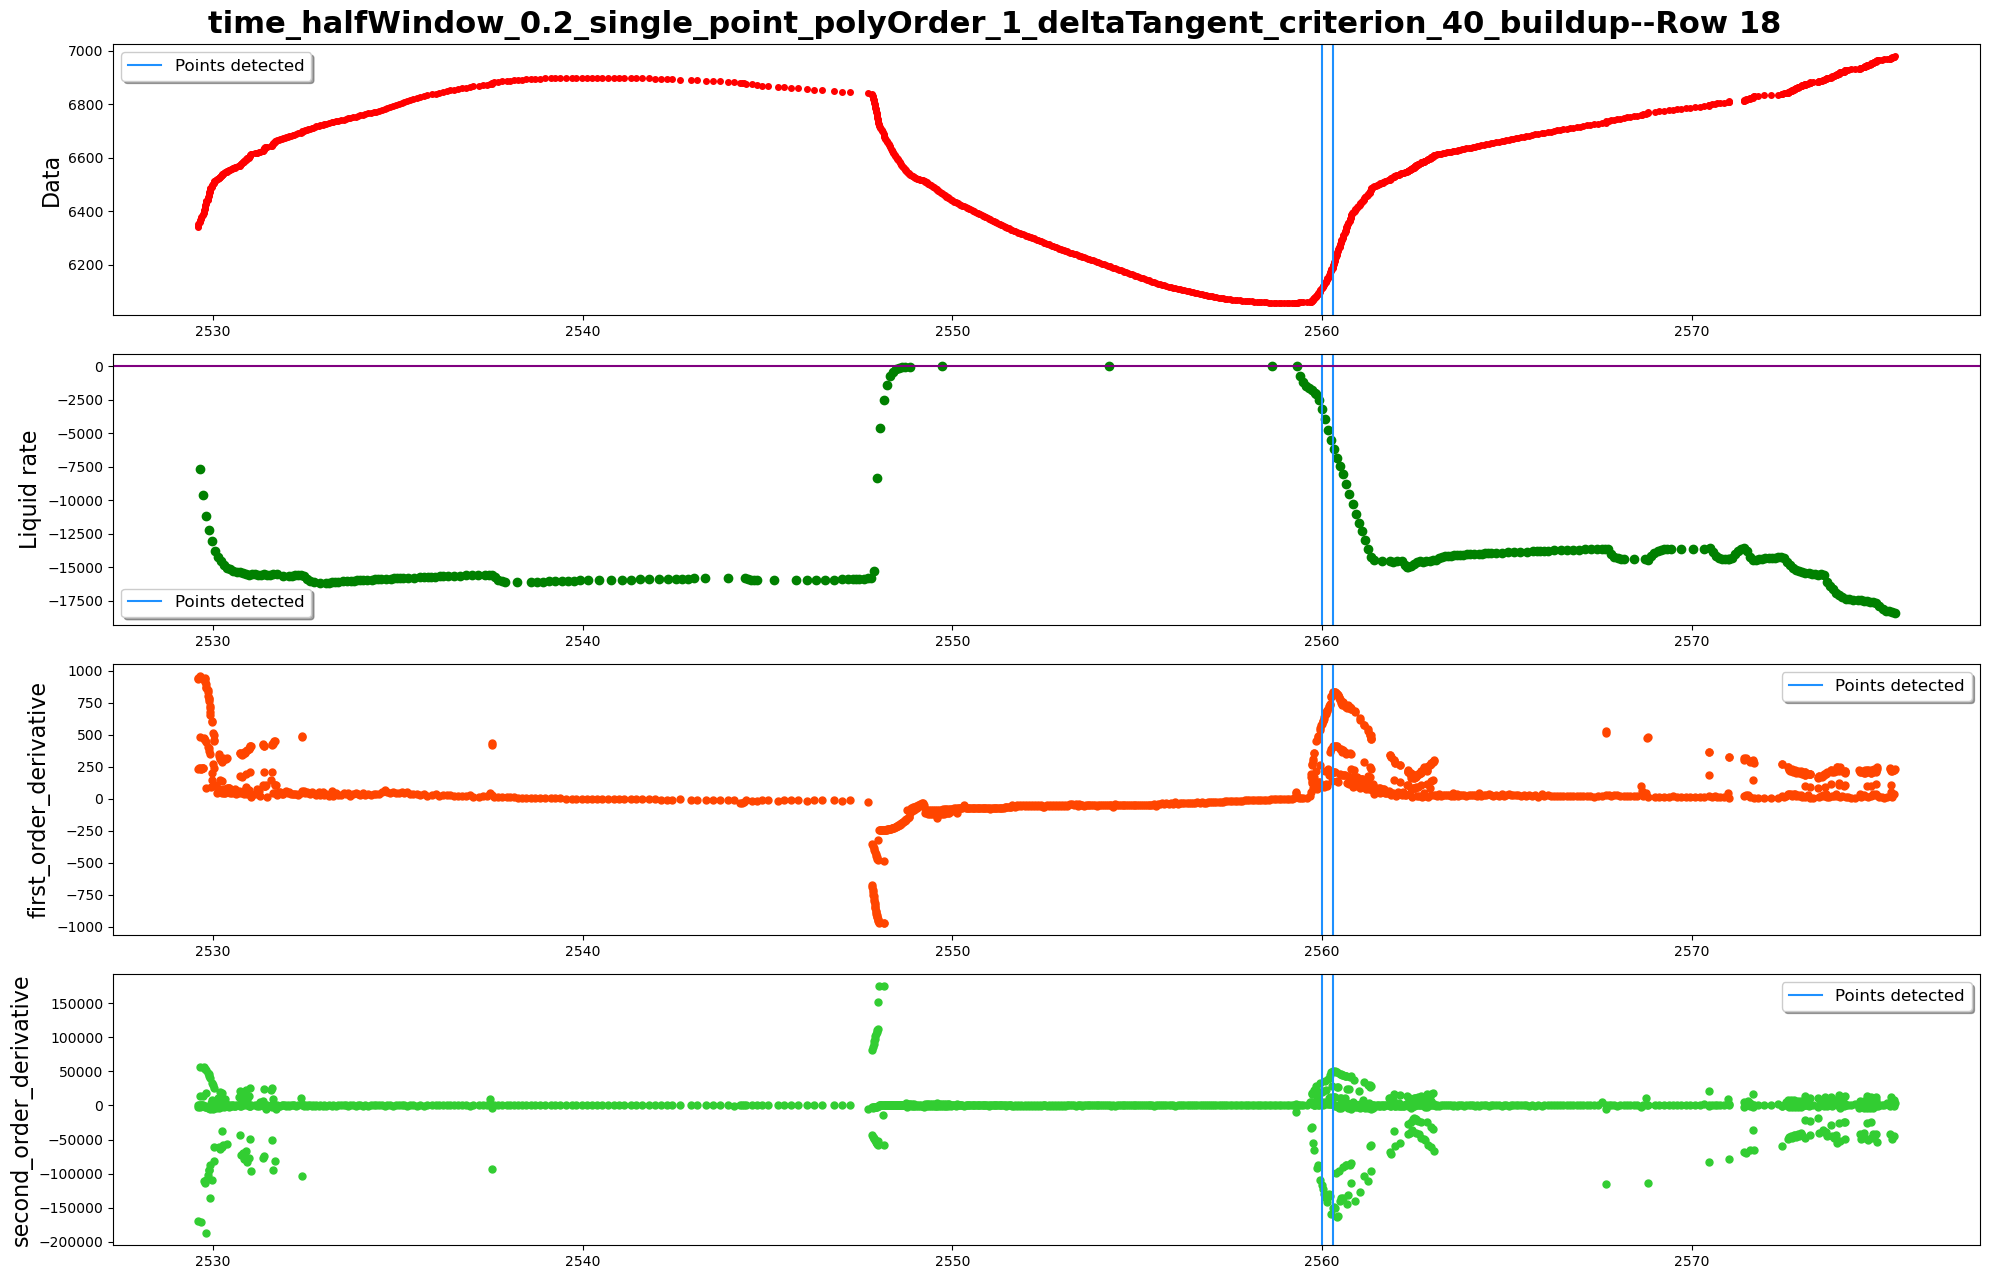

------row 19-----detected points:[22621]


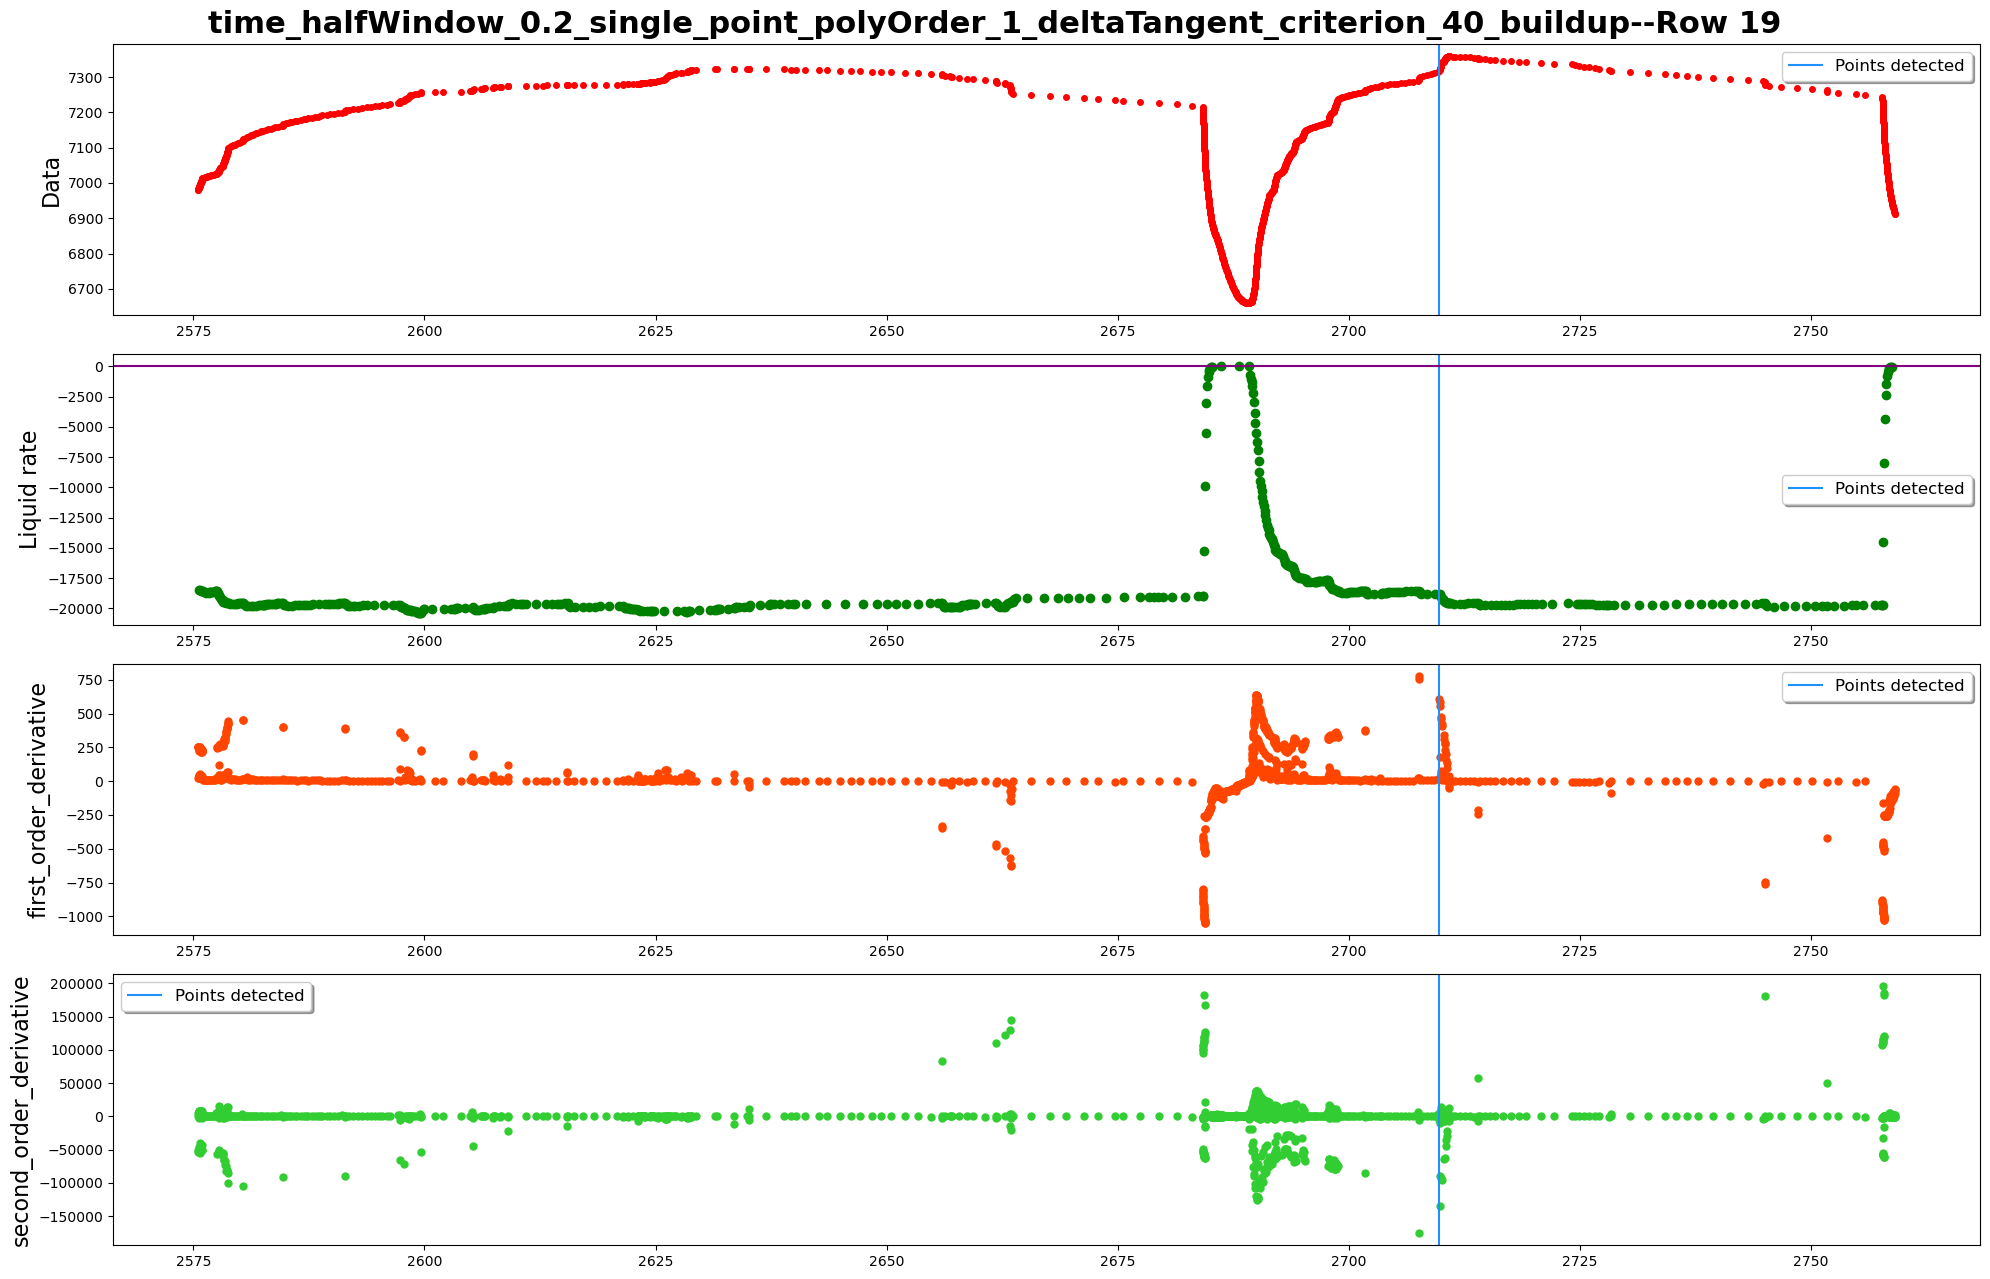

------row 20-----detected points:[23395, 23639, 23834, 23935, 23981]


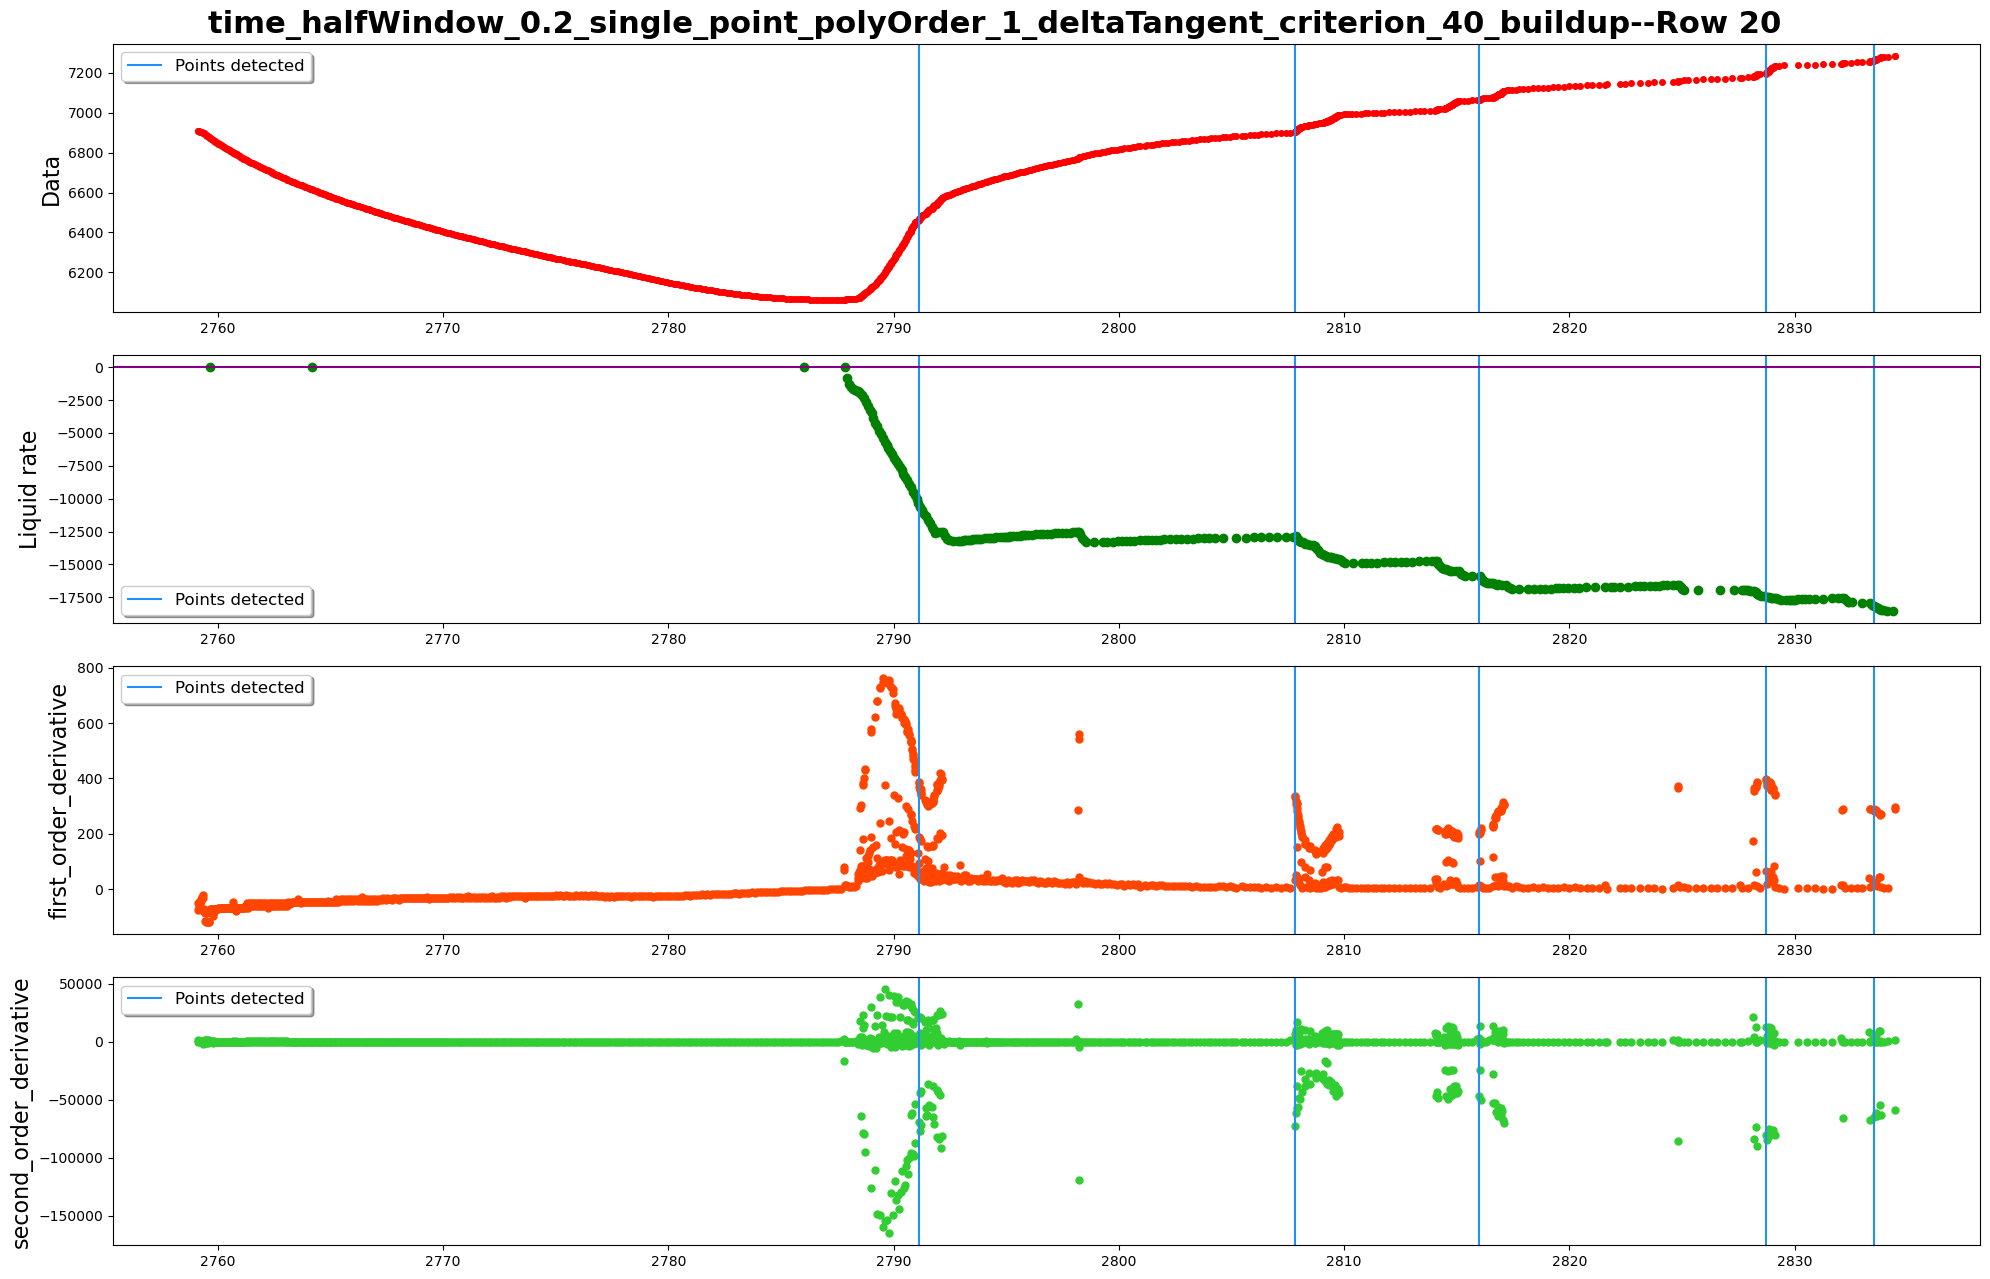

------row 21-----detected points:[24073, 24703, 24759, 25198]


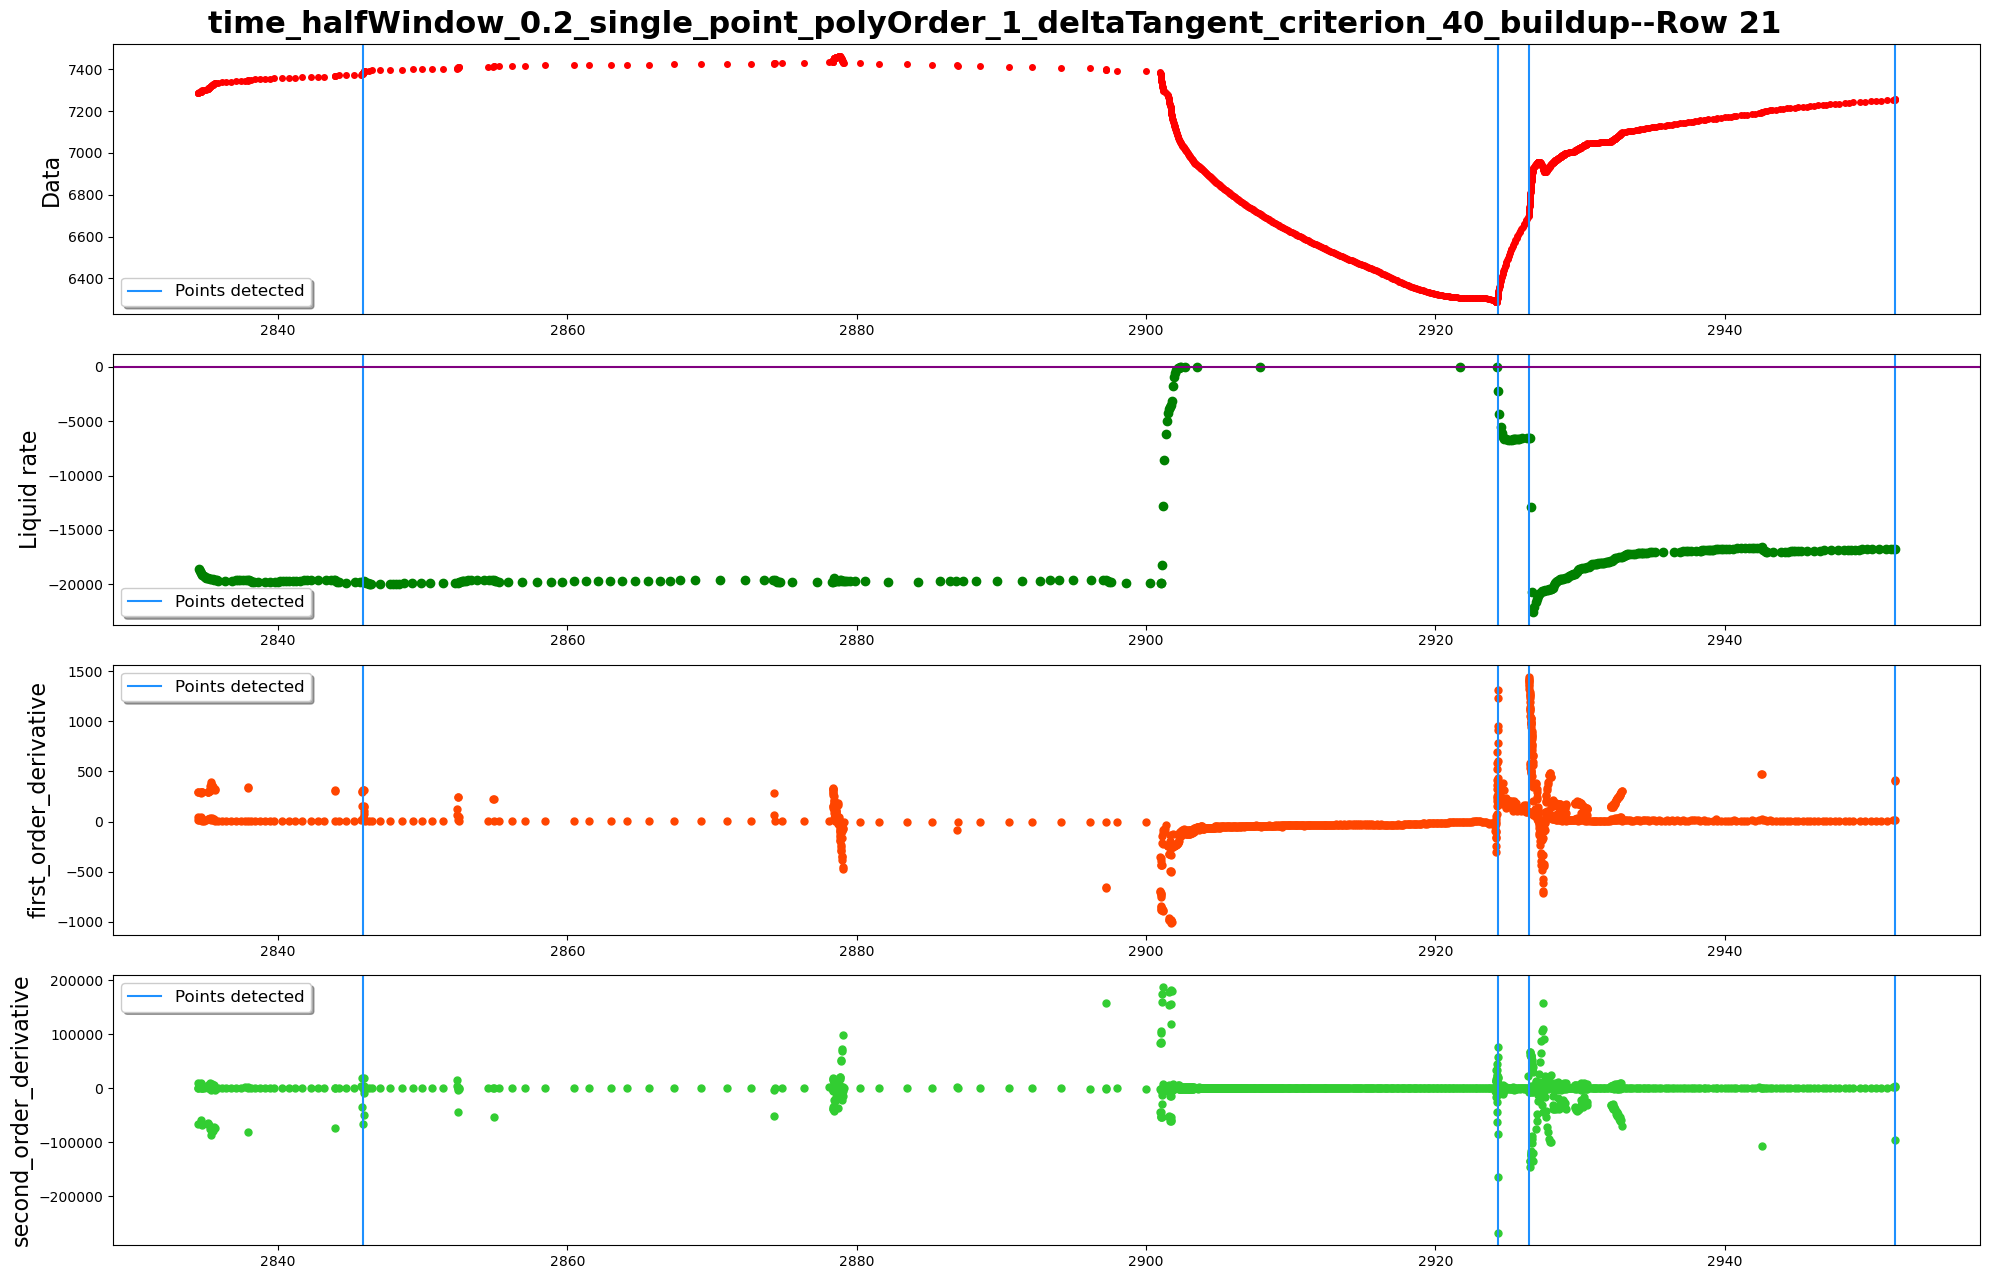

------row 22-----detected points:[26003]


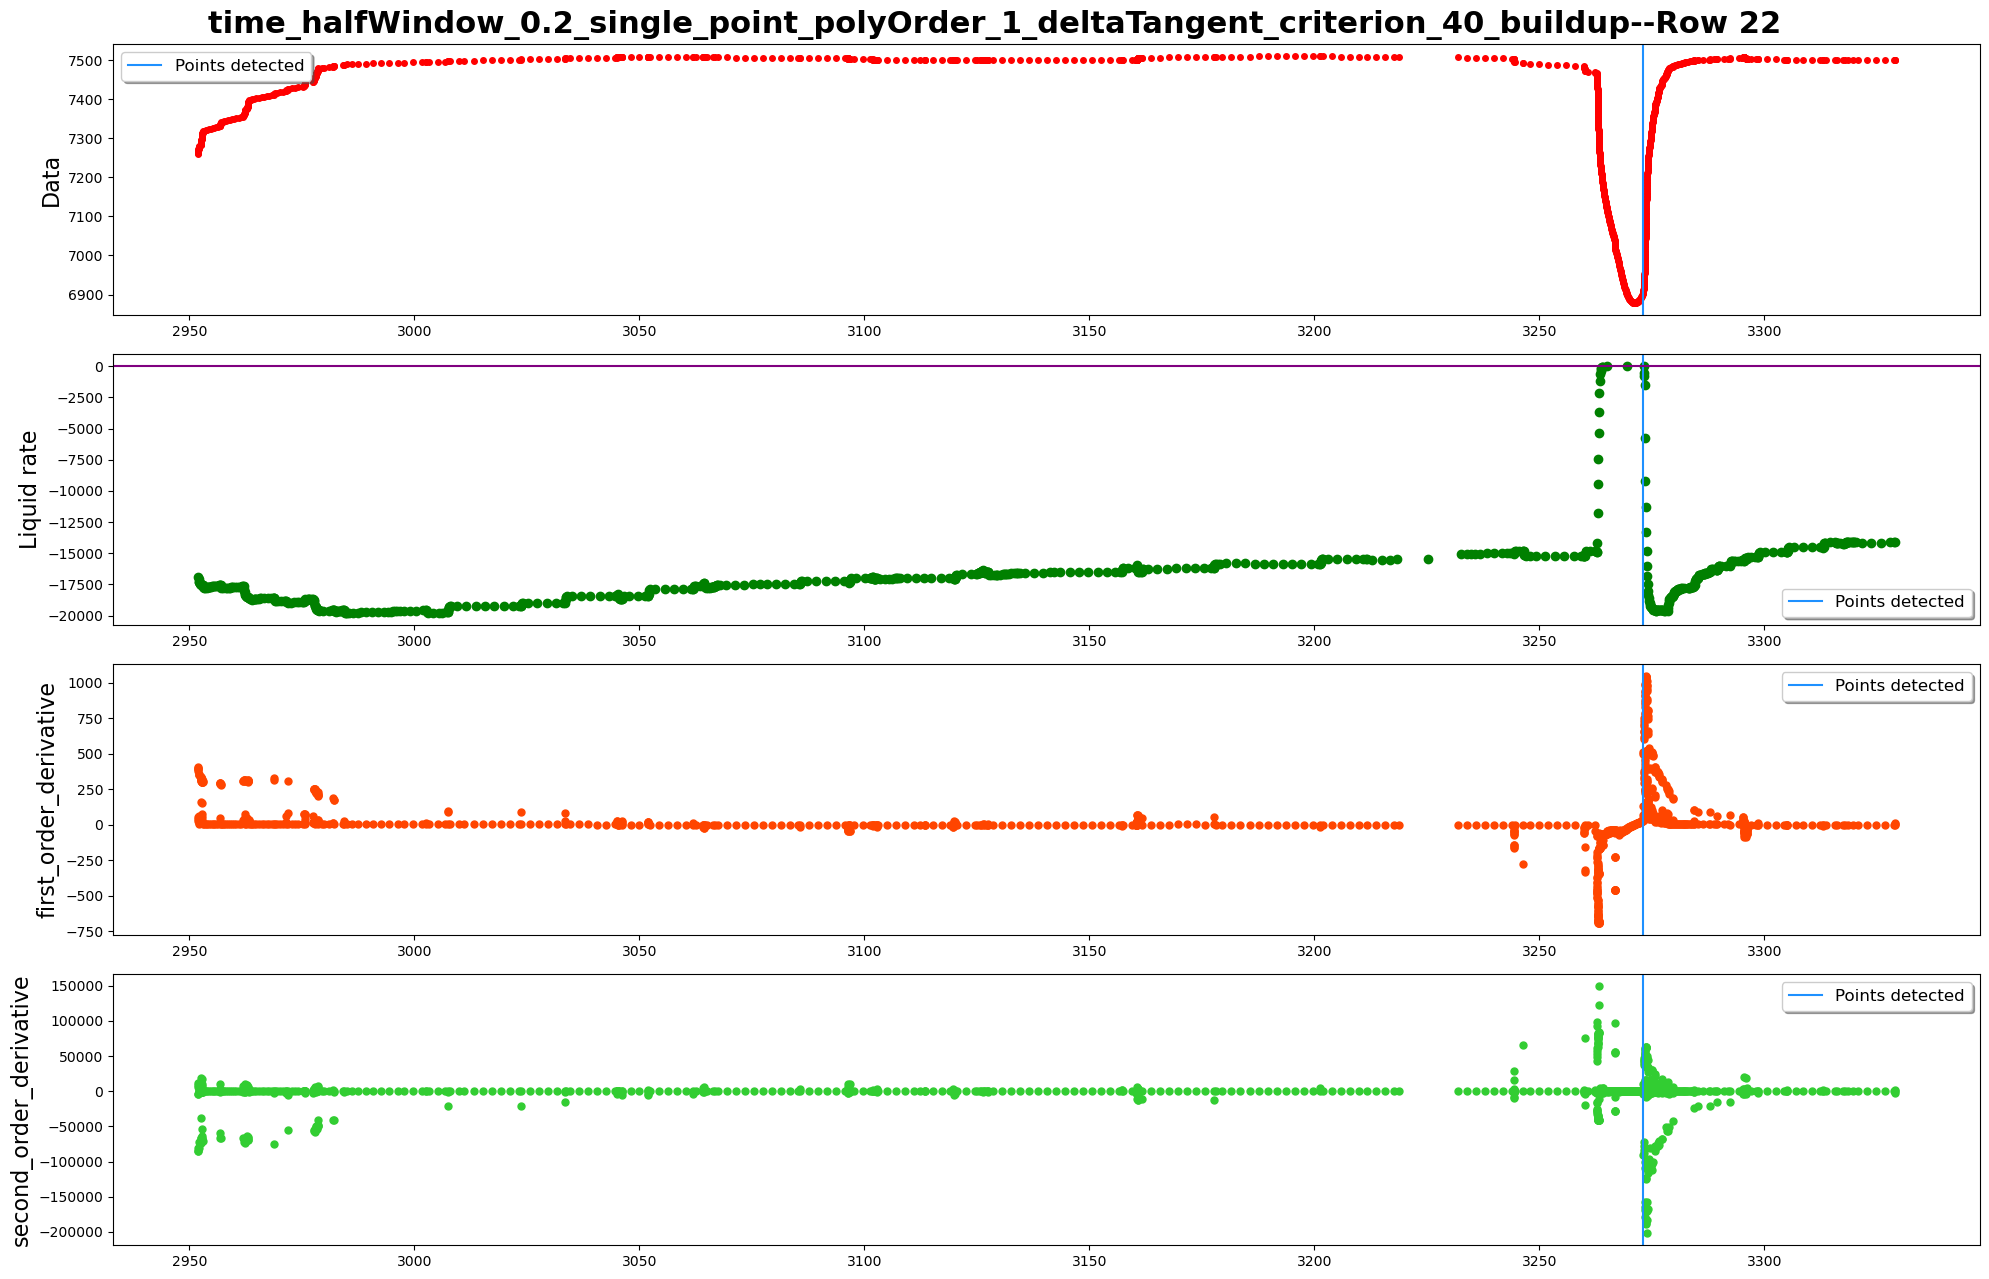

------row 23-----detected points:[26469, 26526, 26817, 26837]


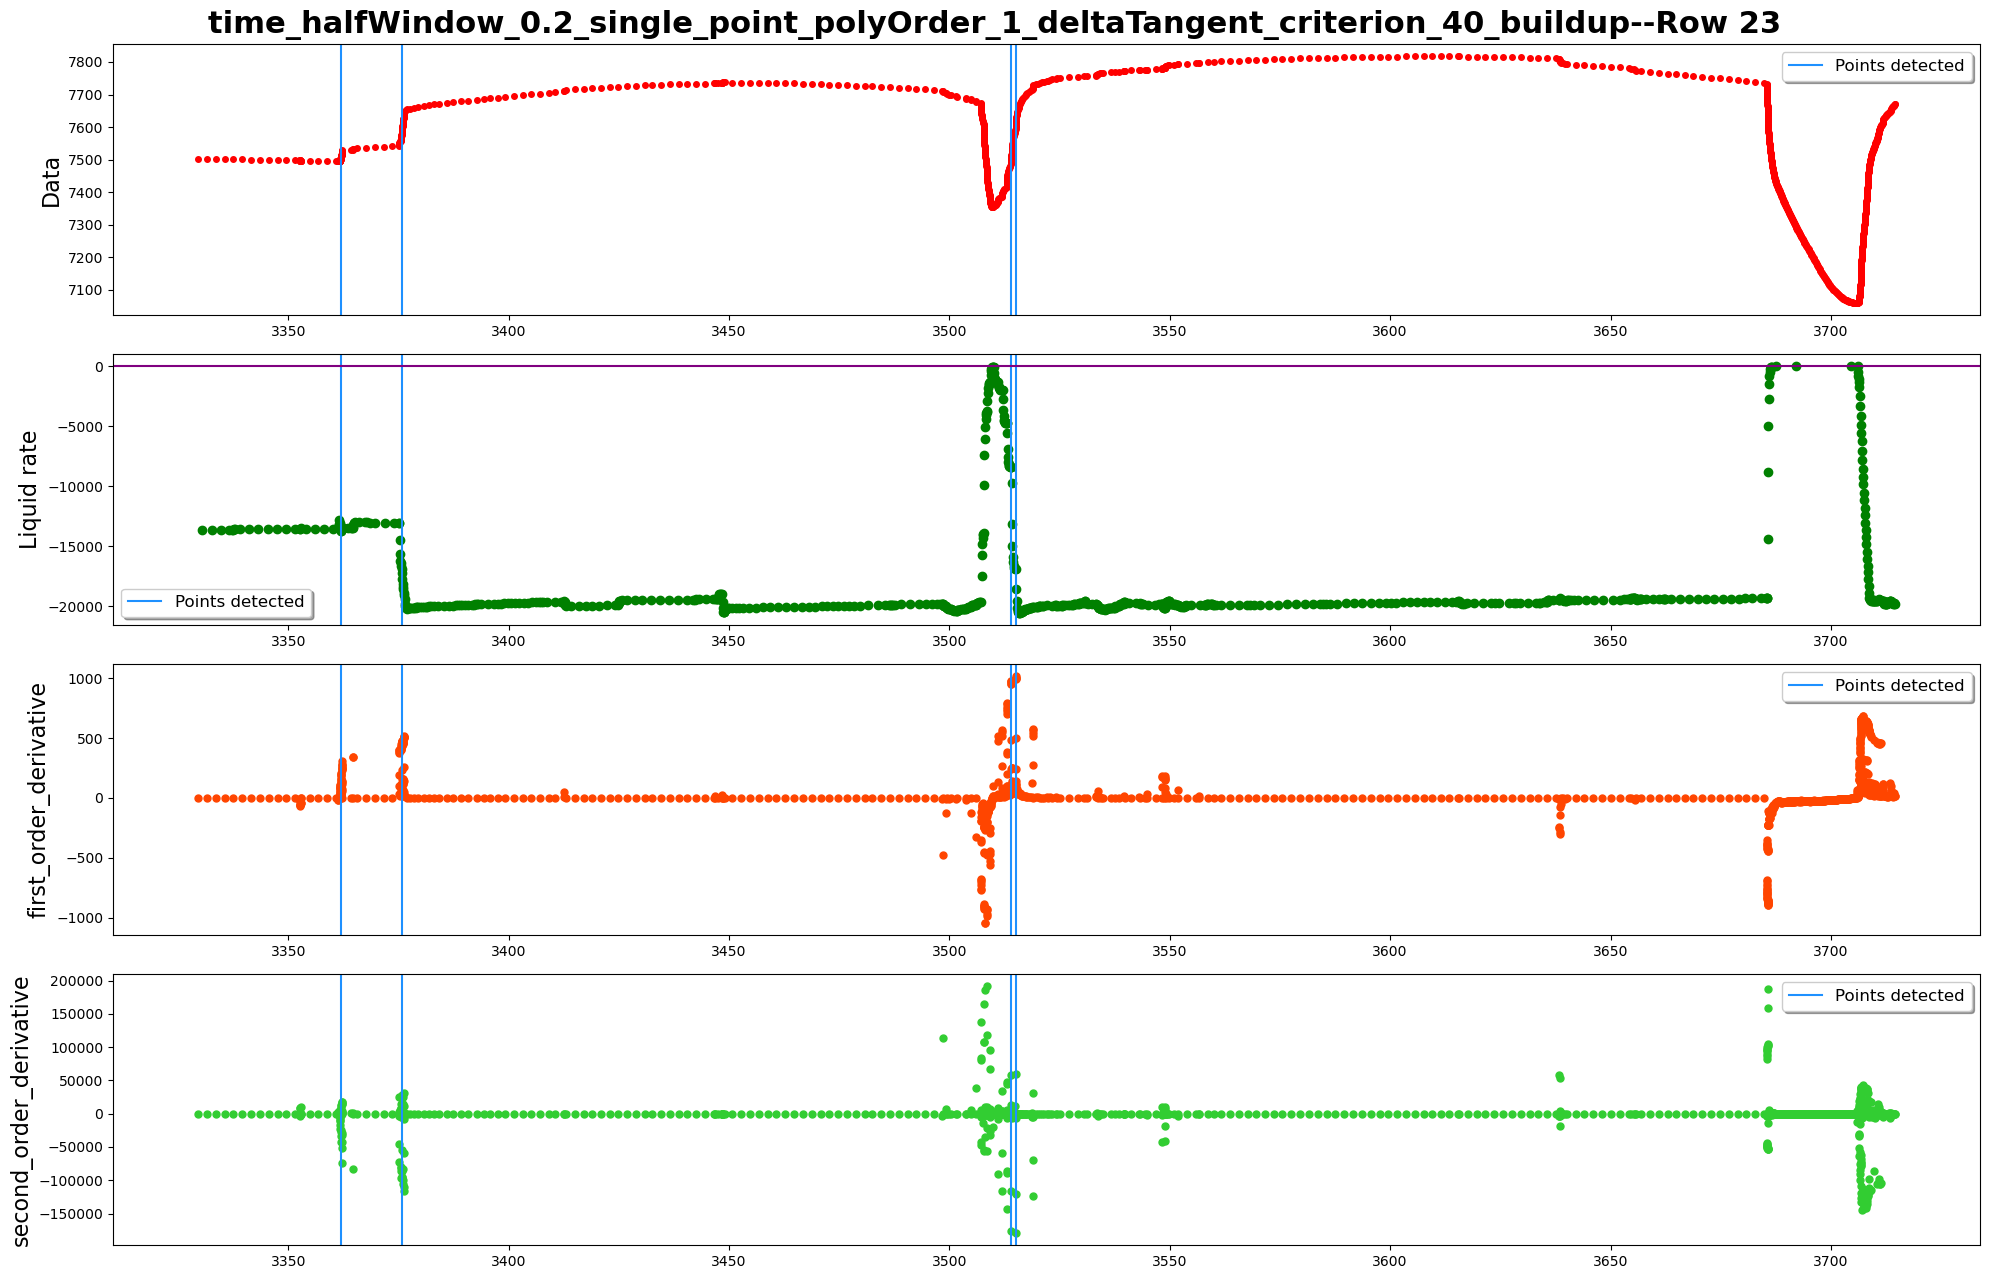

------row 24-----detected points:[27980, 28232, 28497, 28784]


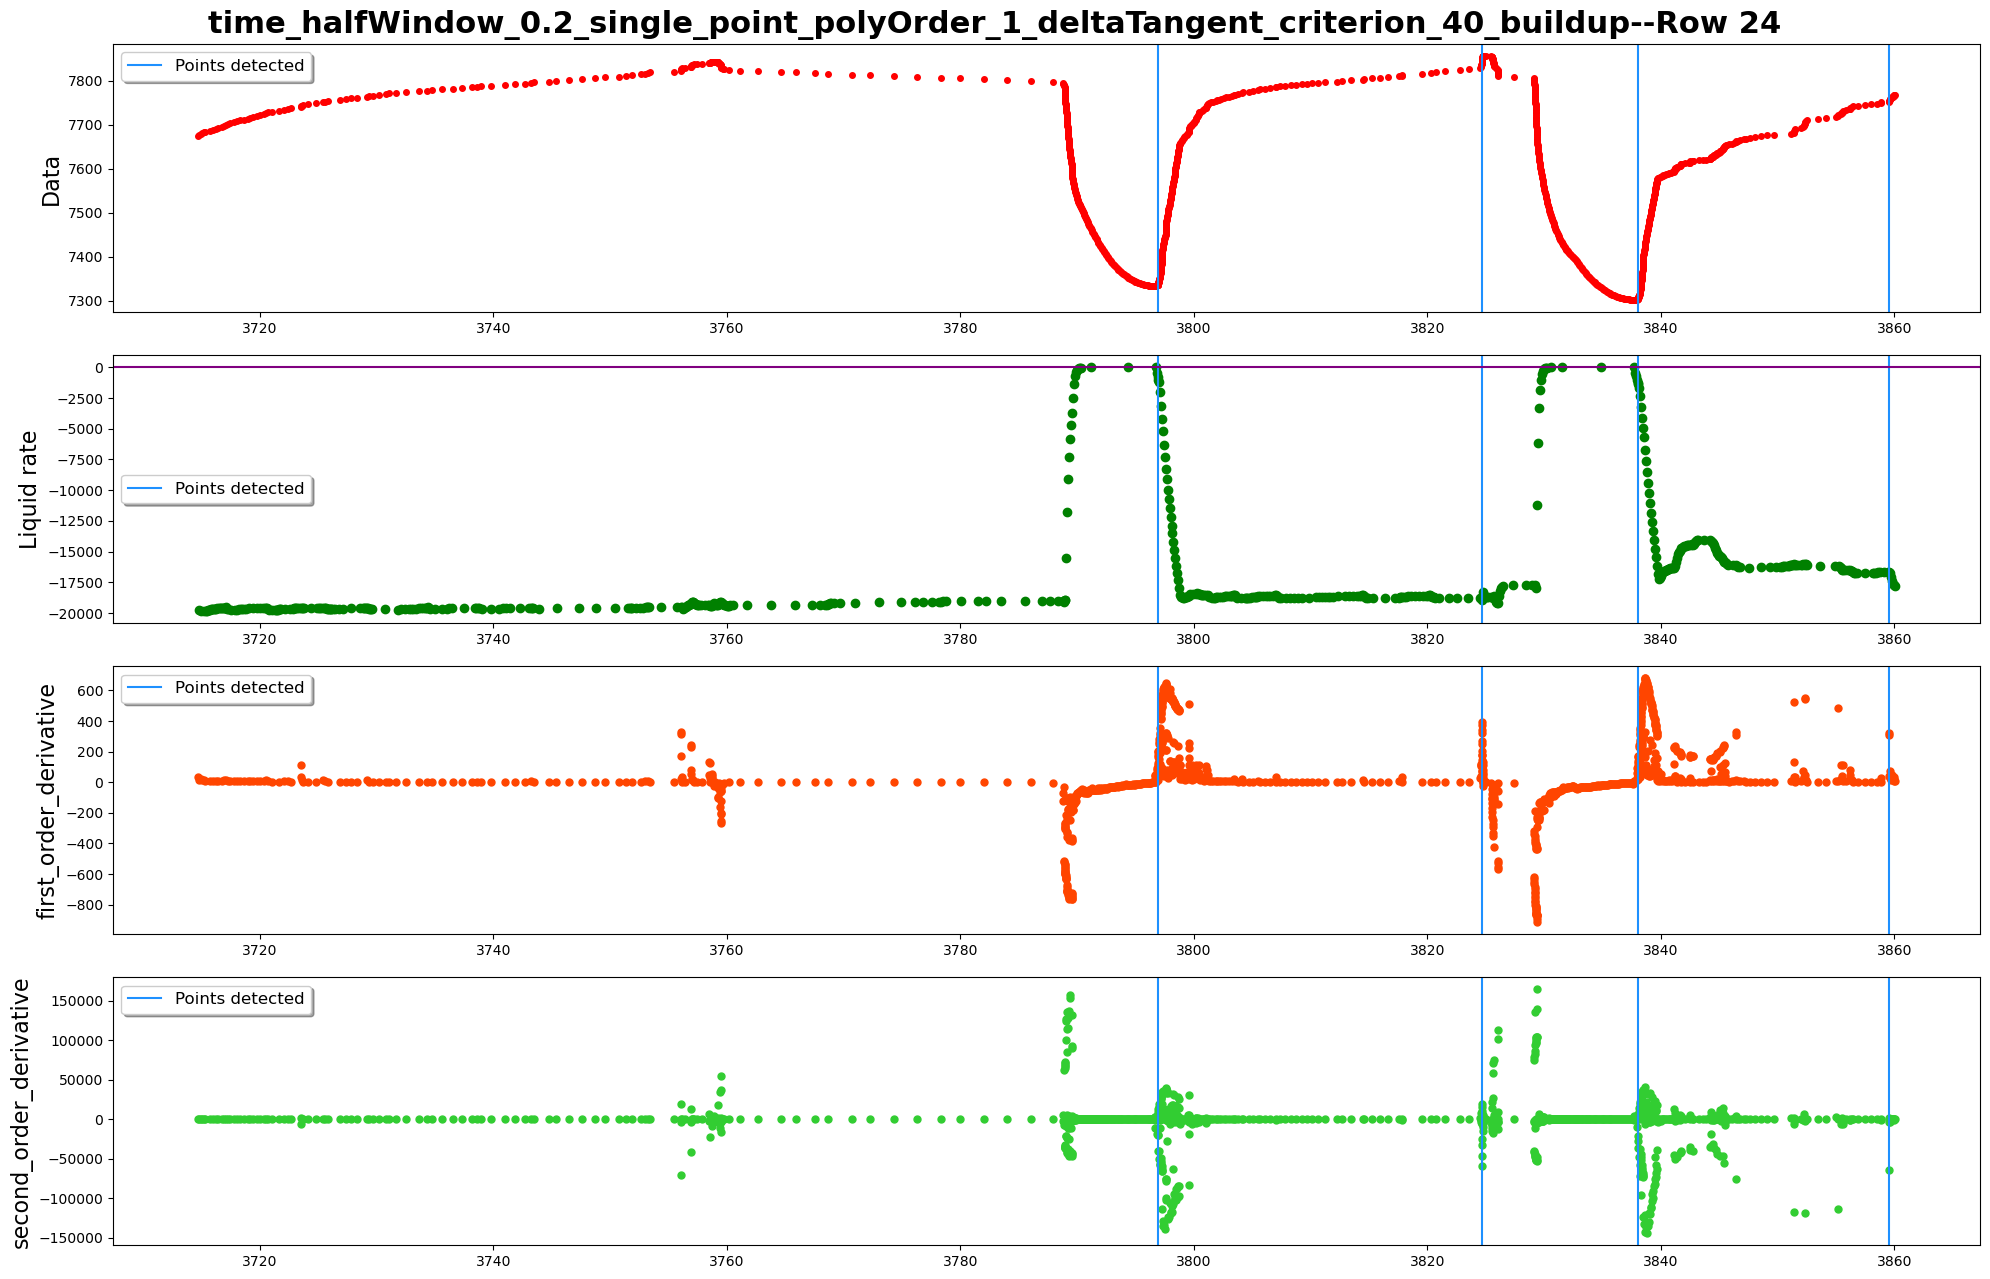

------row 25-----detected points:[29165, 29480, 29483, 29540, 29784]


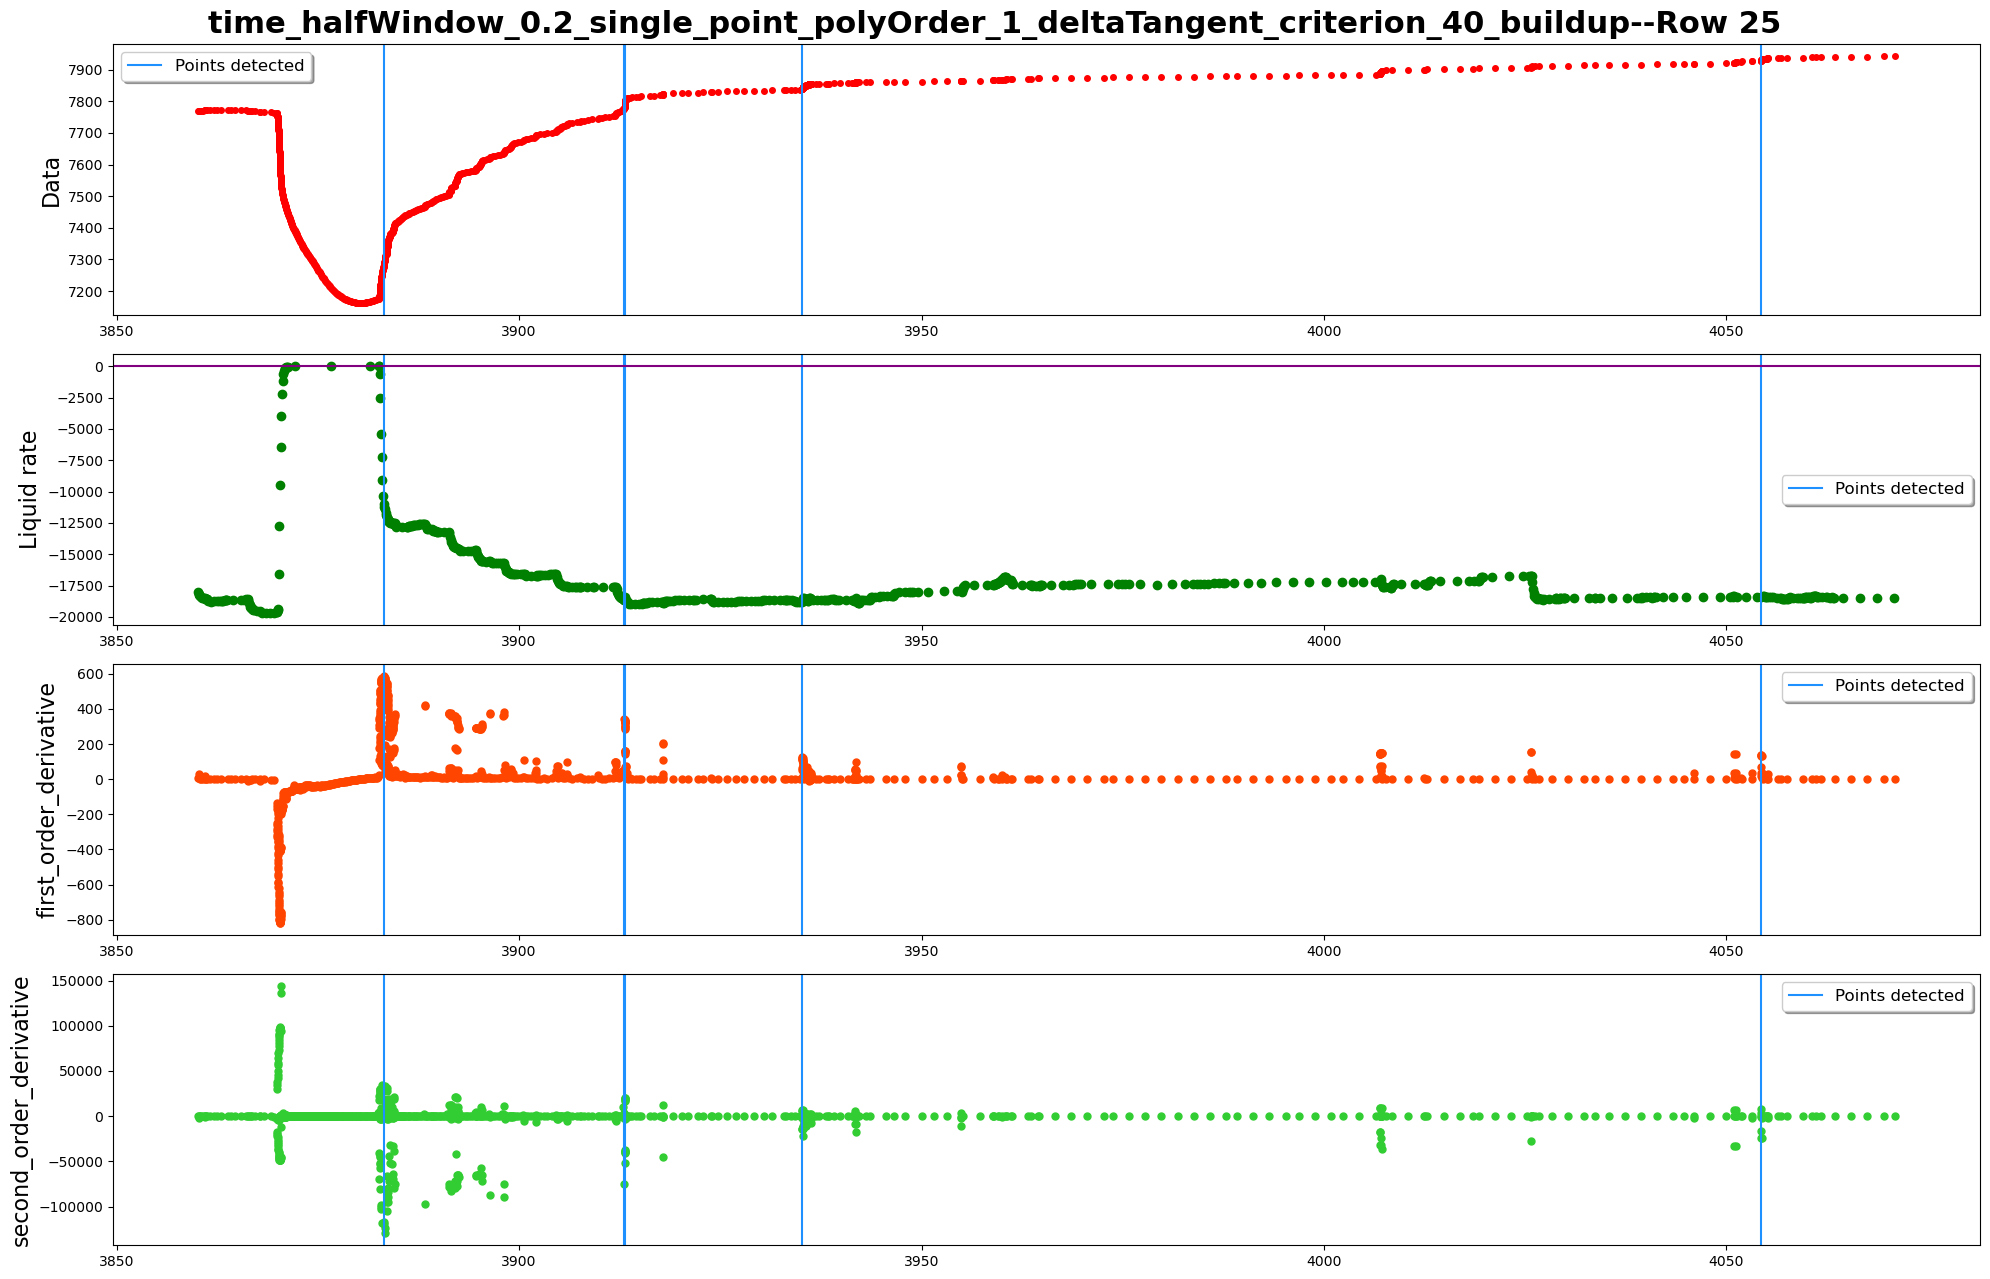

---initializing...
---plotting...


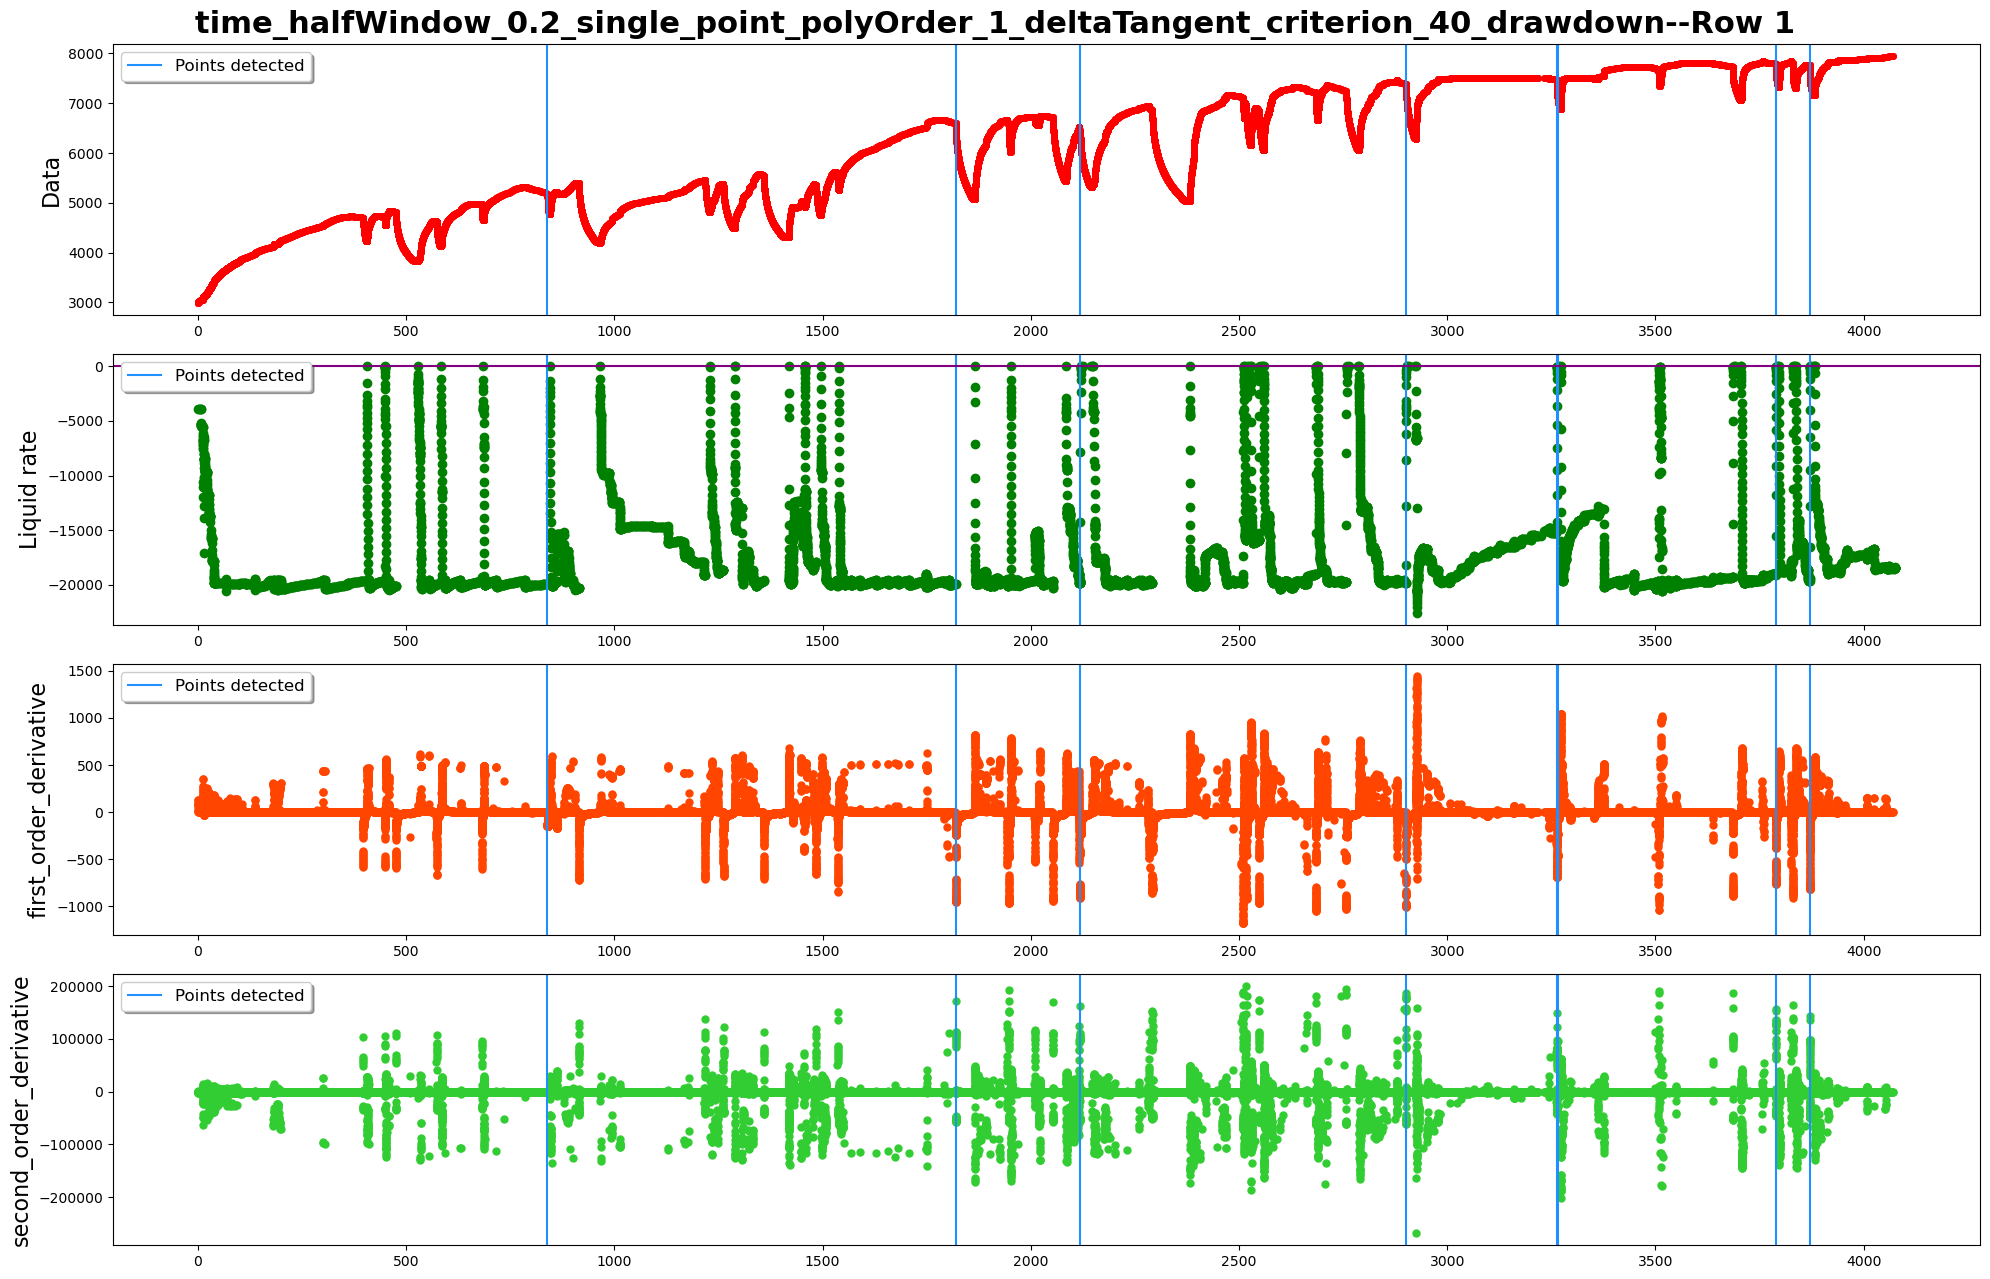

save whole....
detected 8 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


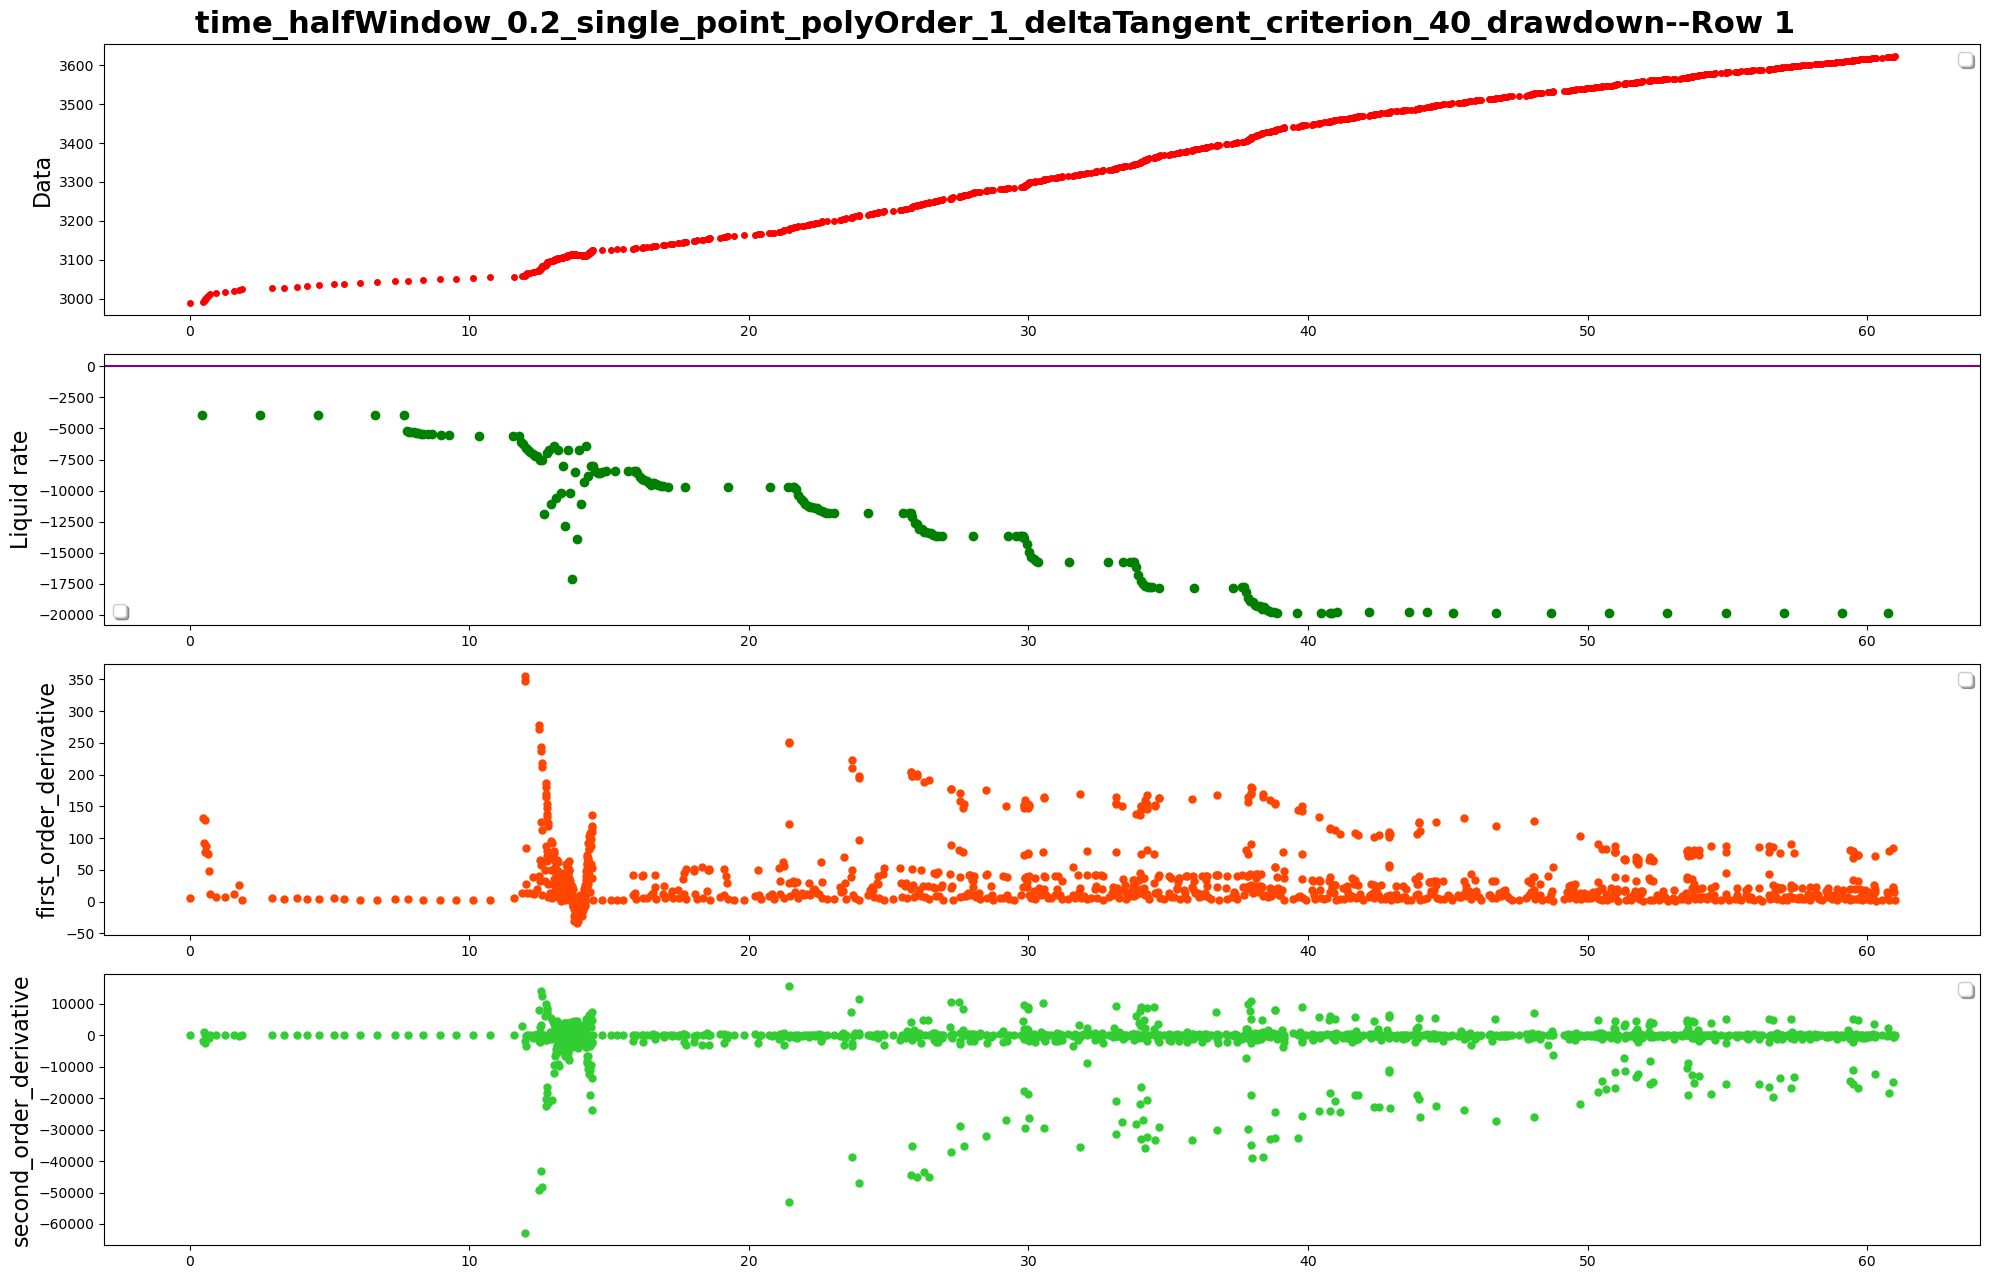

------row 2-----detected points:[]


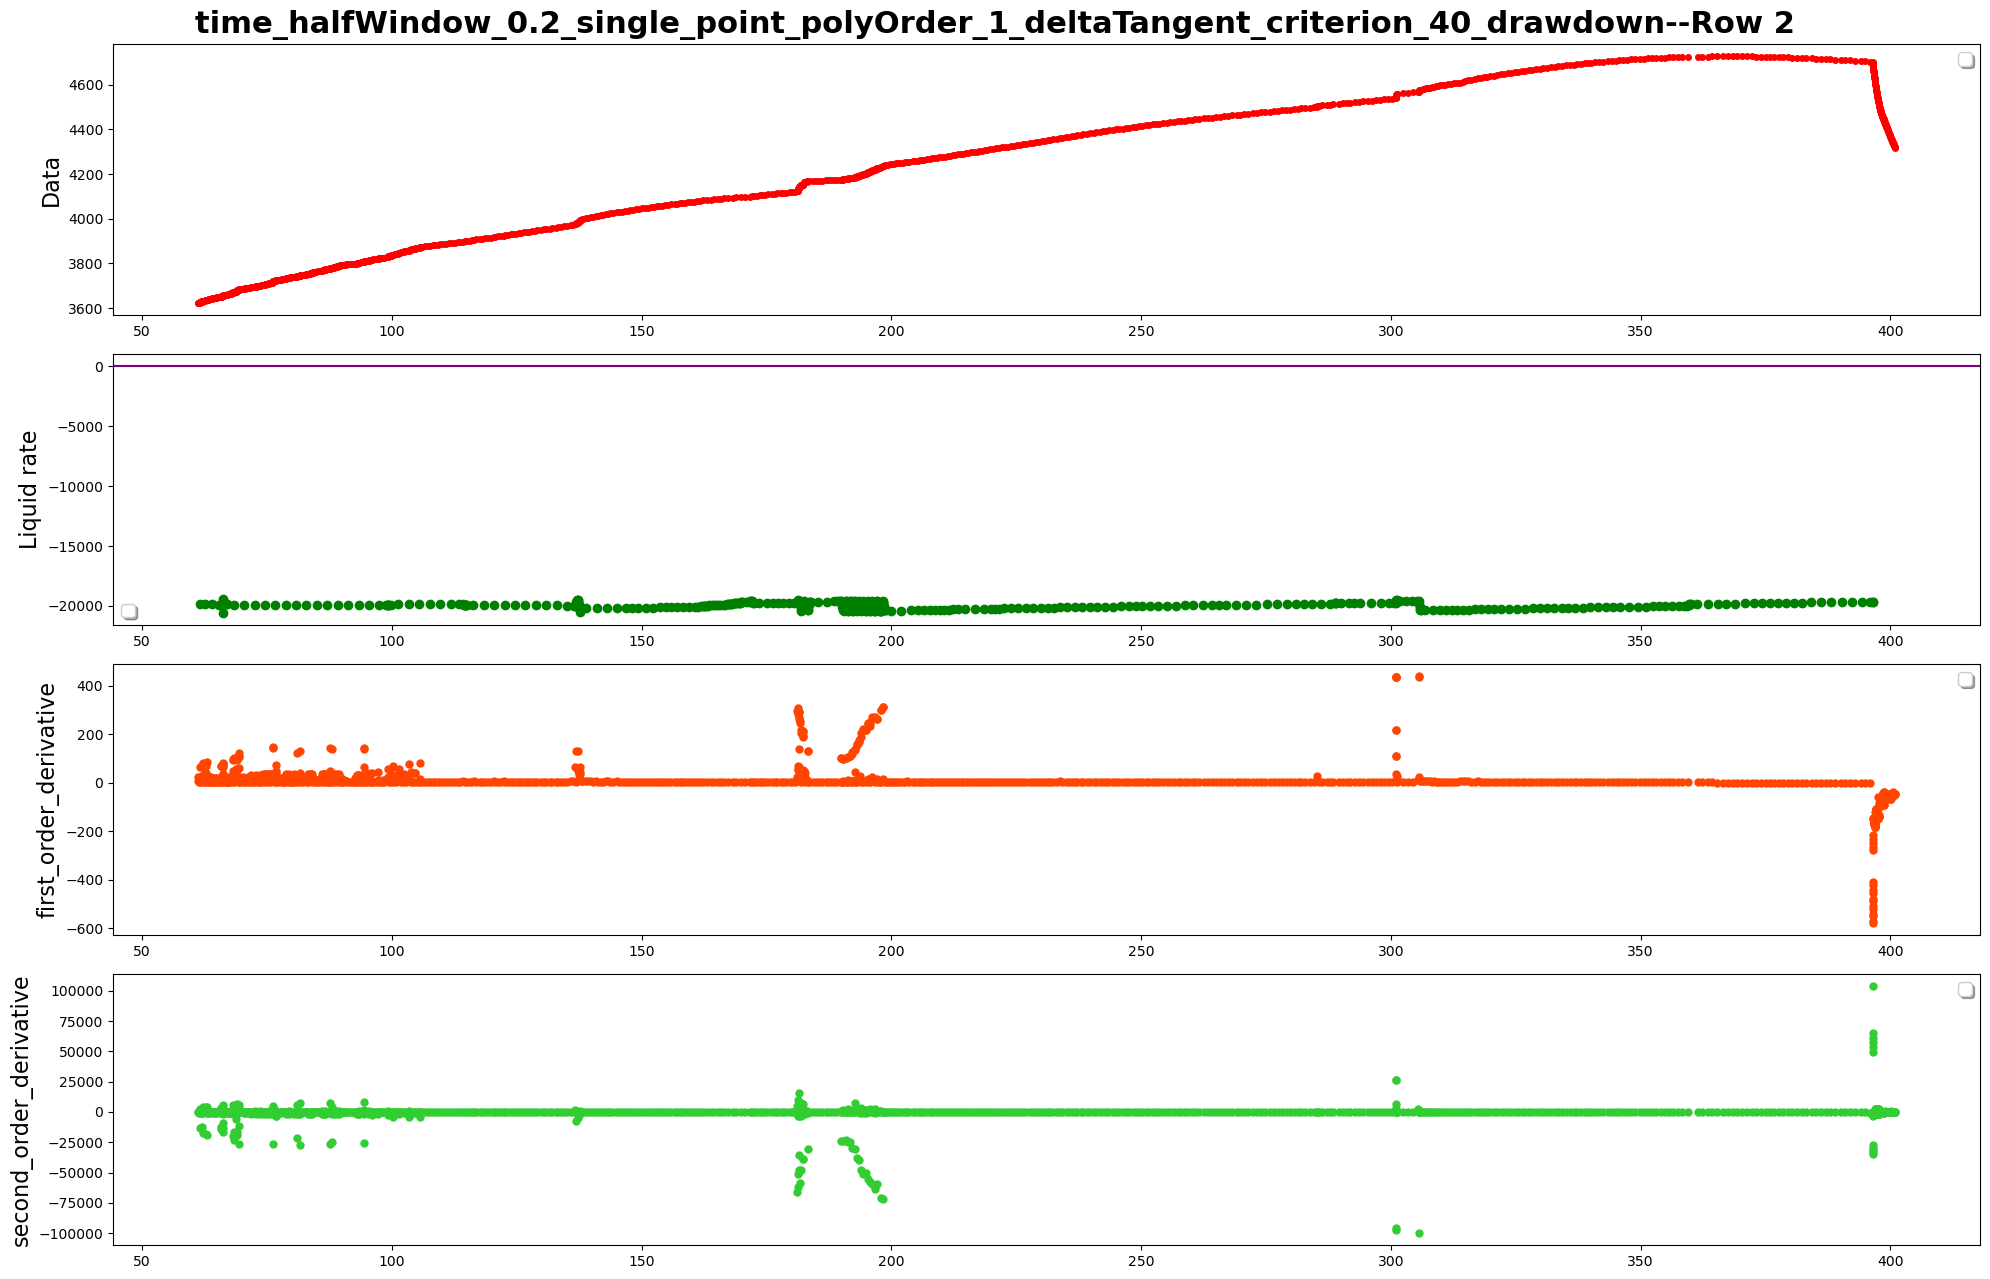

------row 3-----detected points:[]


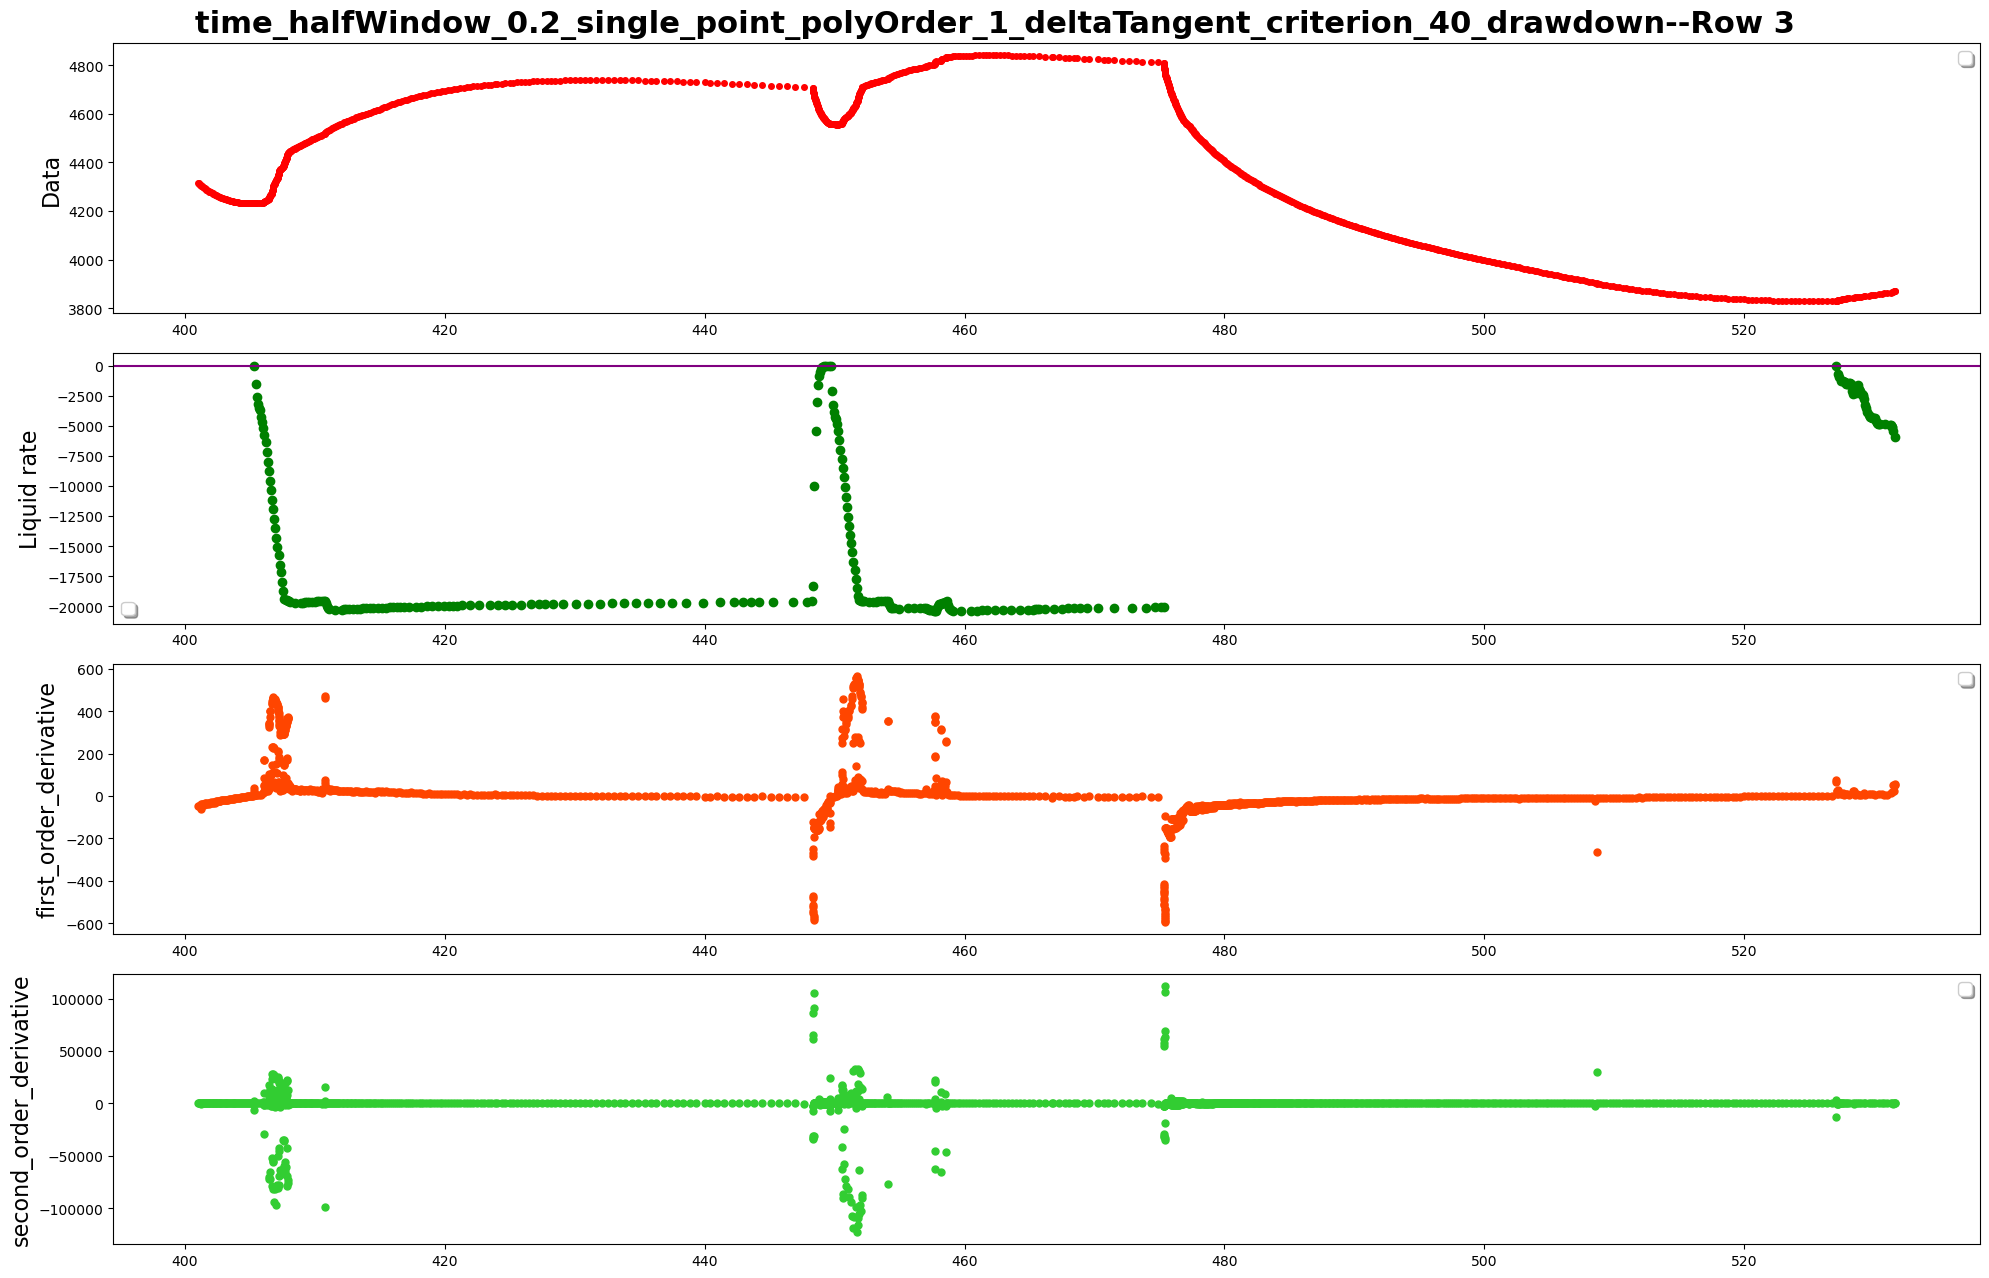

------row 4-----detected points:[]


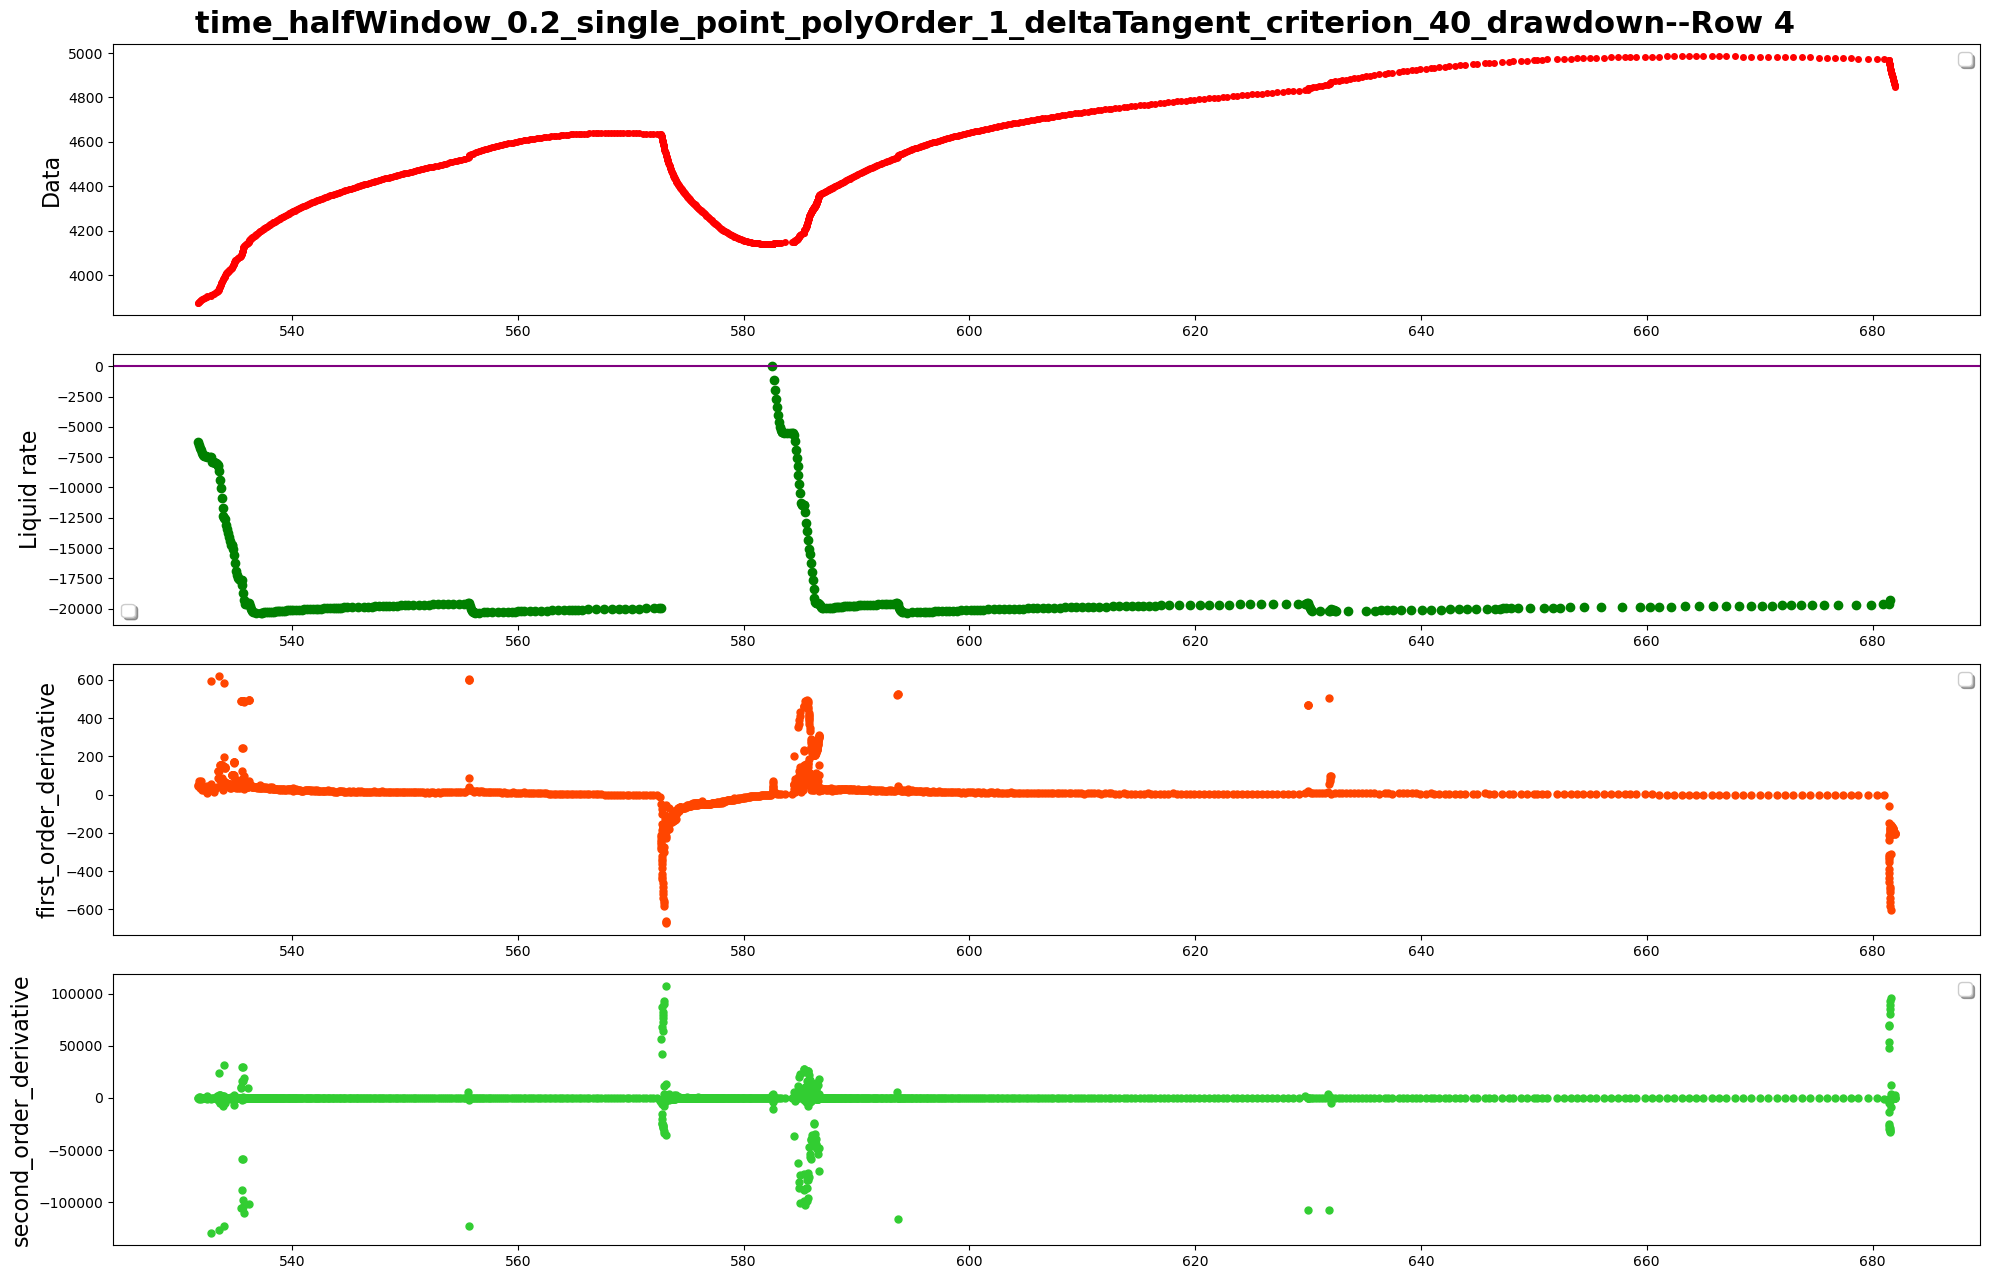

------row 5-----detected points:[5303]


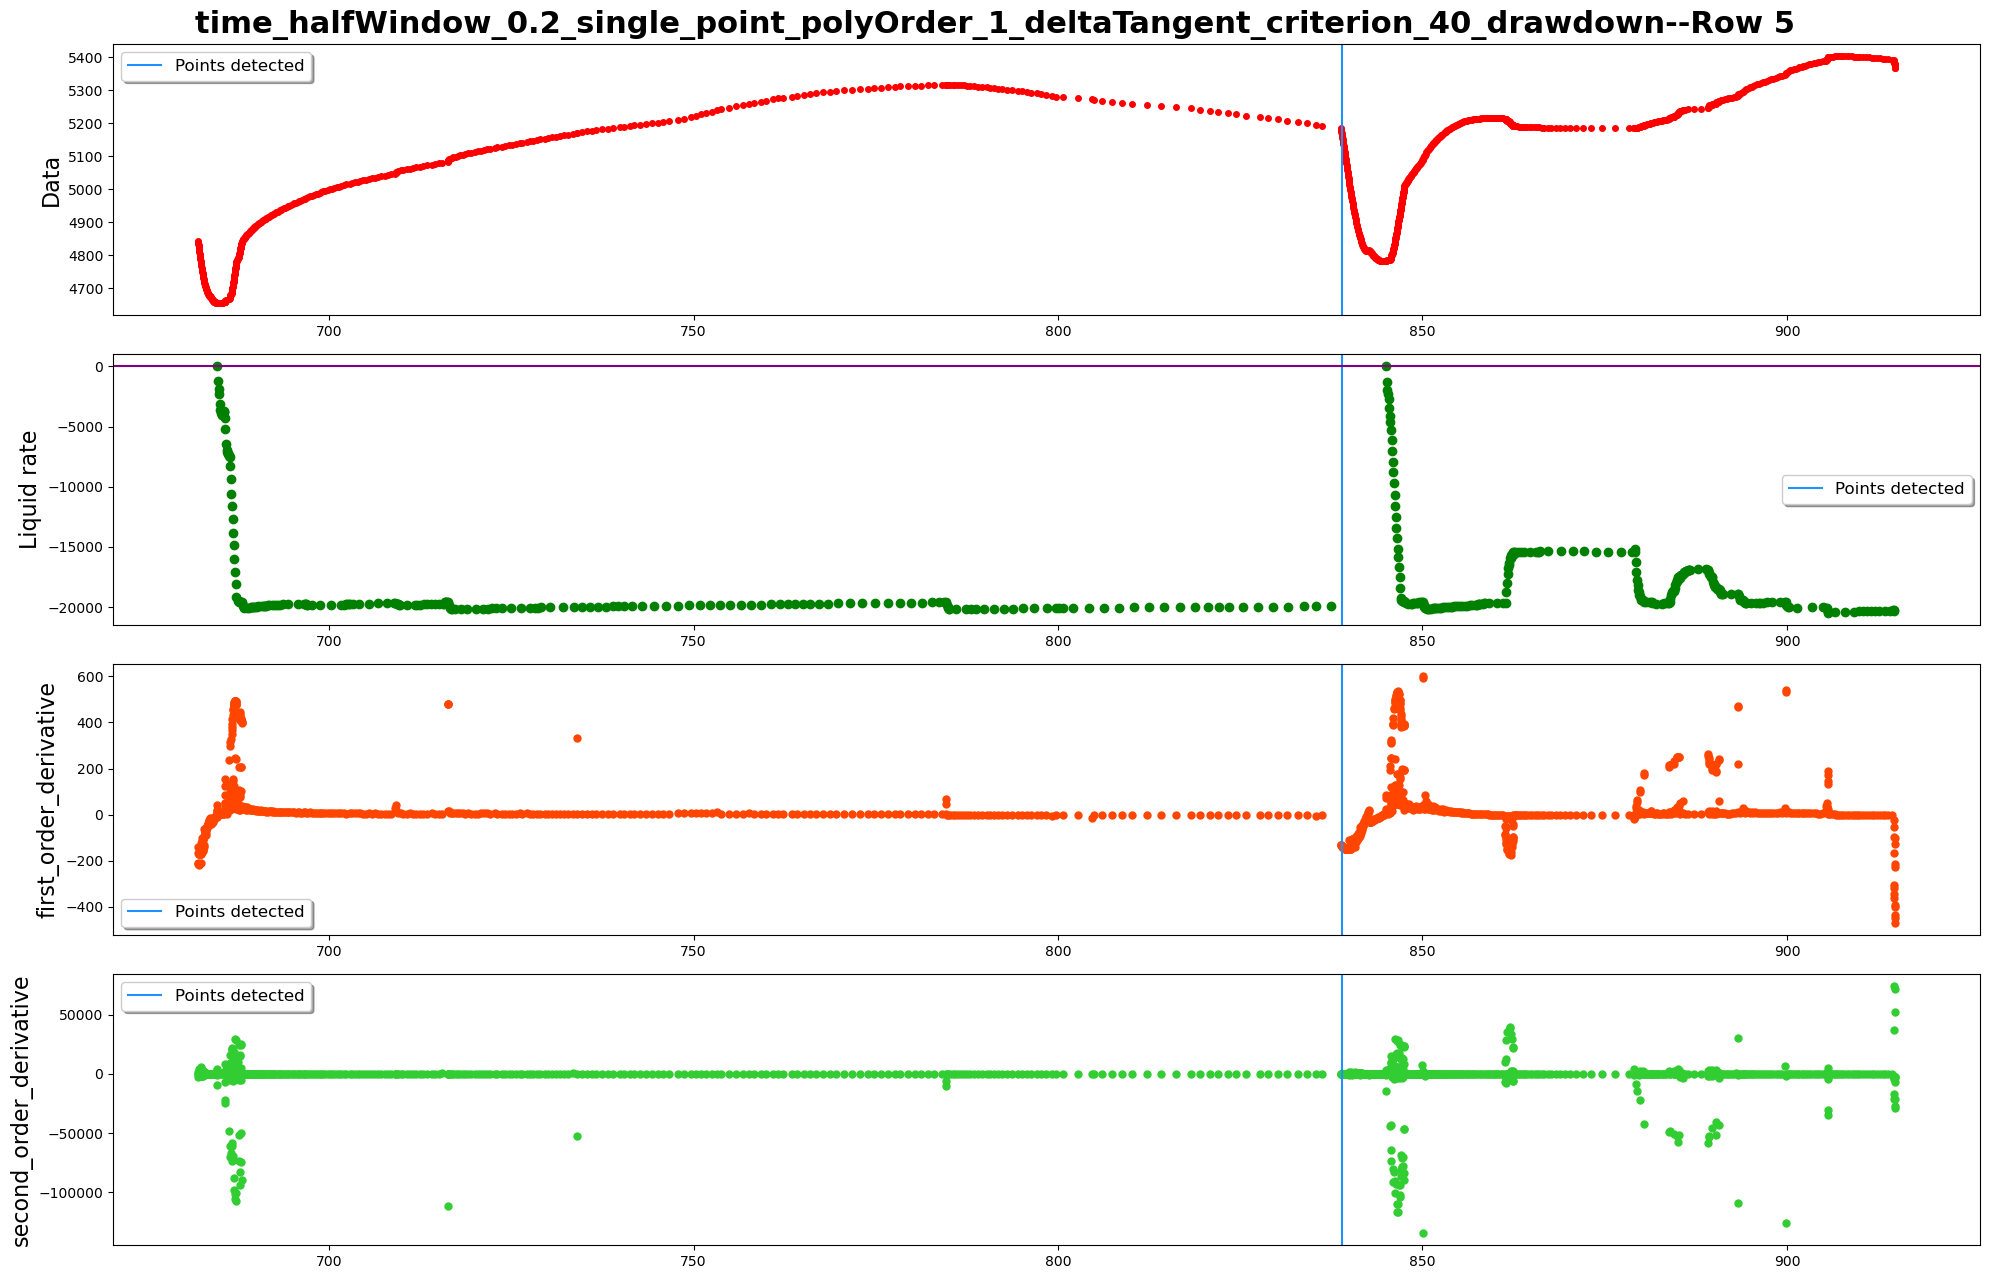

------row 6-----detected points:[]


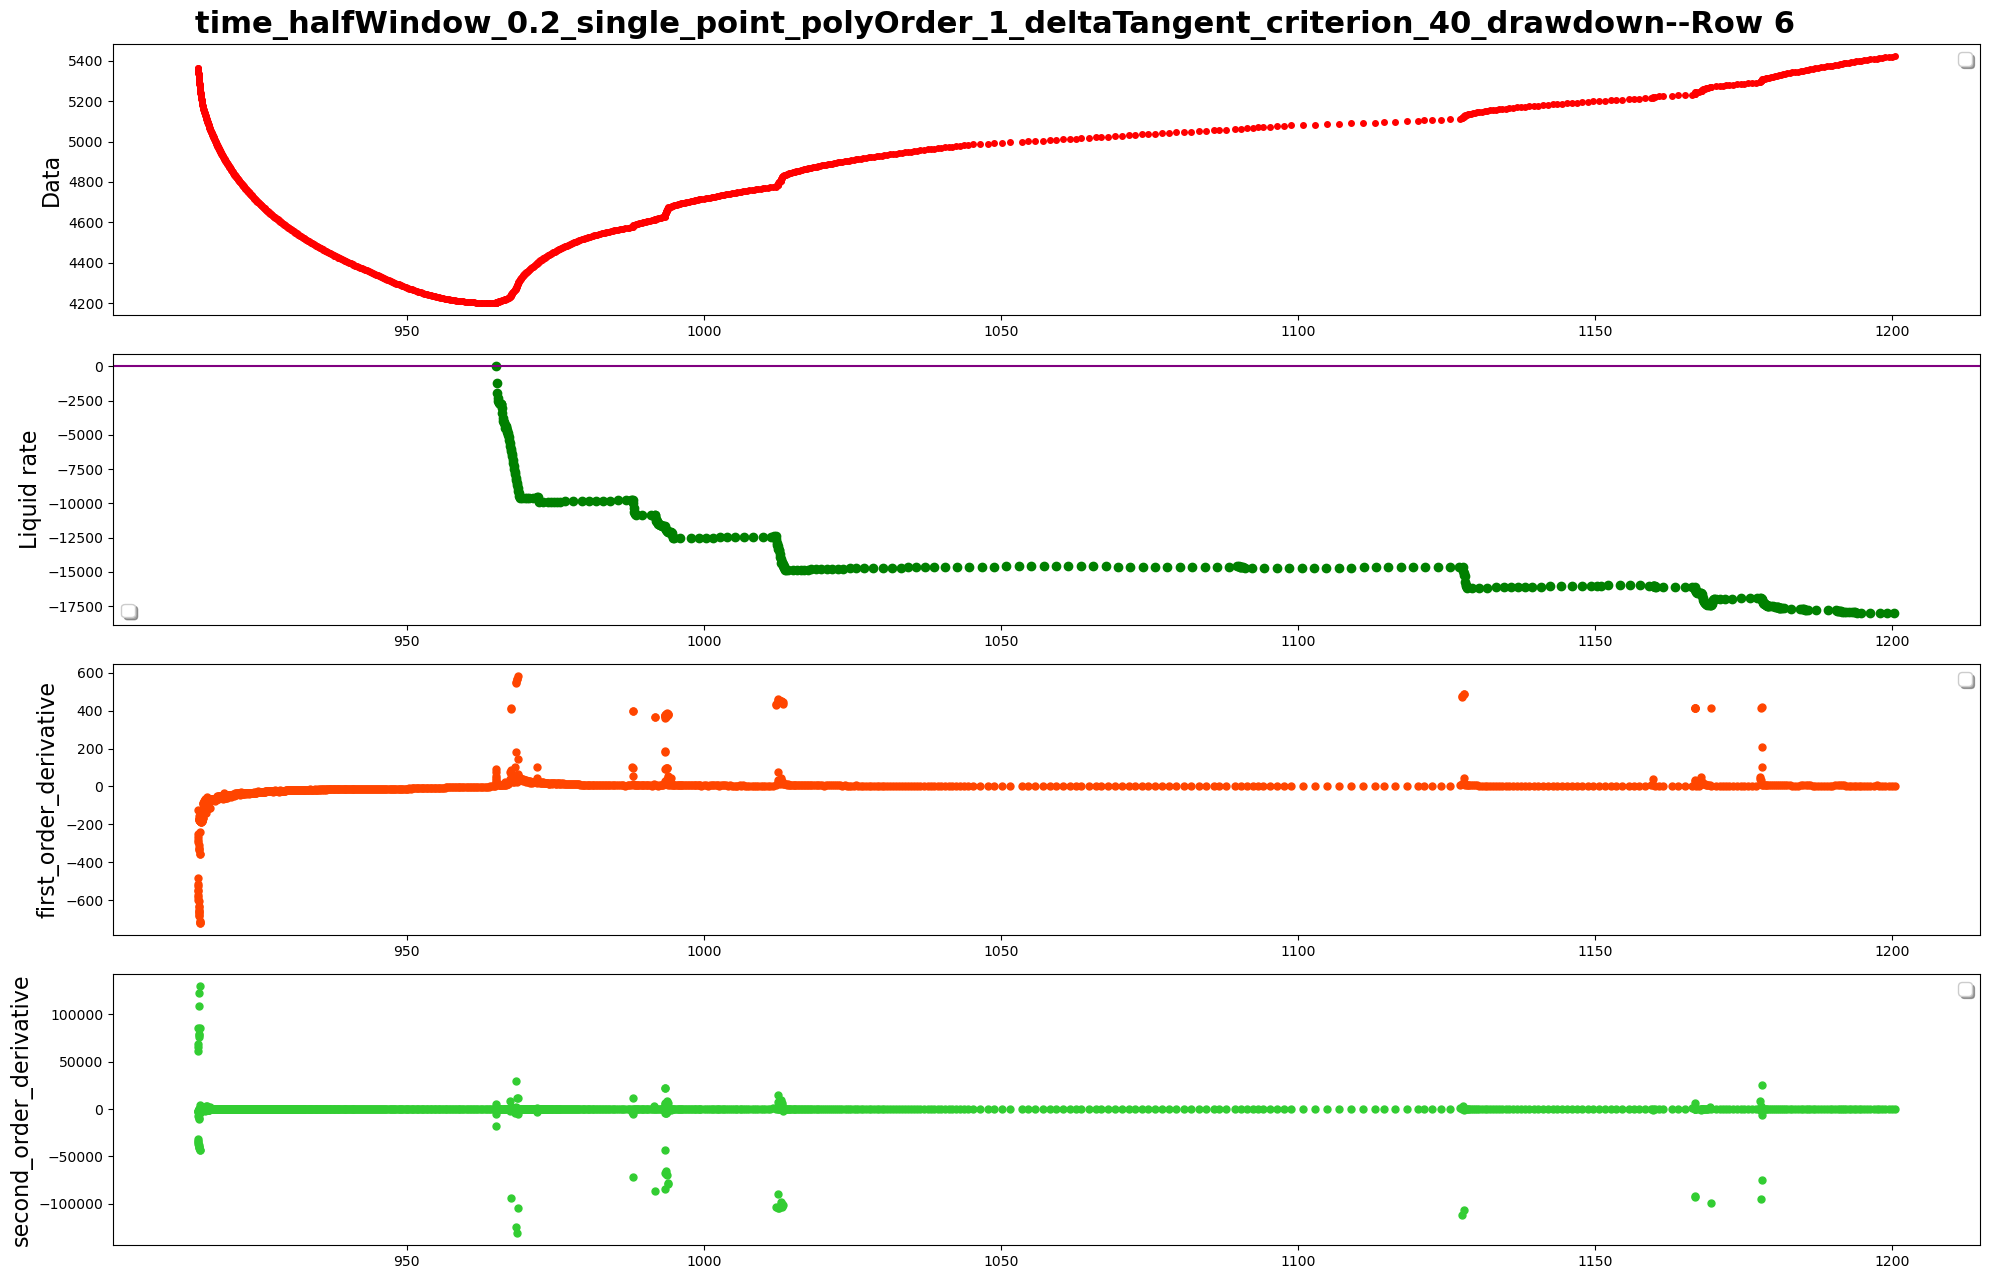

------row 7-----detected points:[]


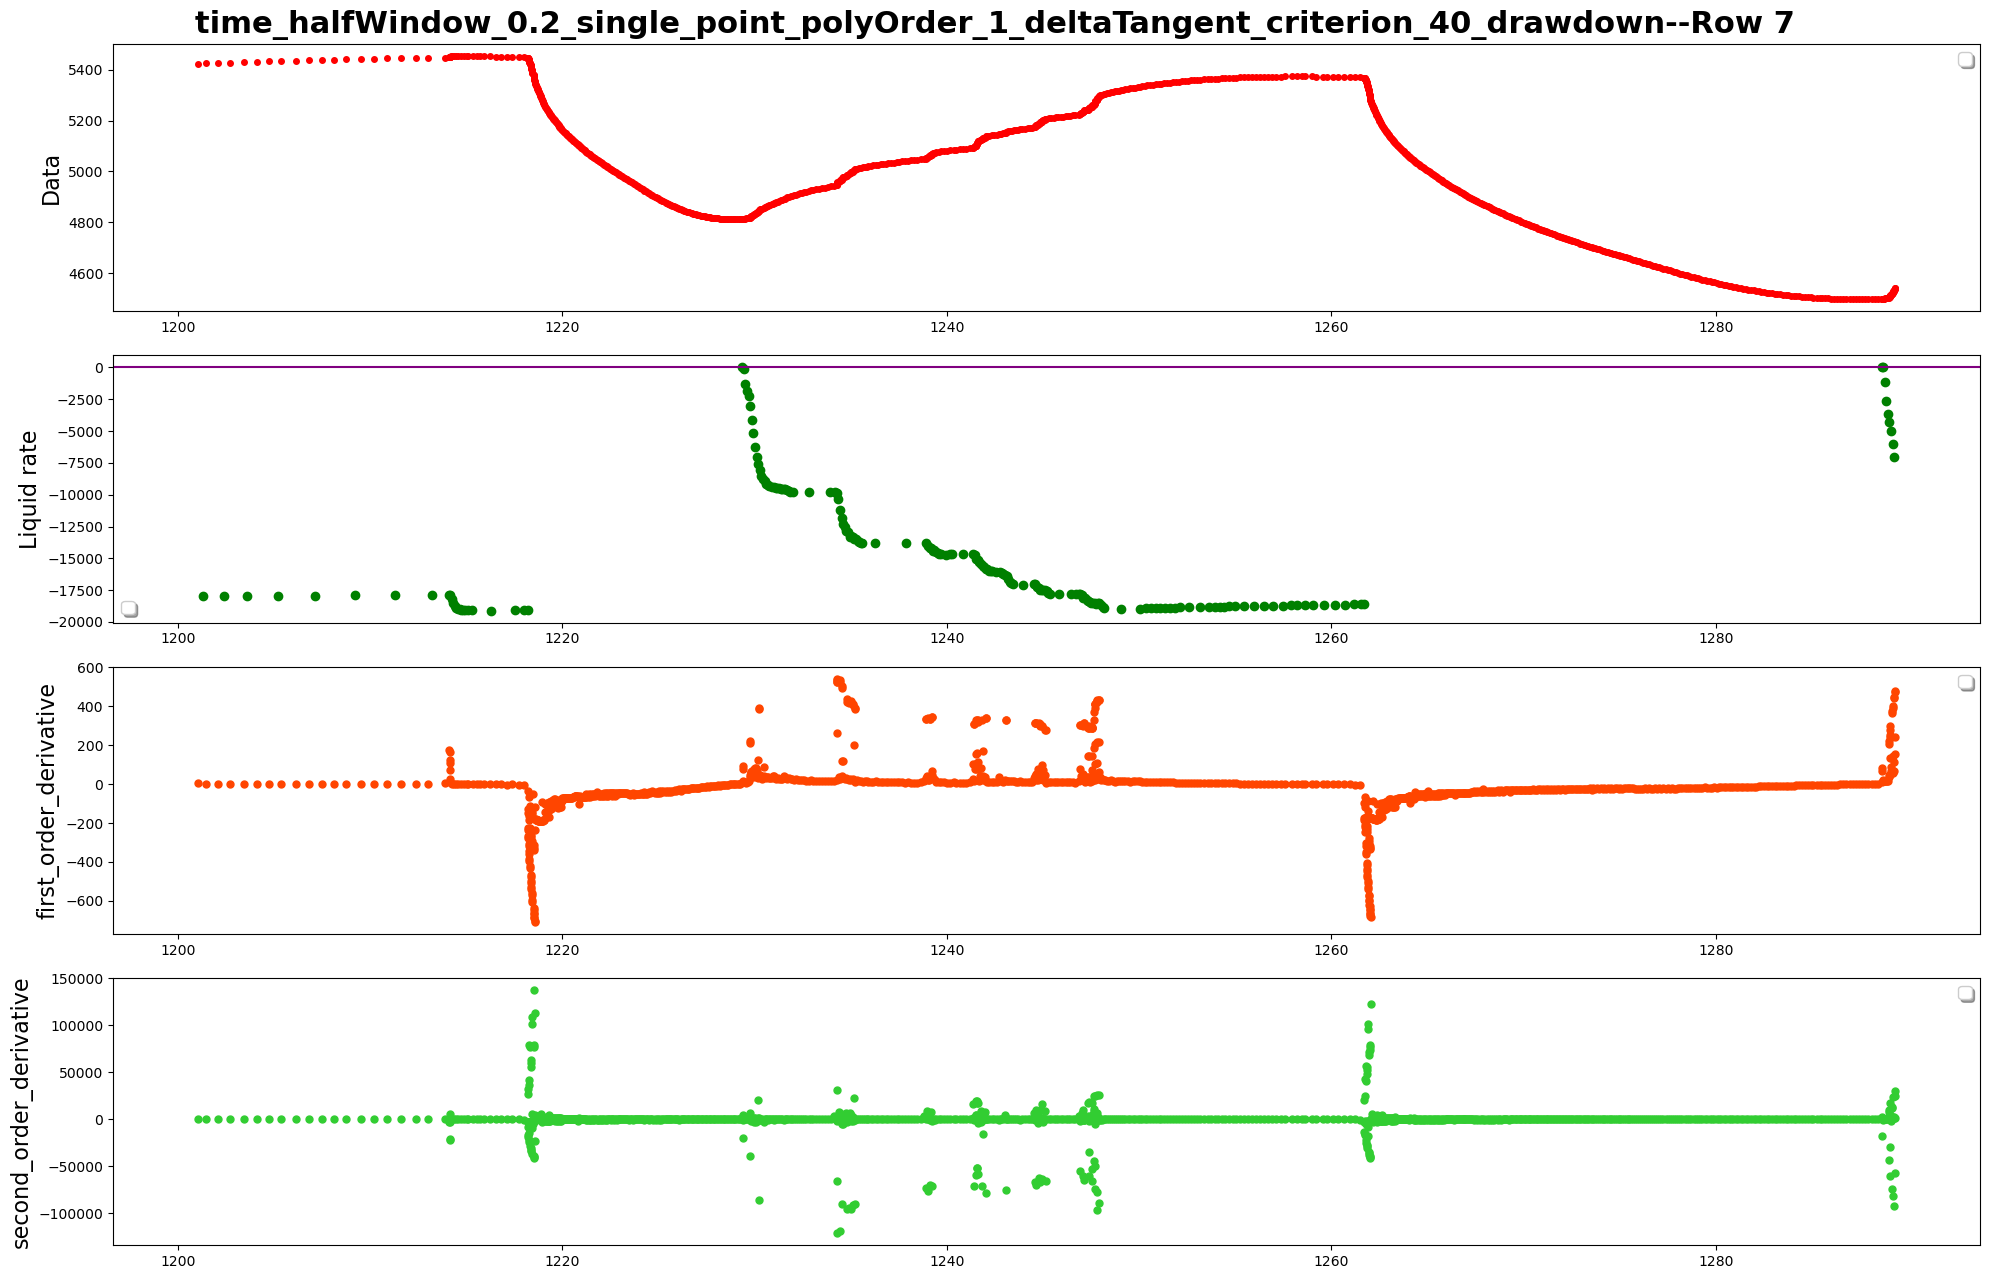

------row 8-----detected points:[]


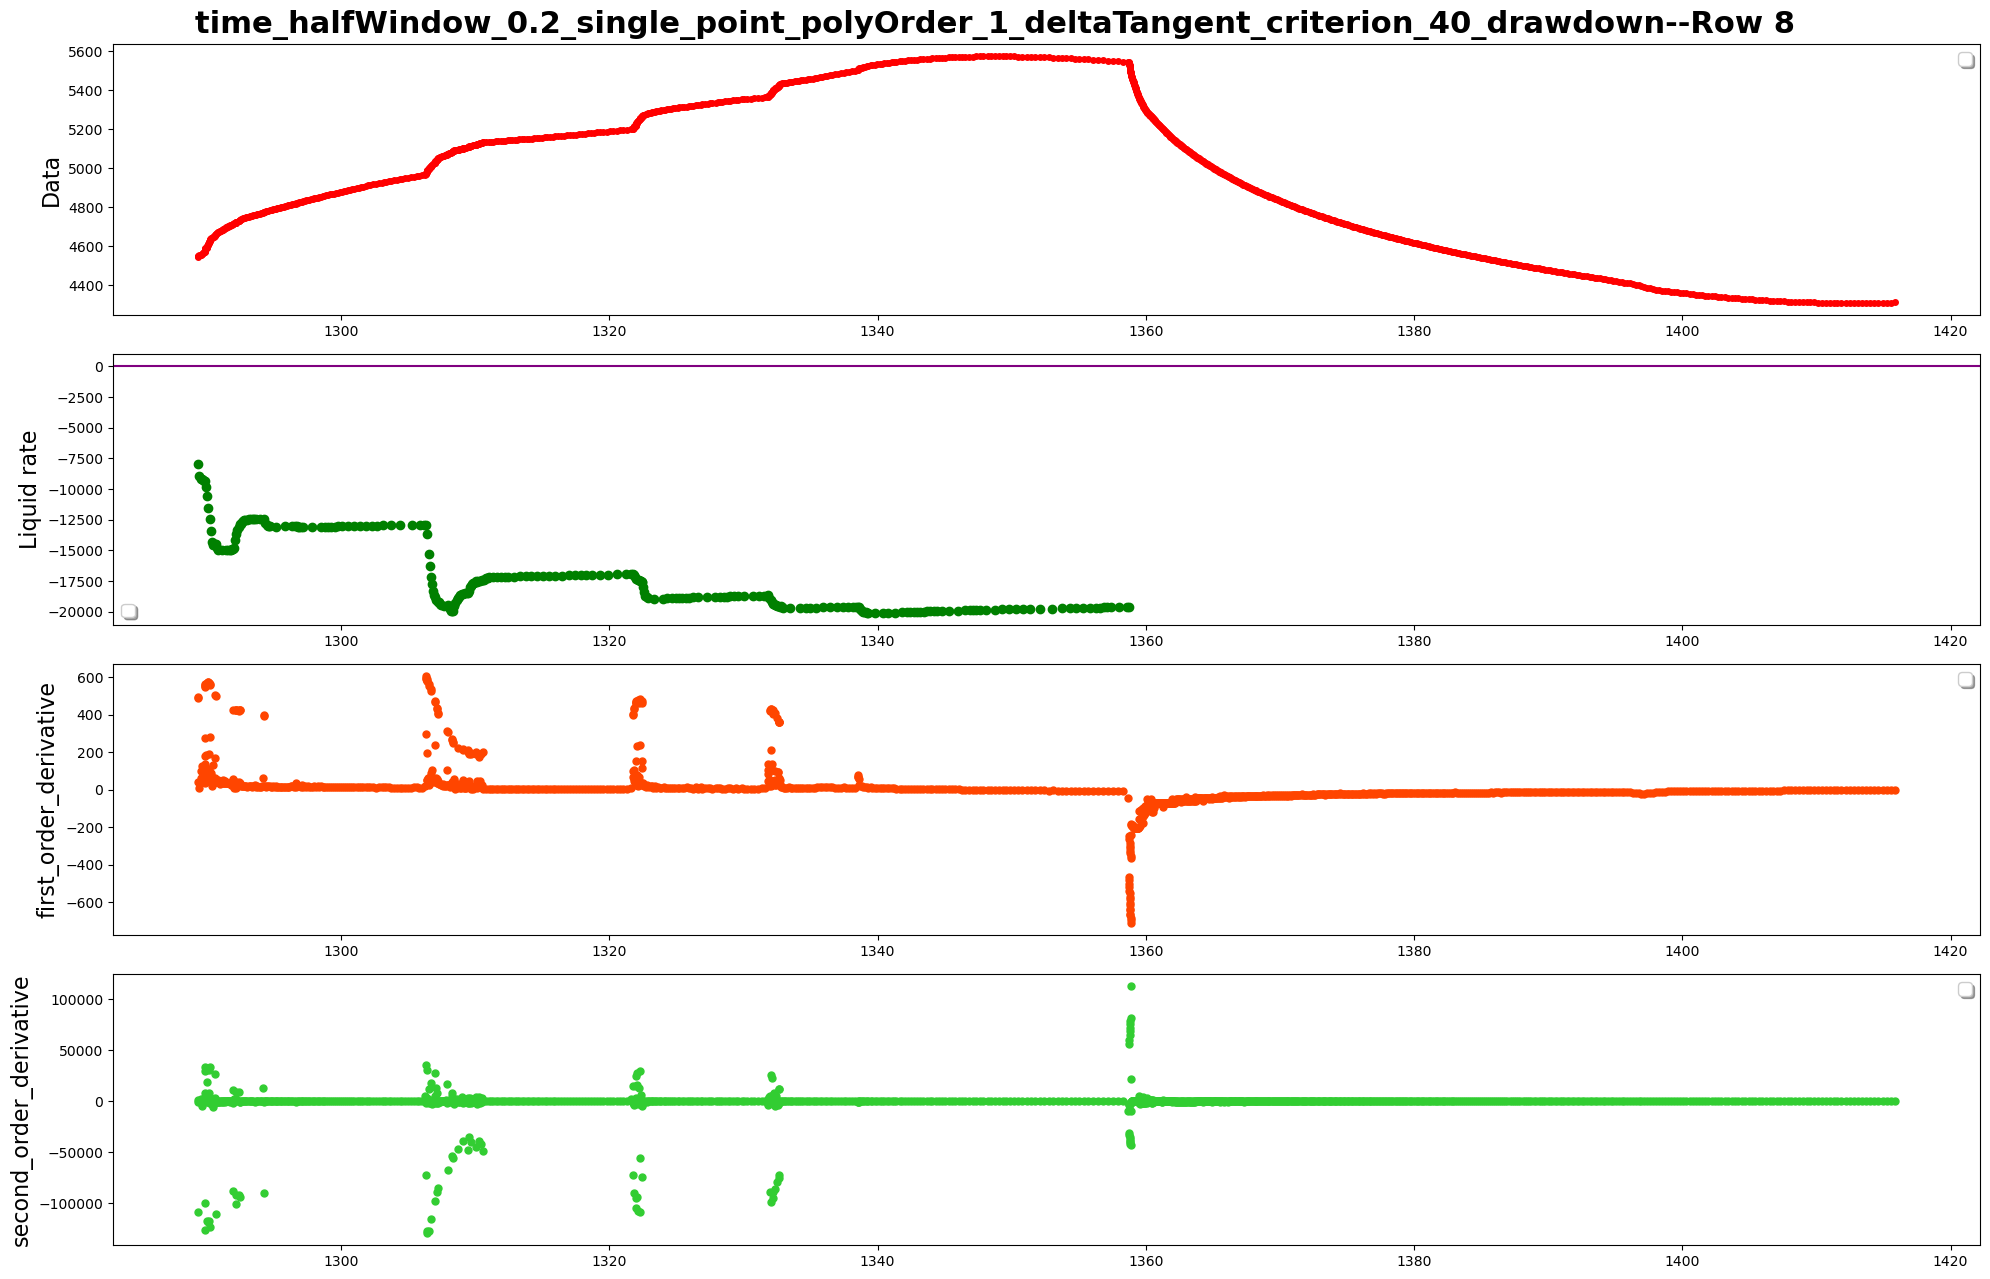

------row 9-----detected points:[]


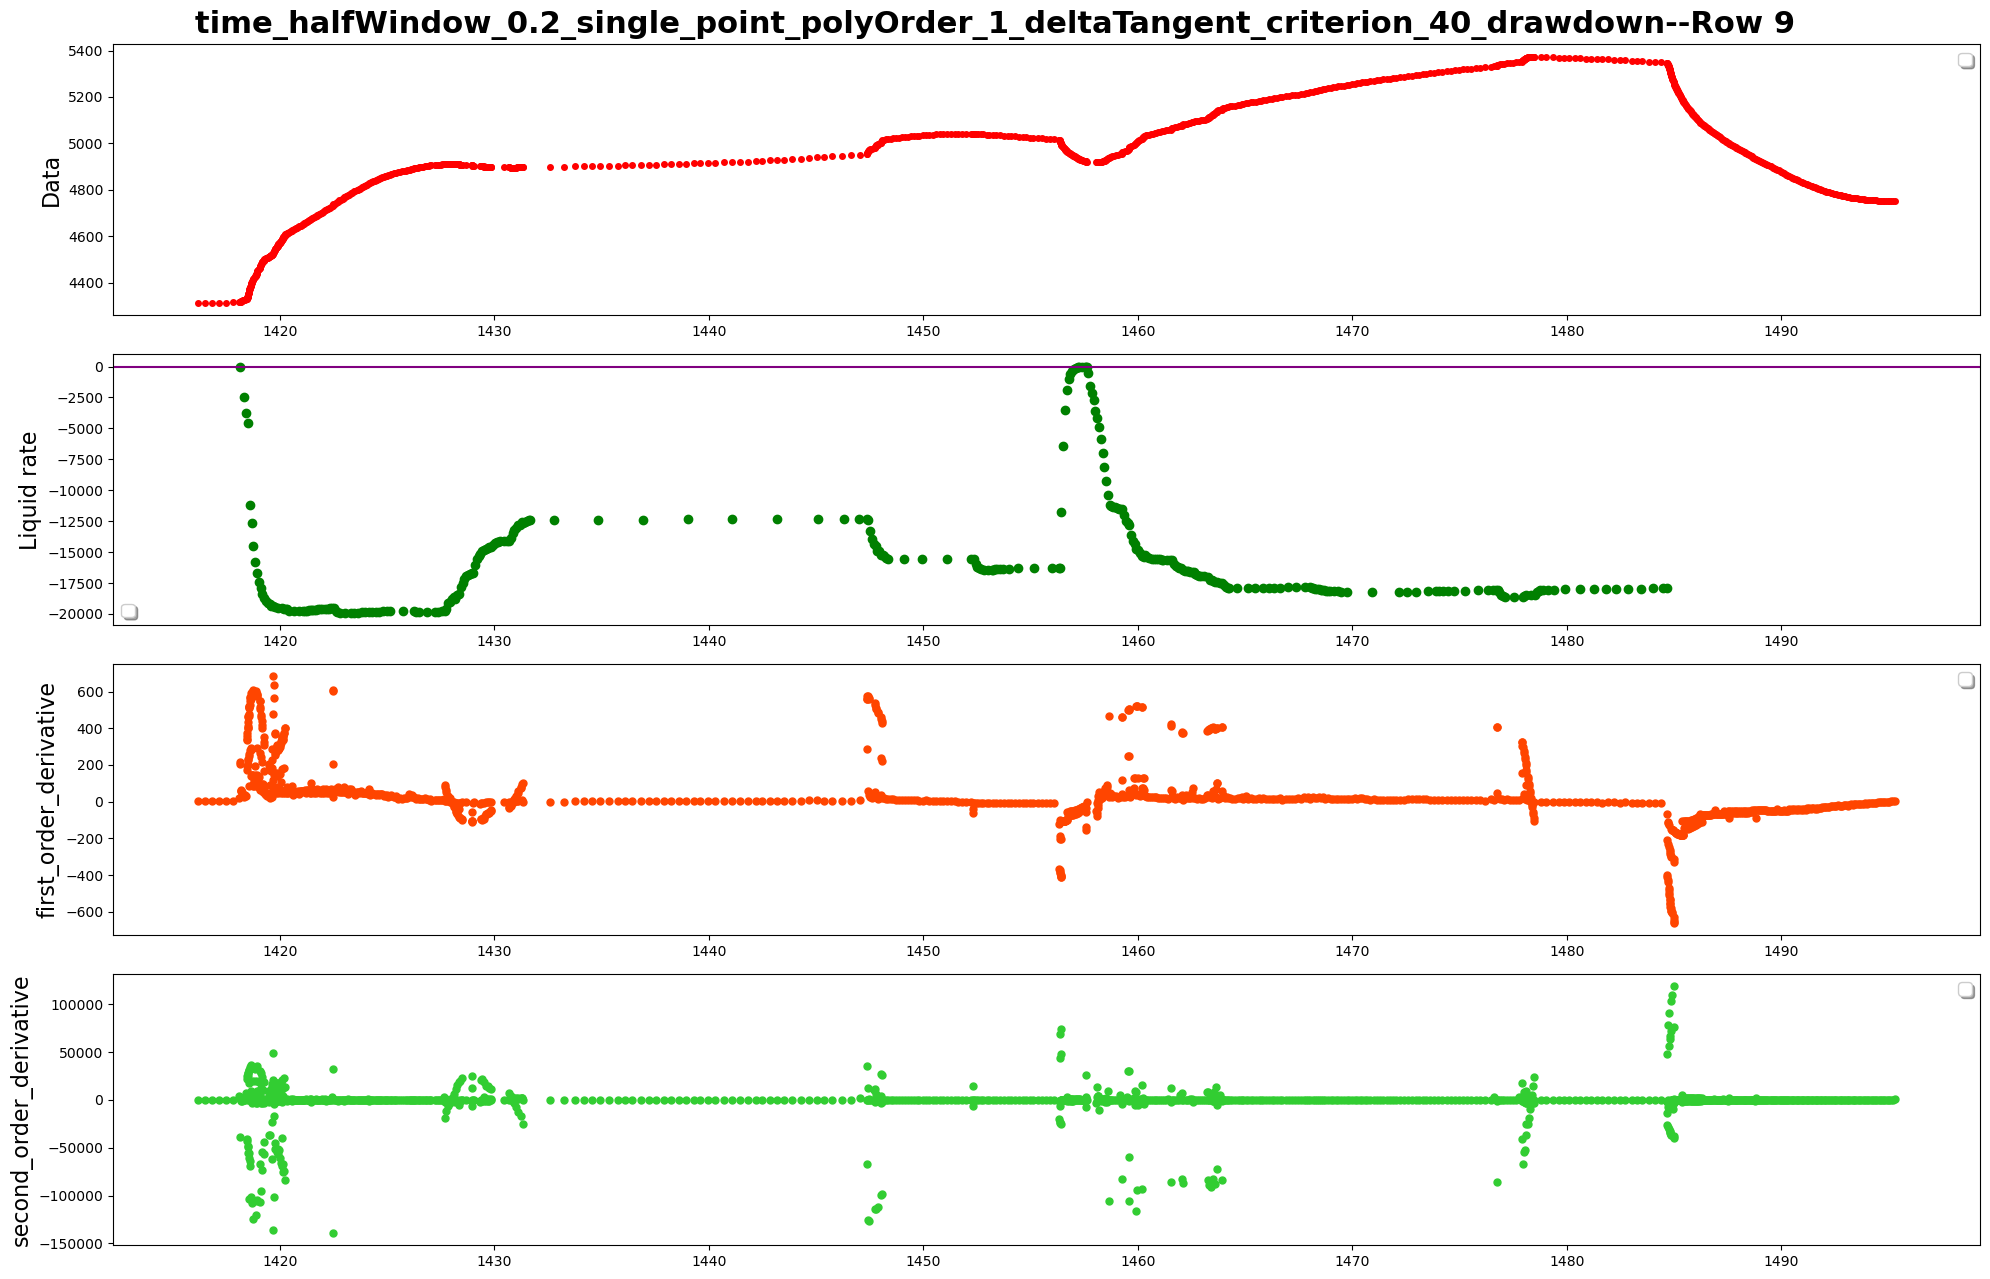

------row 10-----detected points:[]


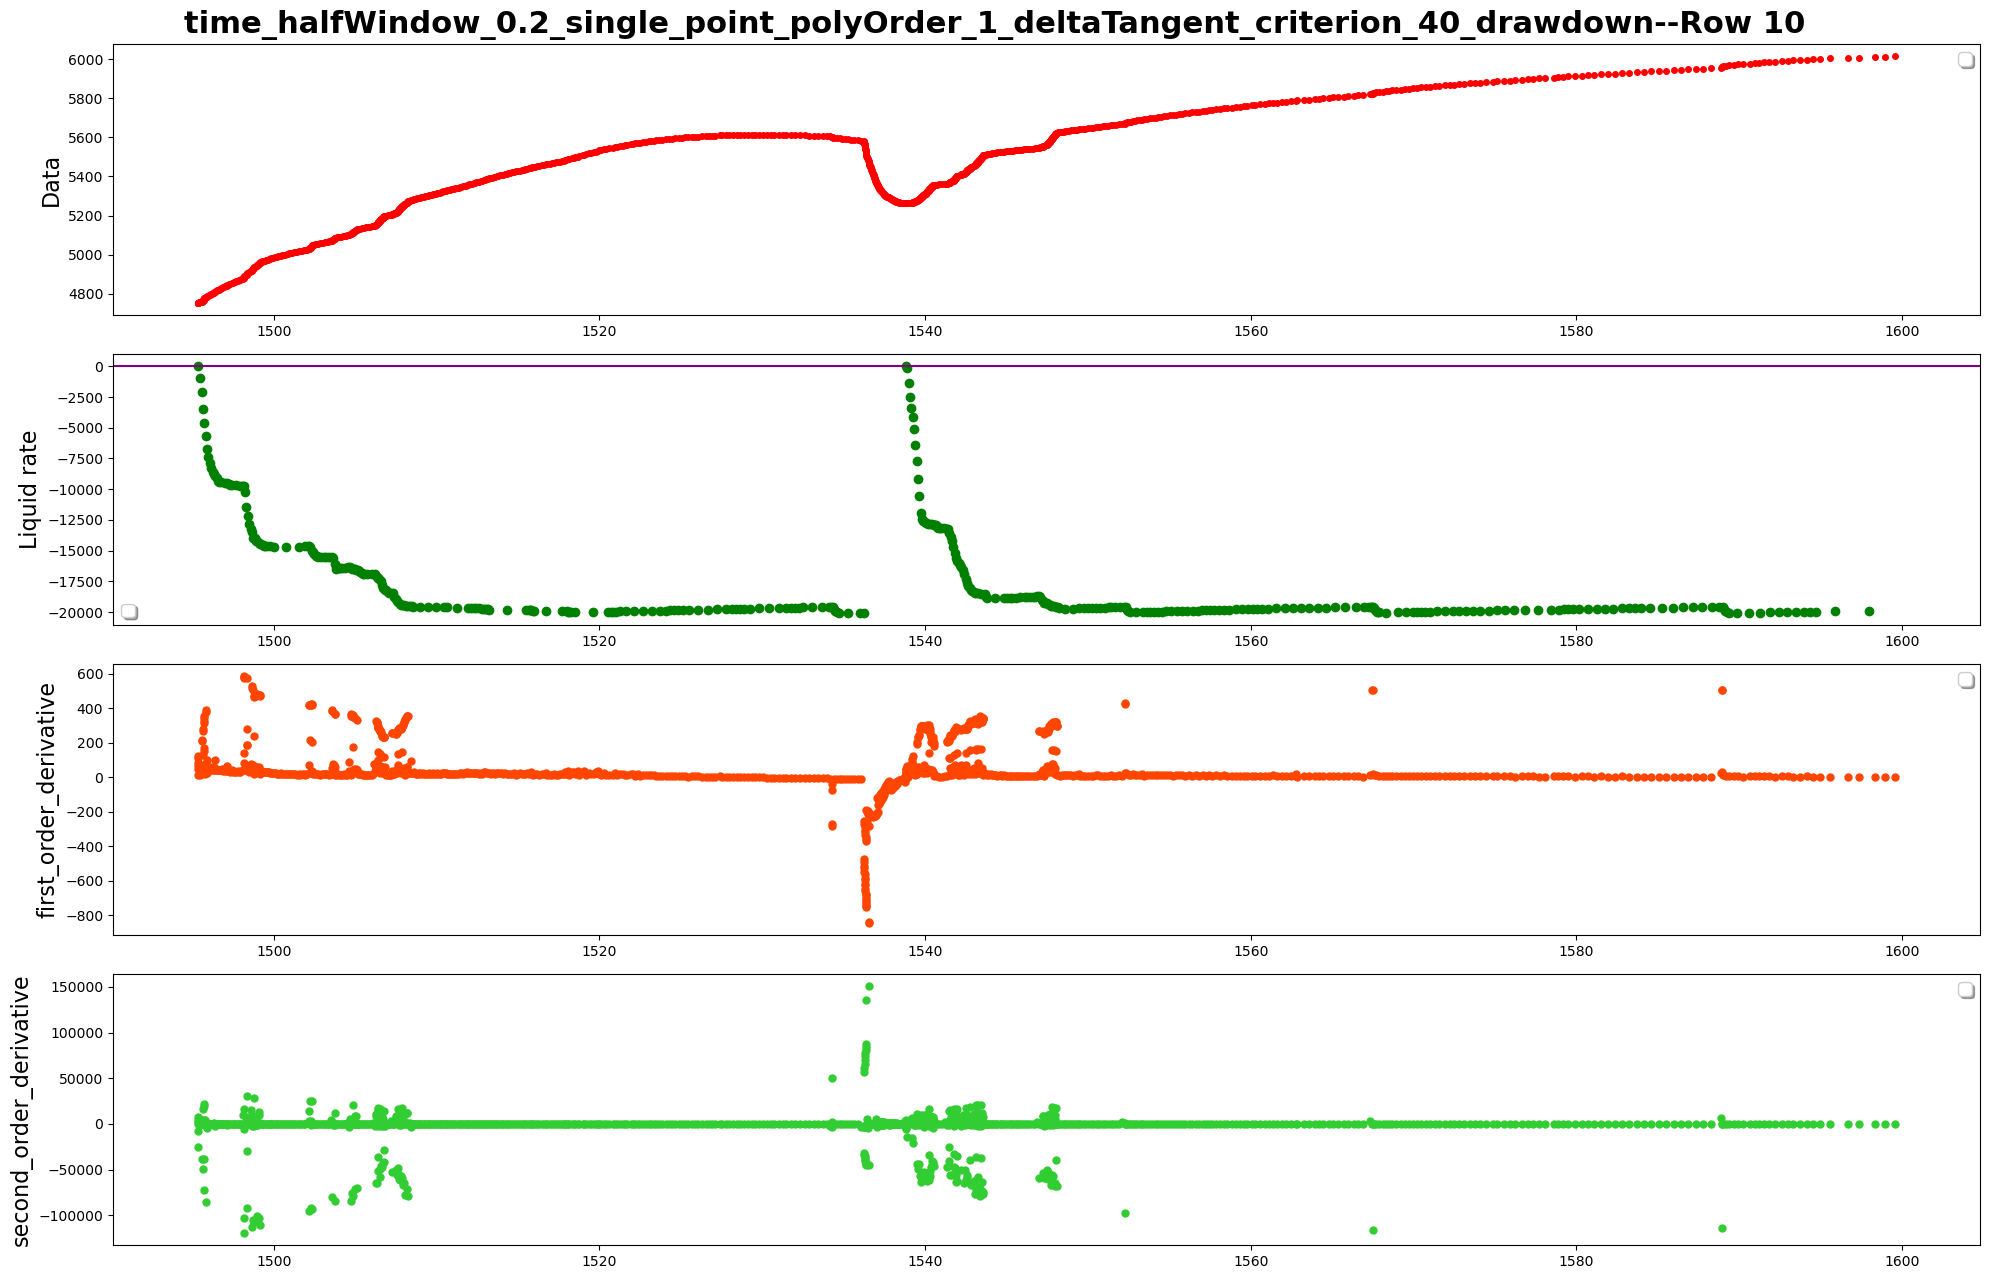

------row 11-----detected points:[12466]


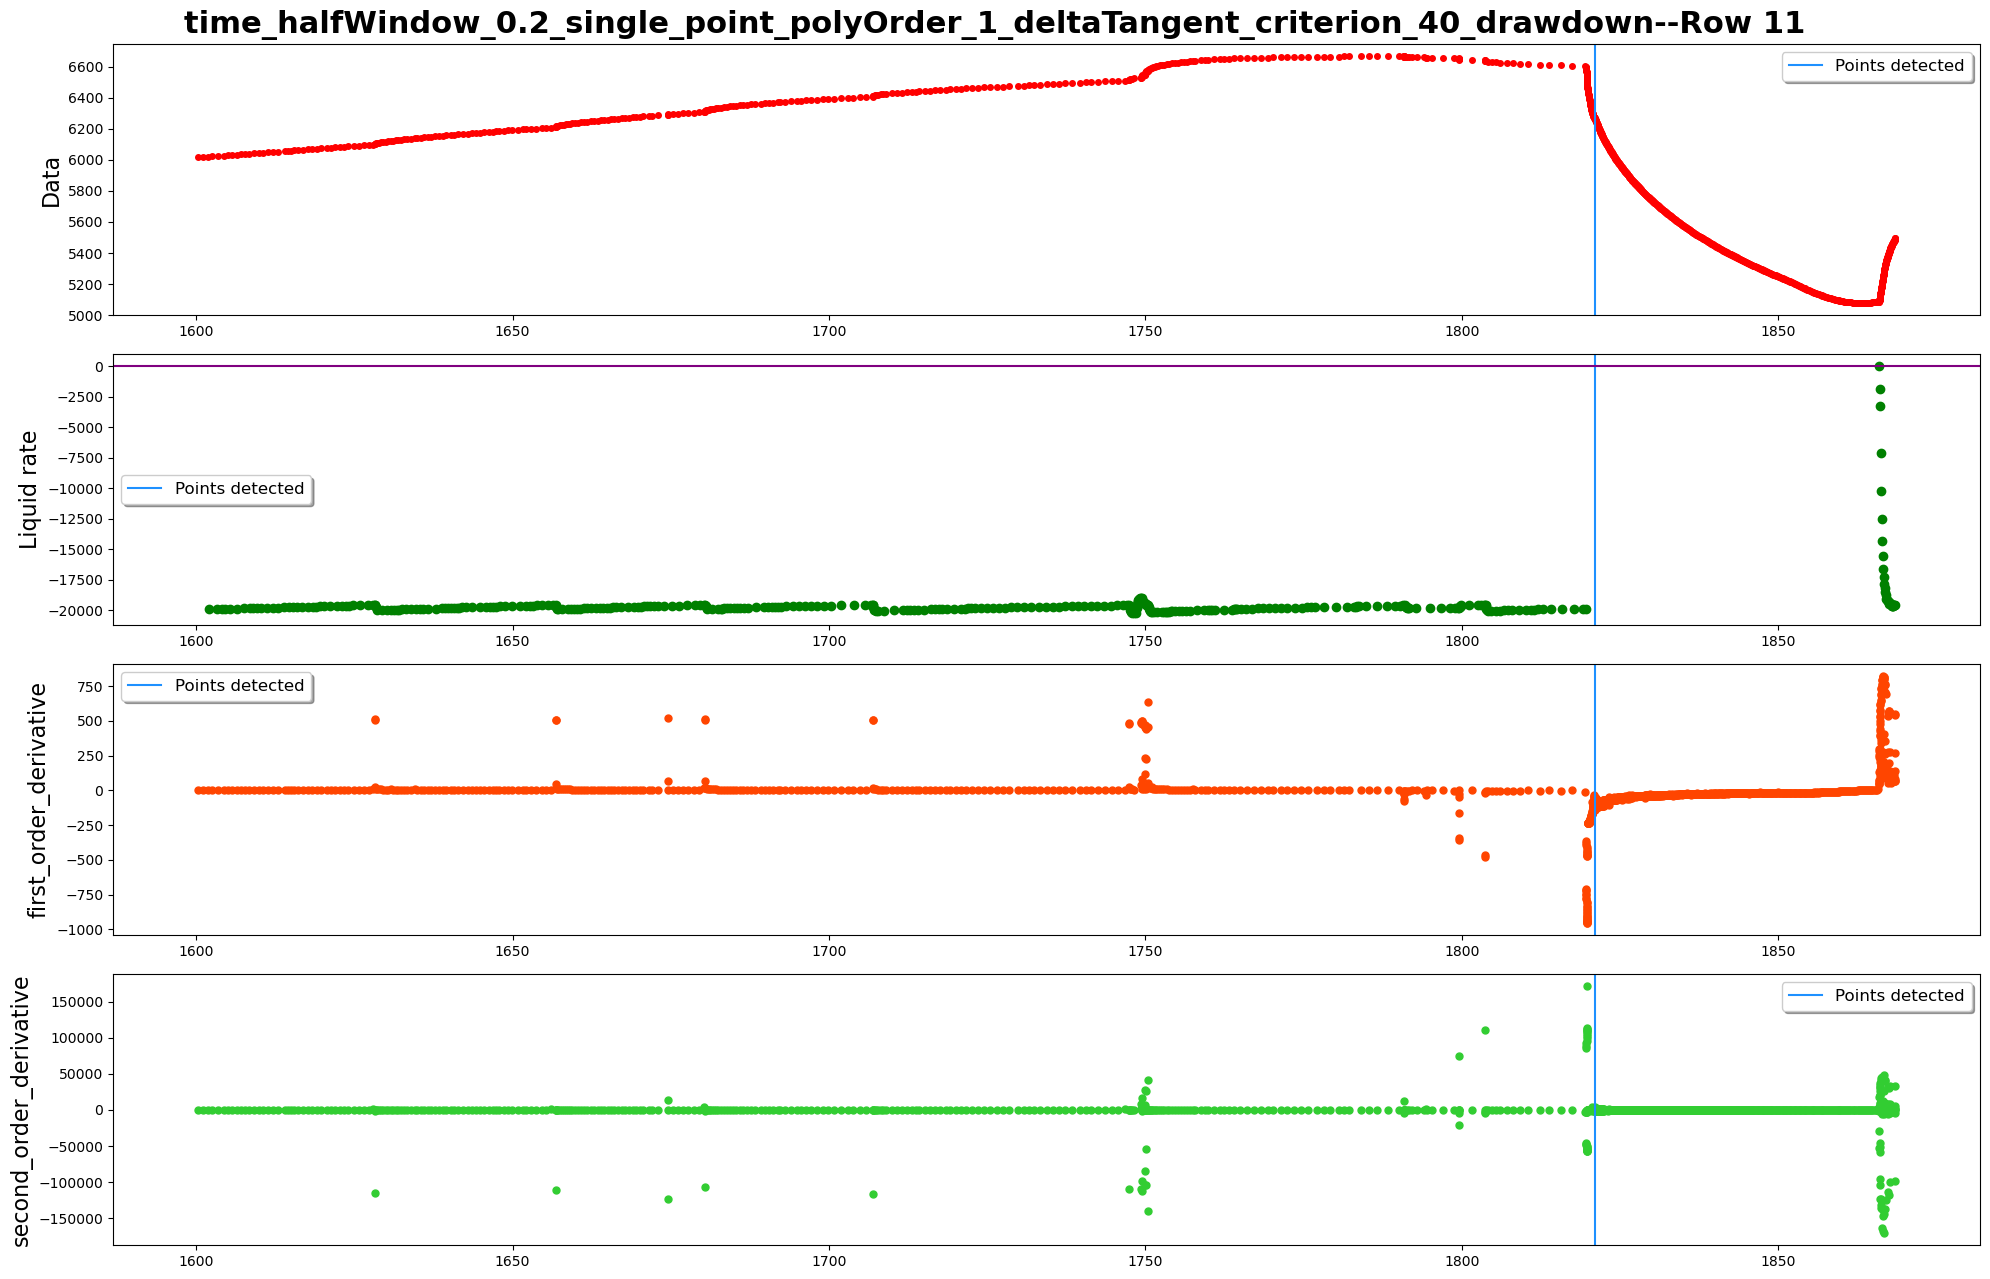

------row 12-----detected points:[]


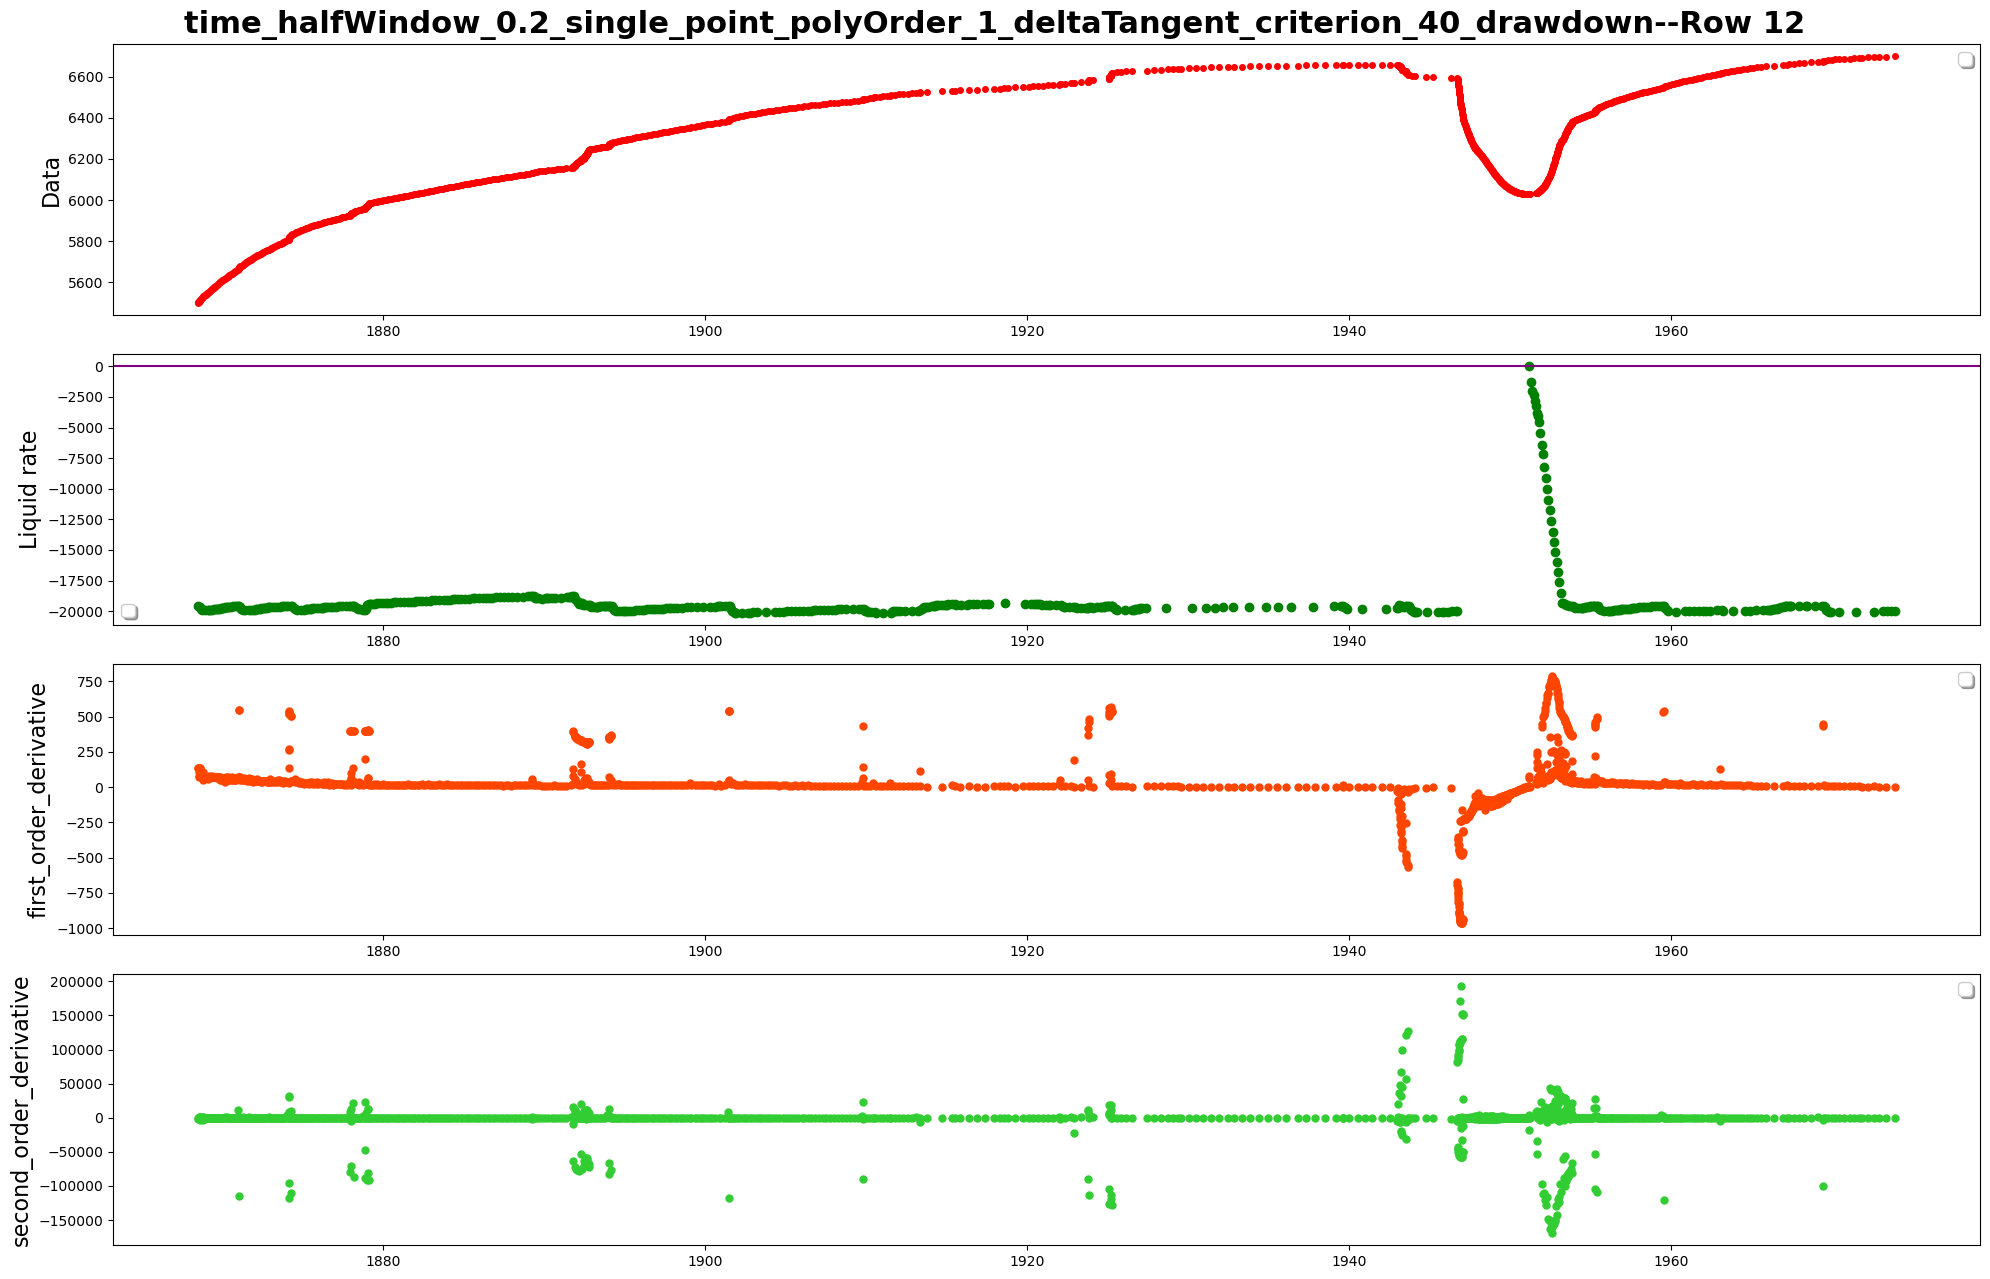

------row 13-----detected points:[]


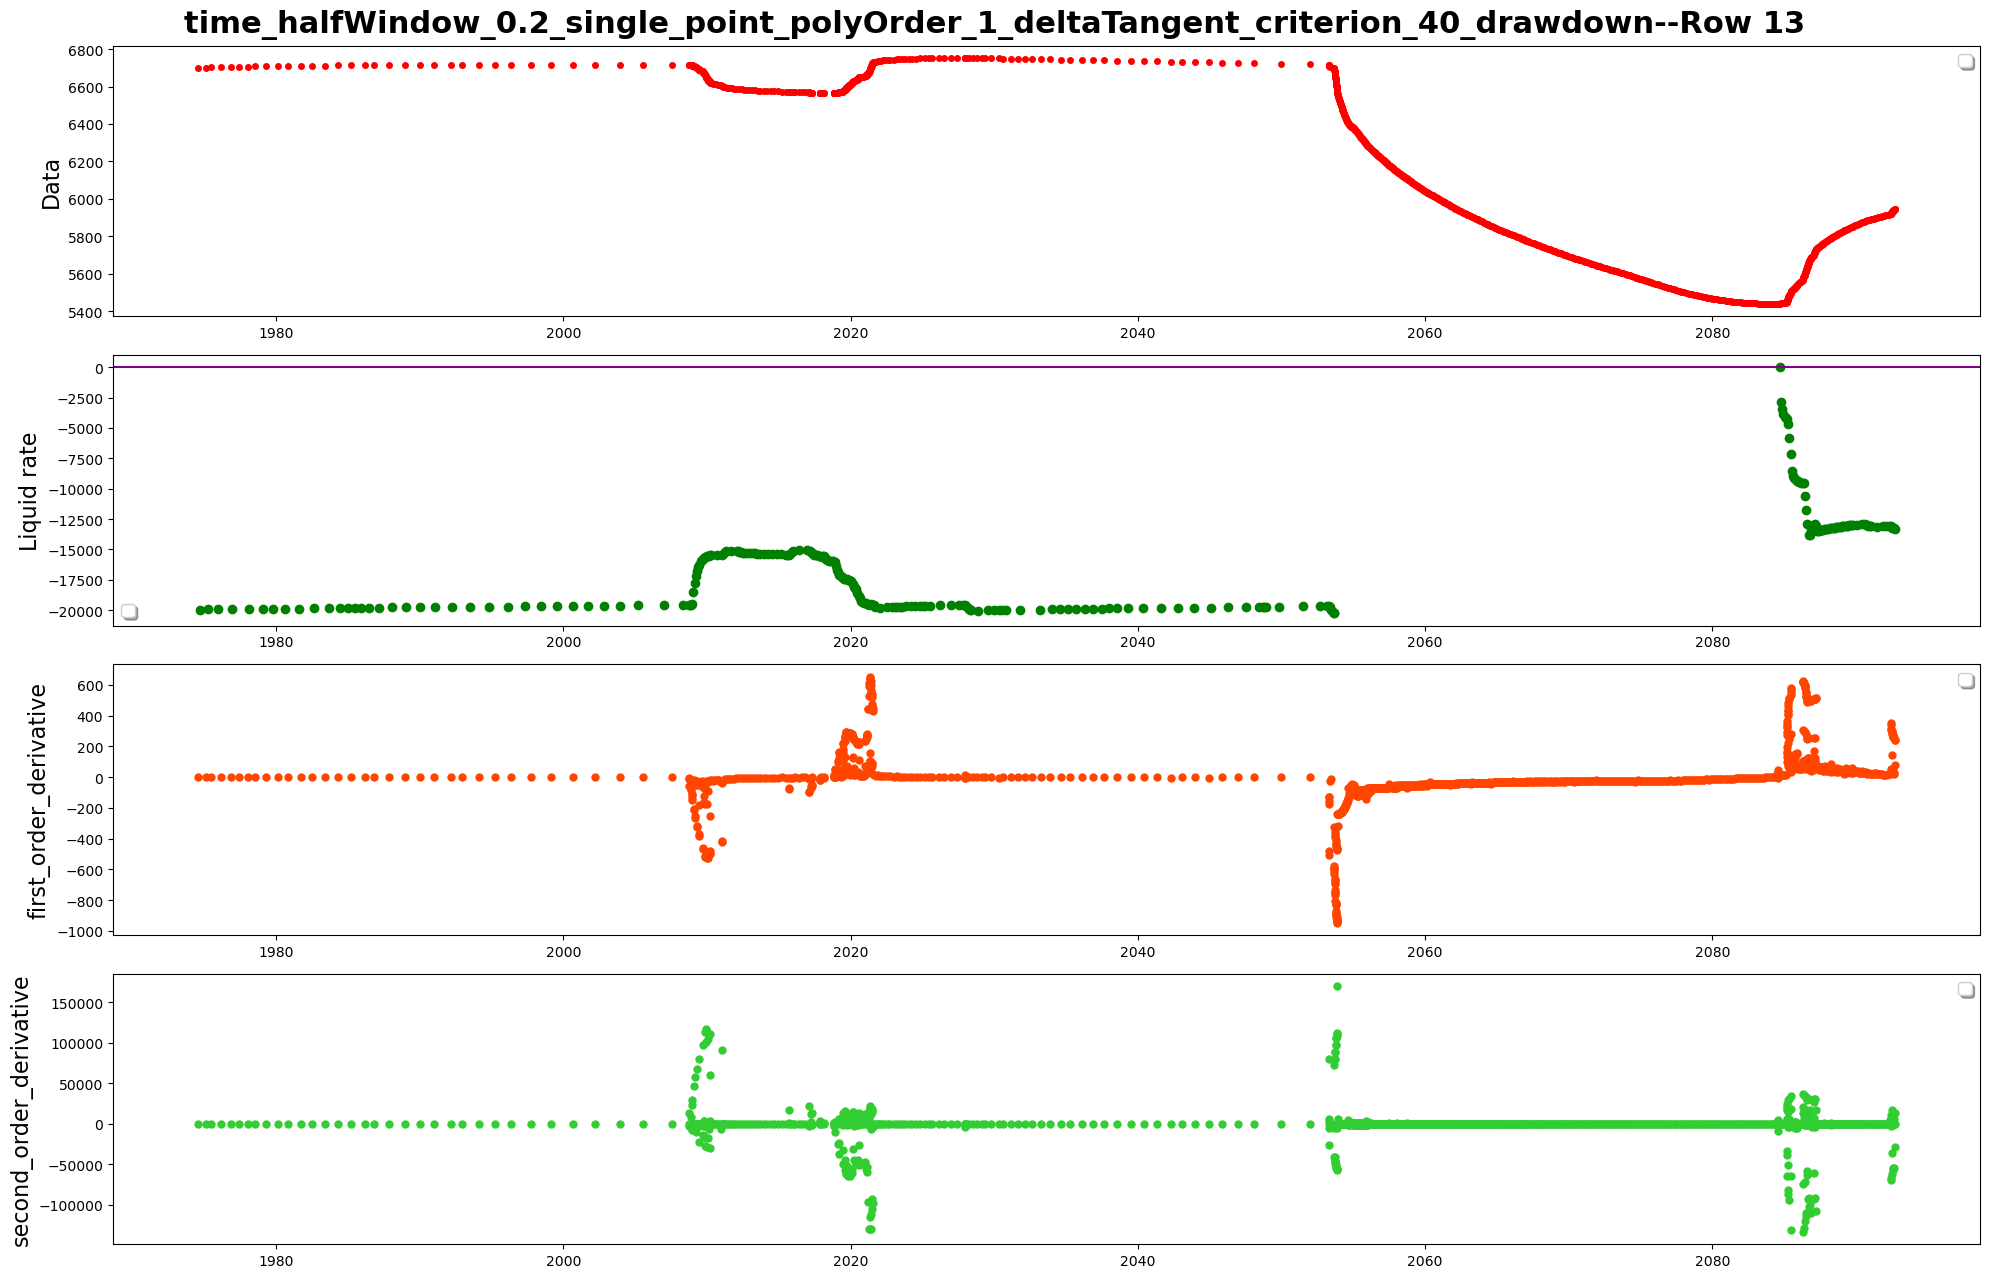

------row 14-----detected points:[16095]


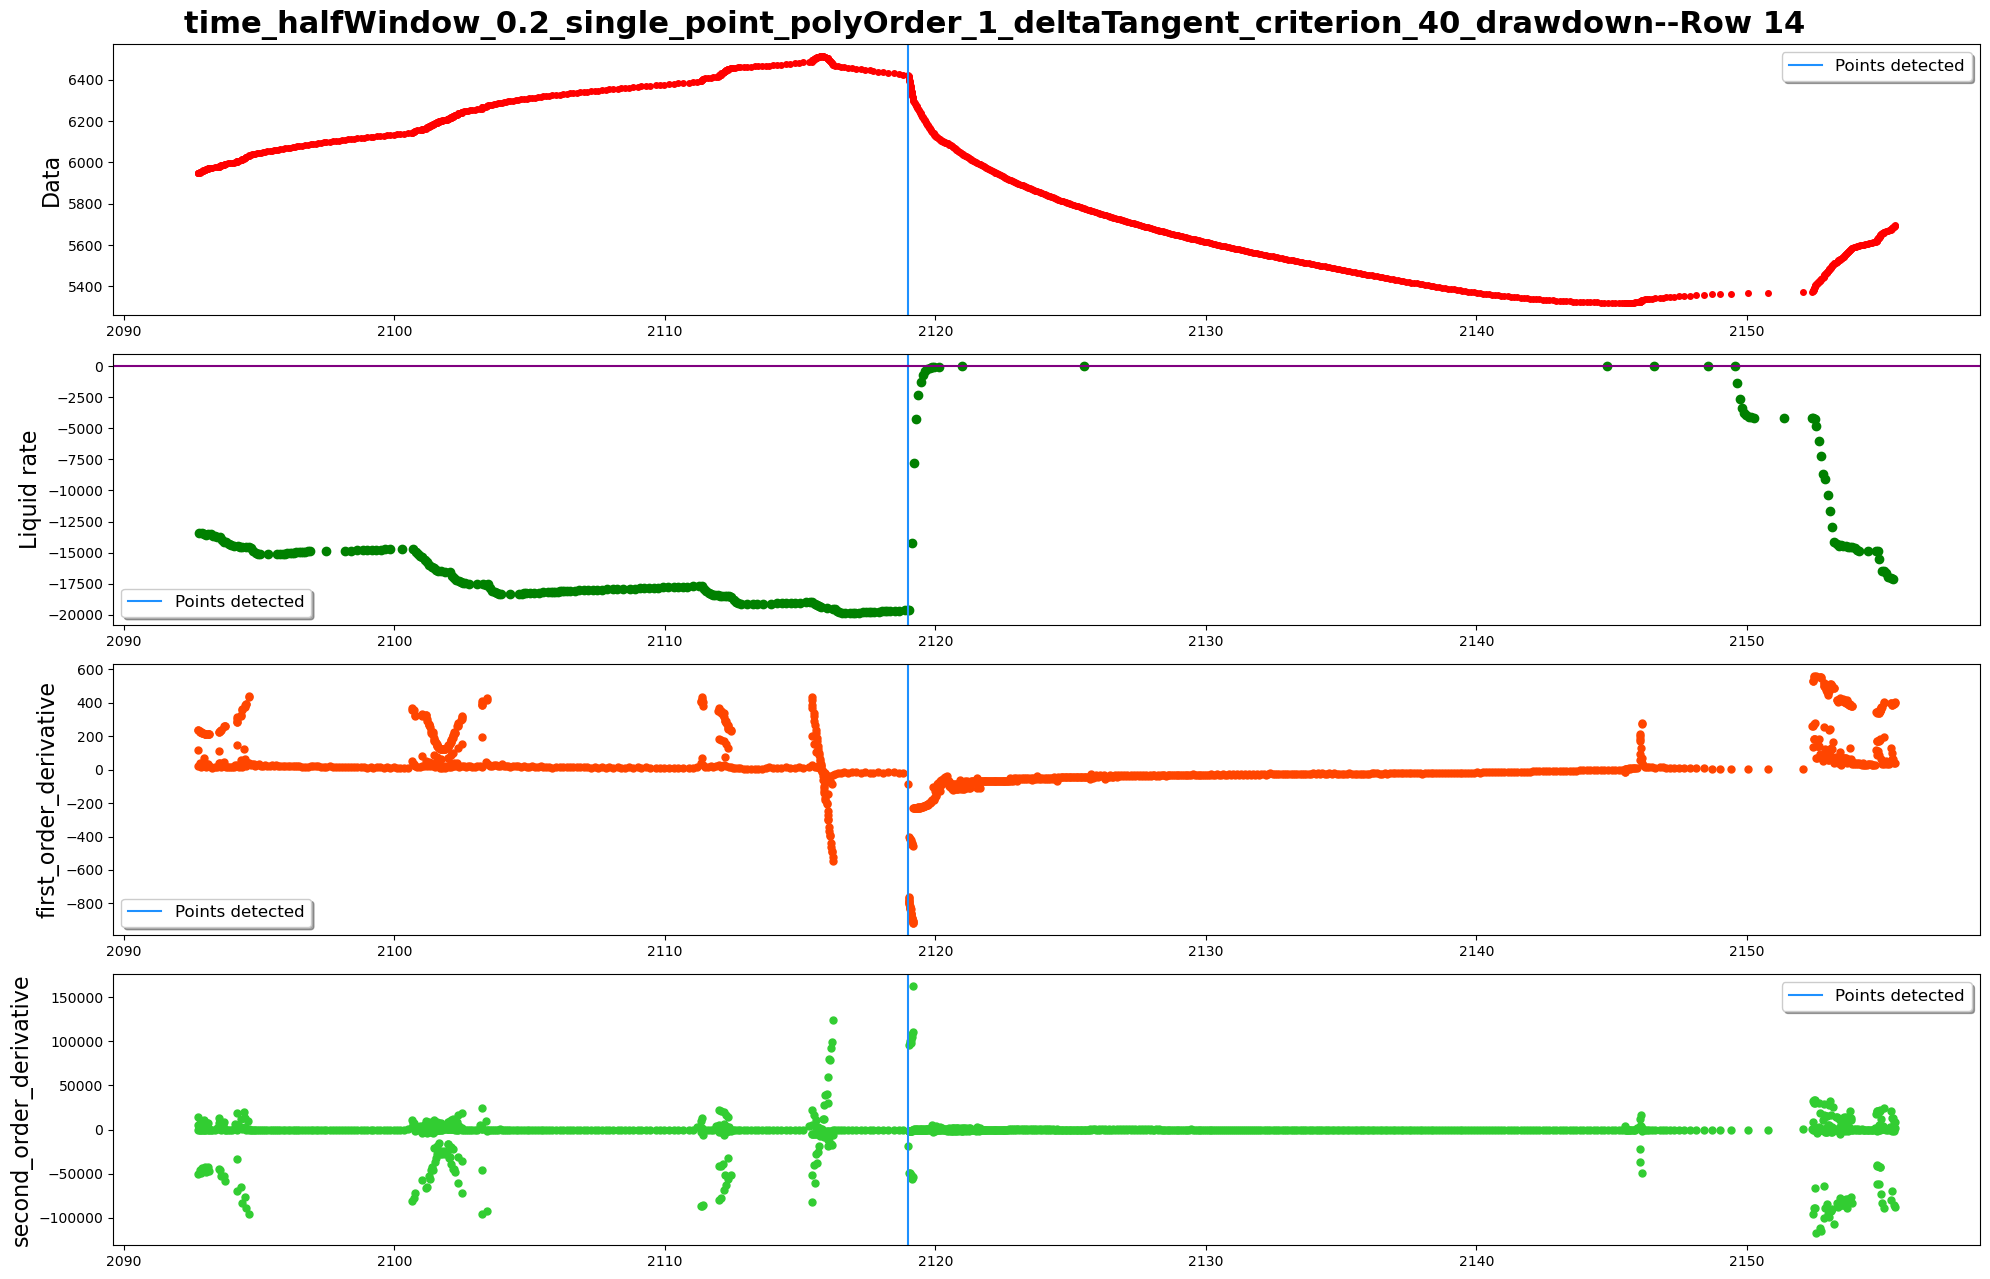

------row 15-----detected points:[]


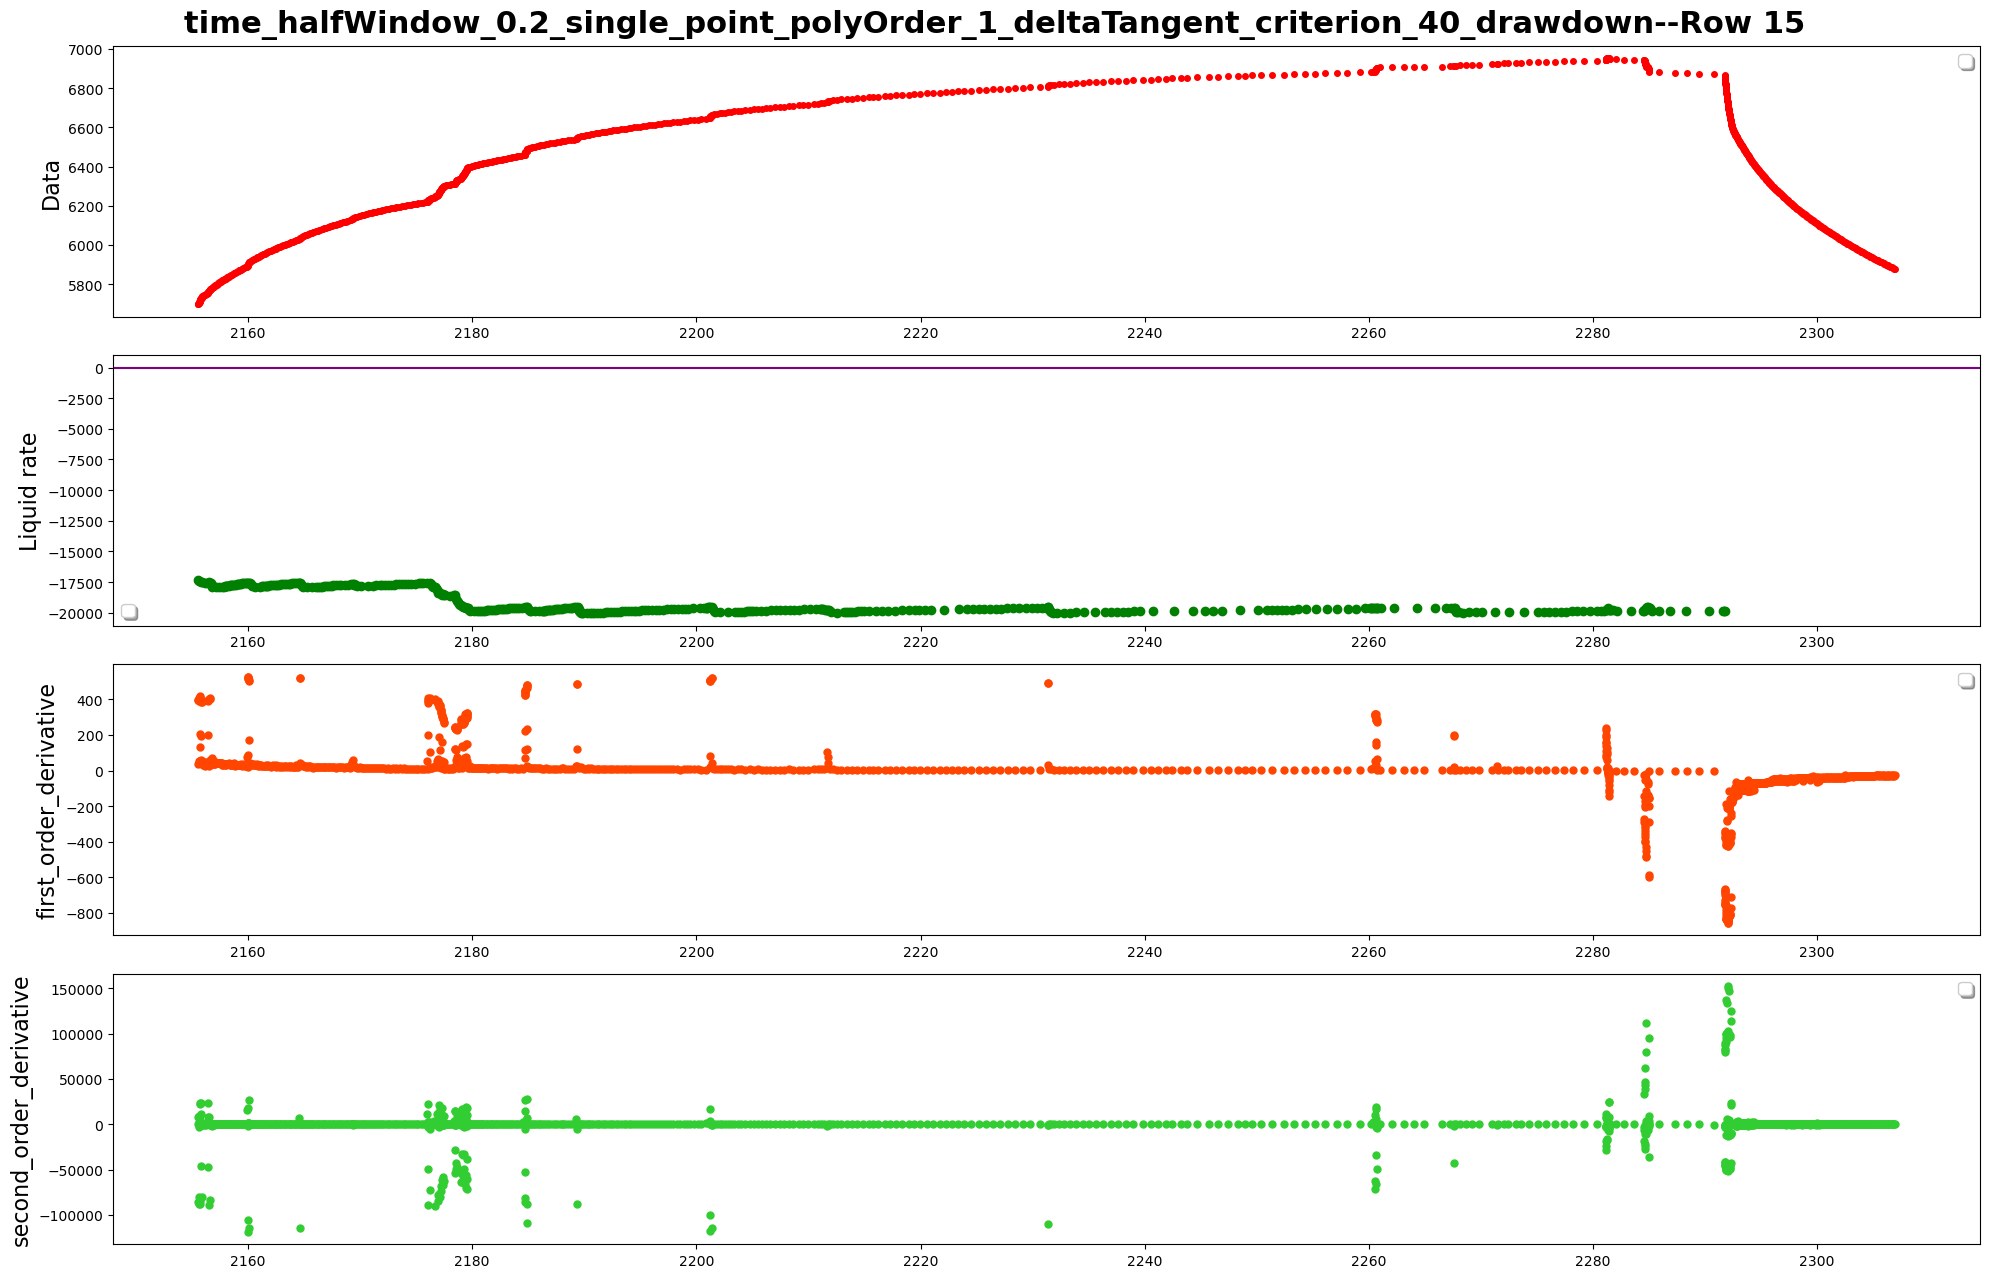

------row 16-----detected points:[]


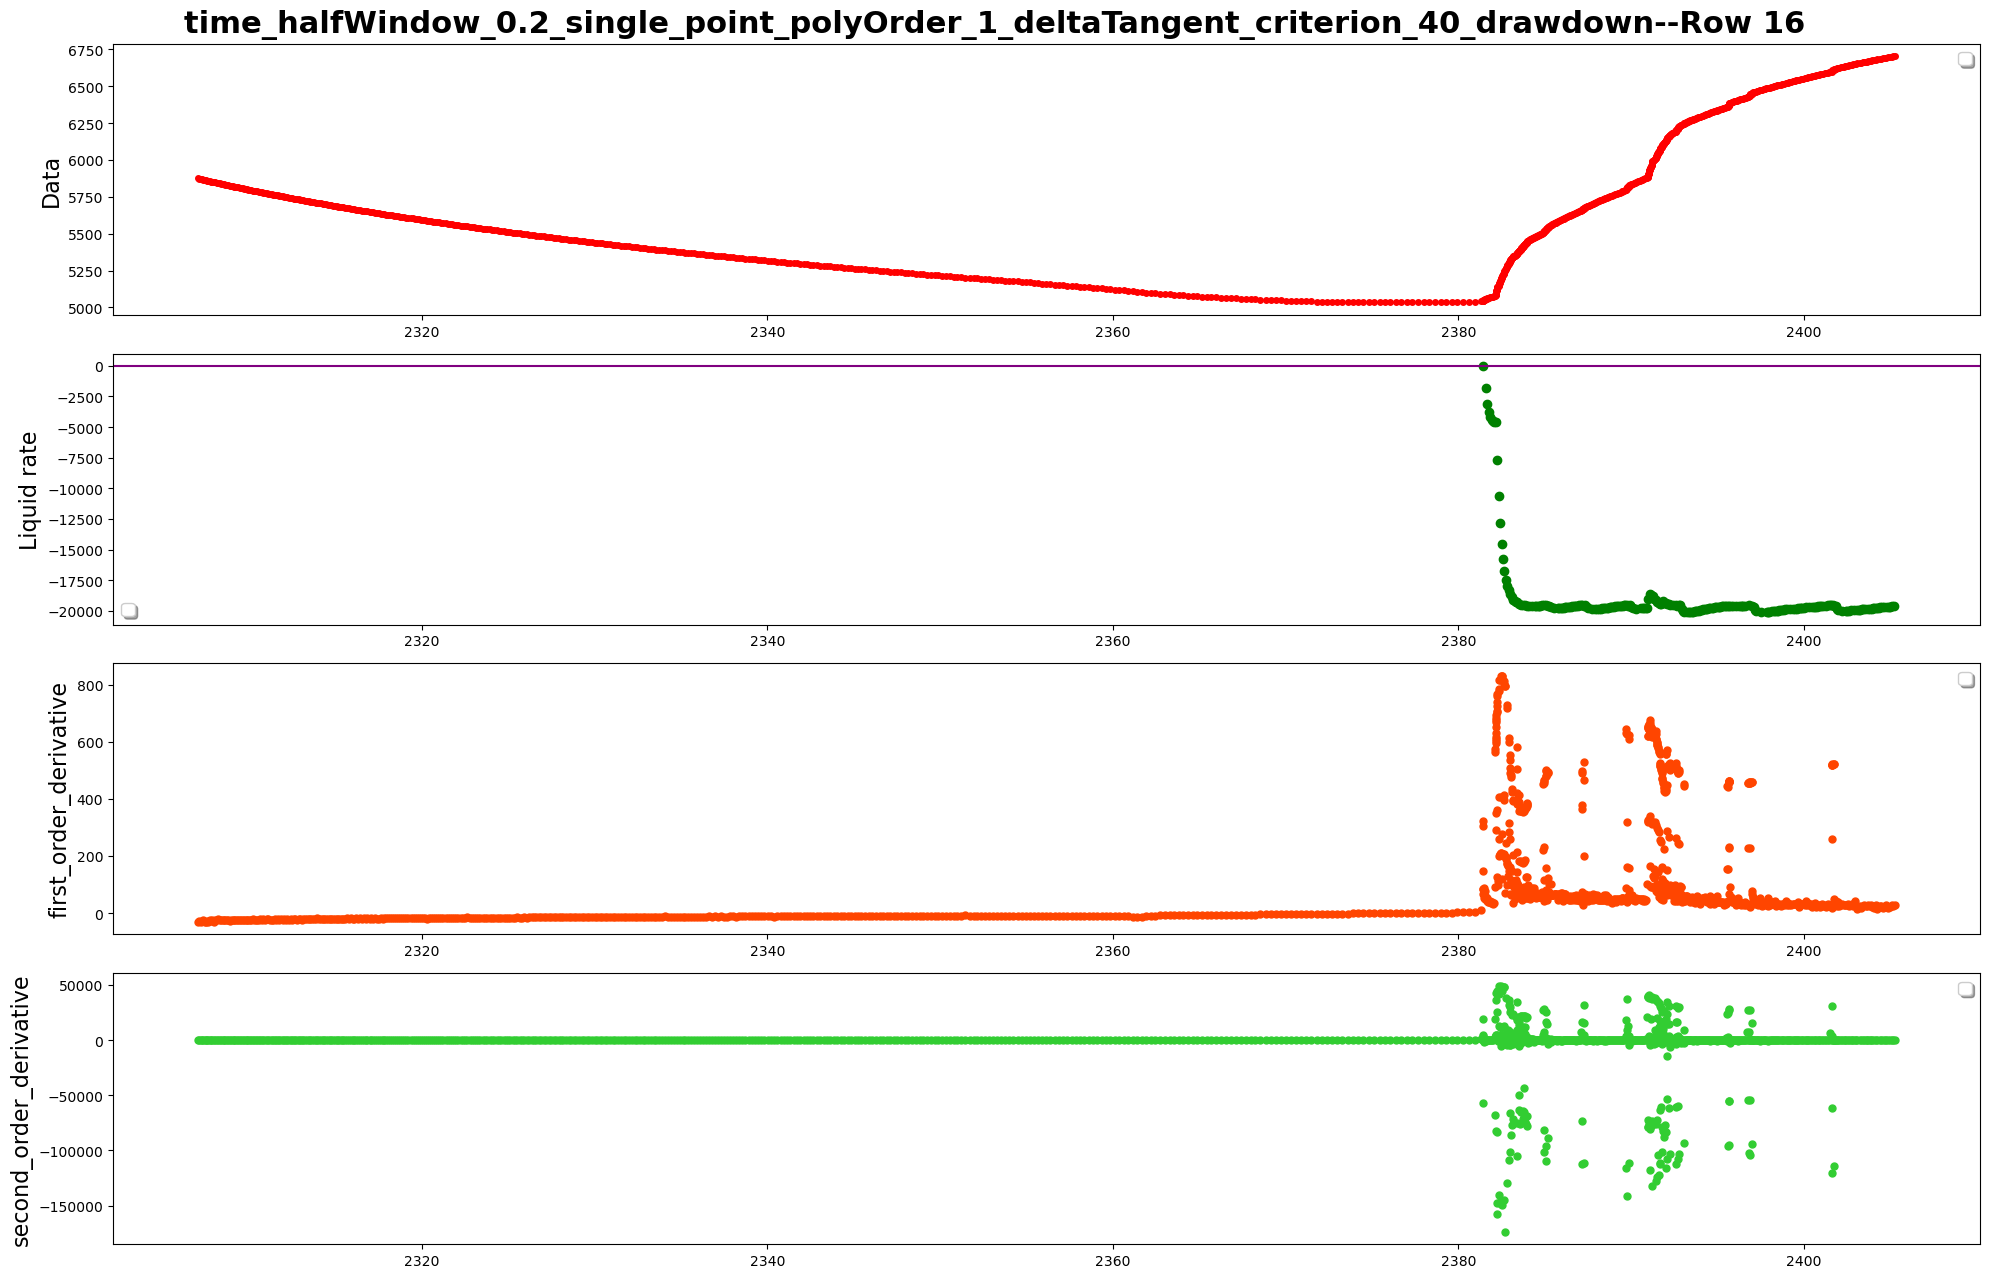

------row 17-----detected points:[]


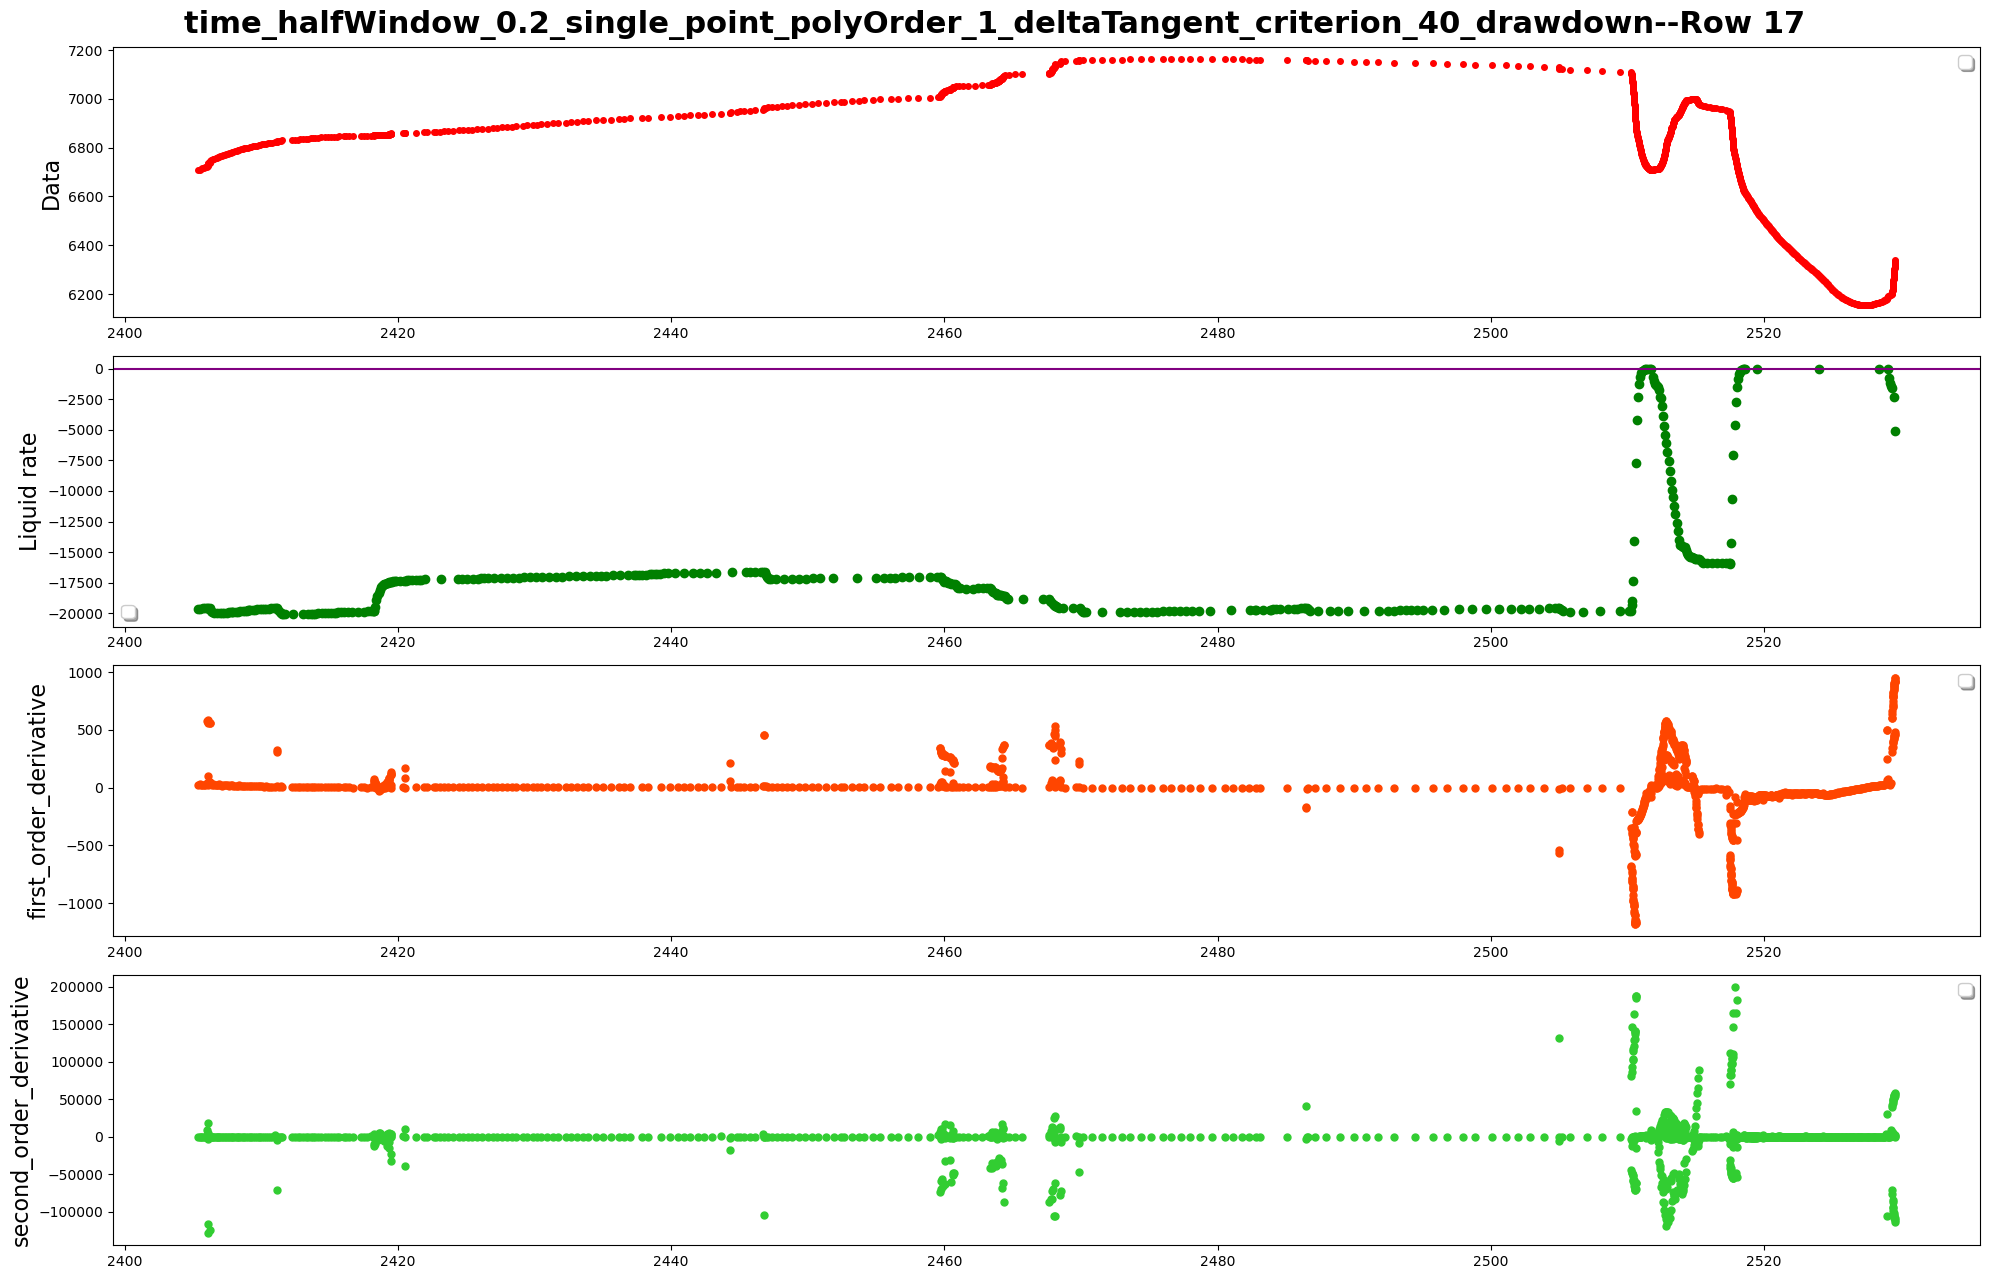

------row 18-----detected points:[]


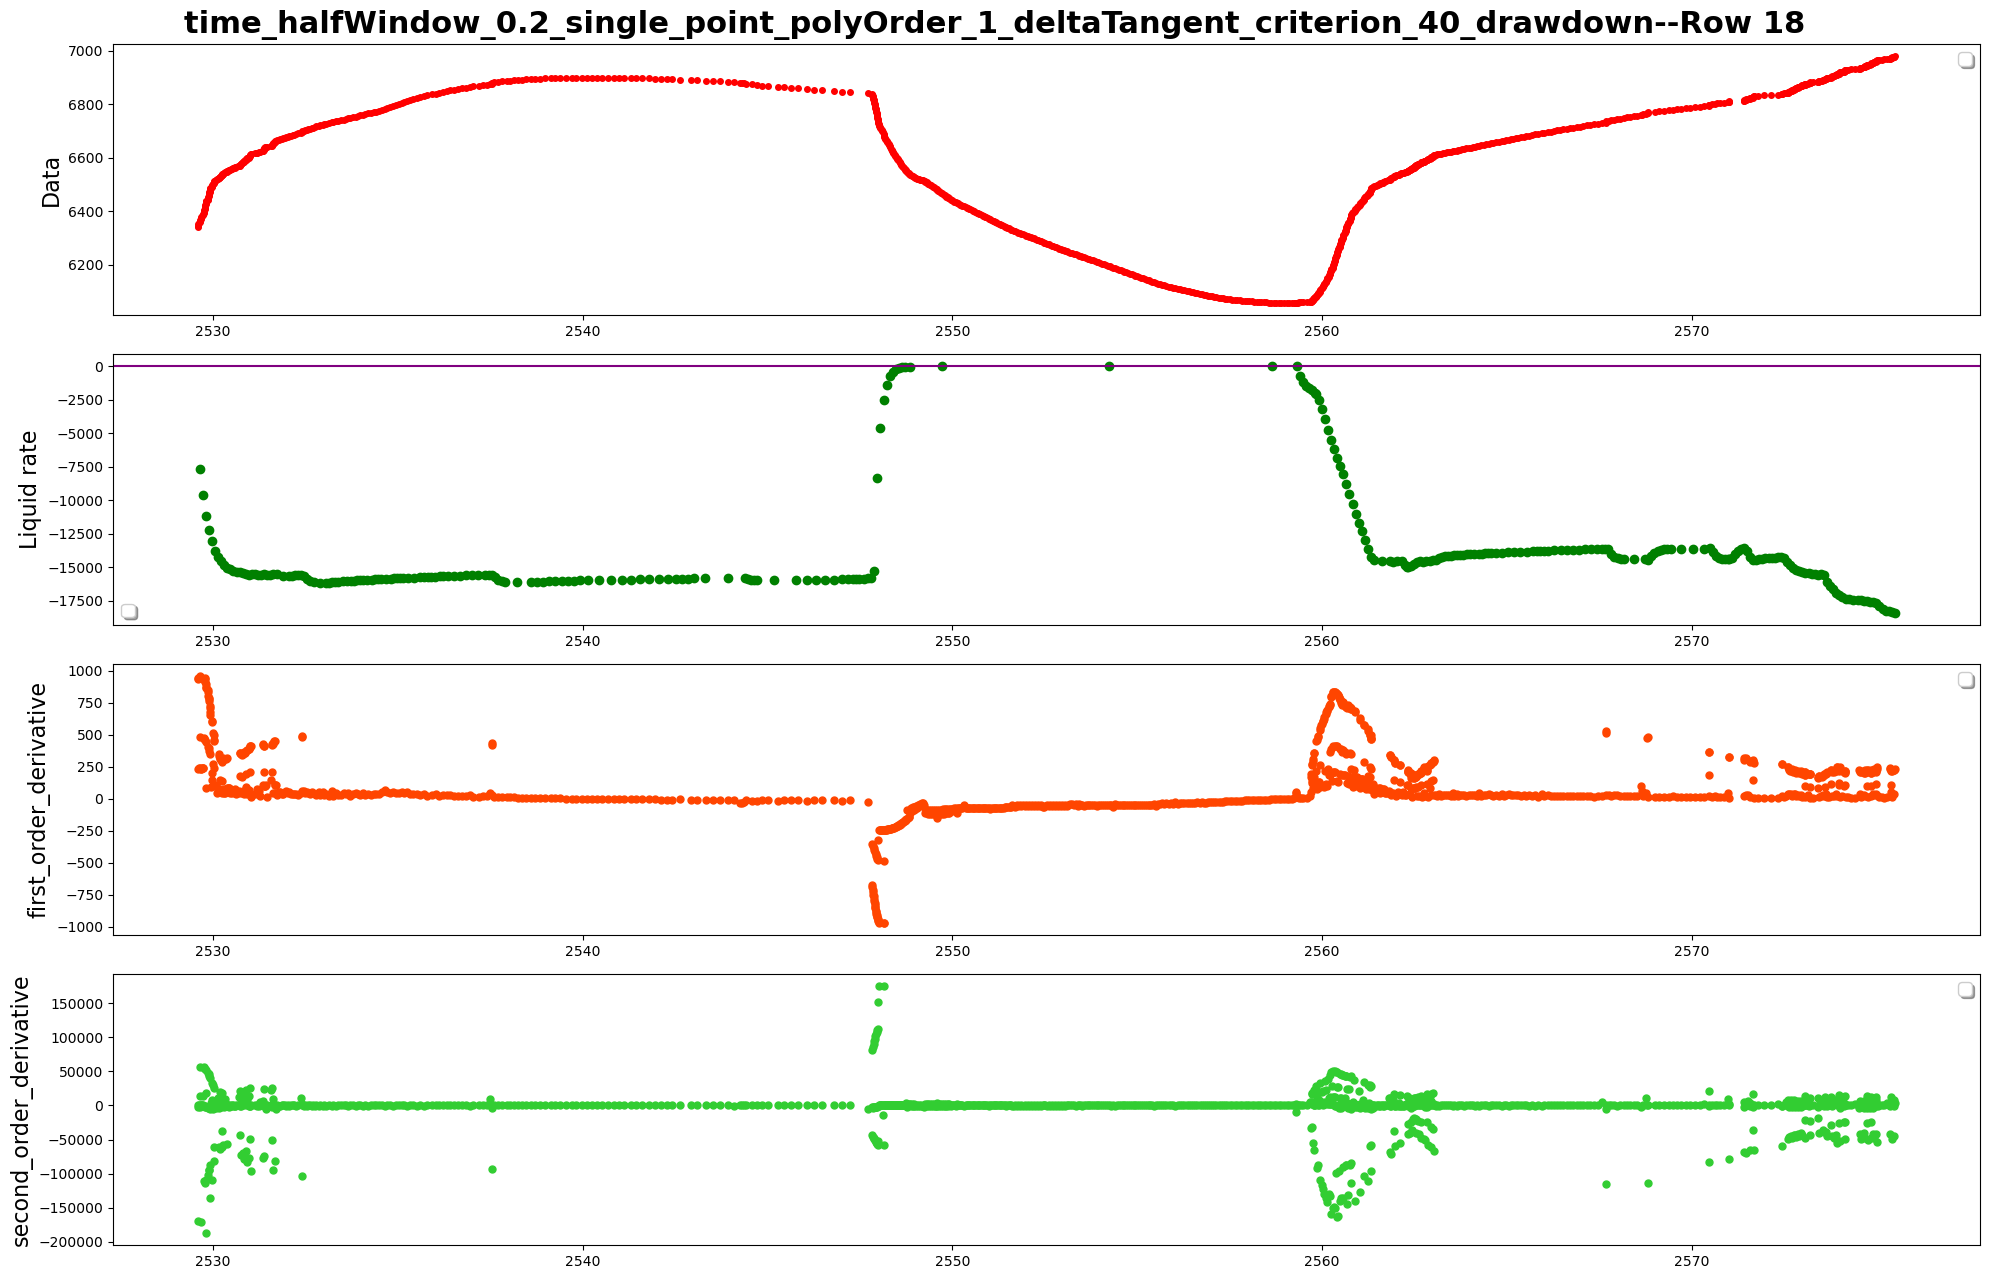

------row 19-----detected points:[]


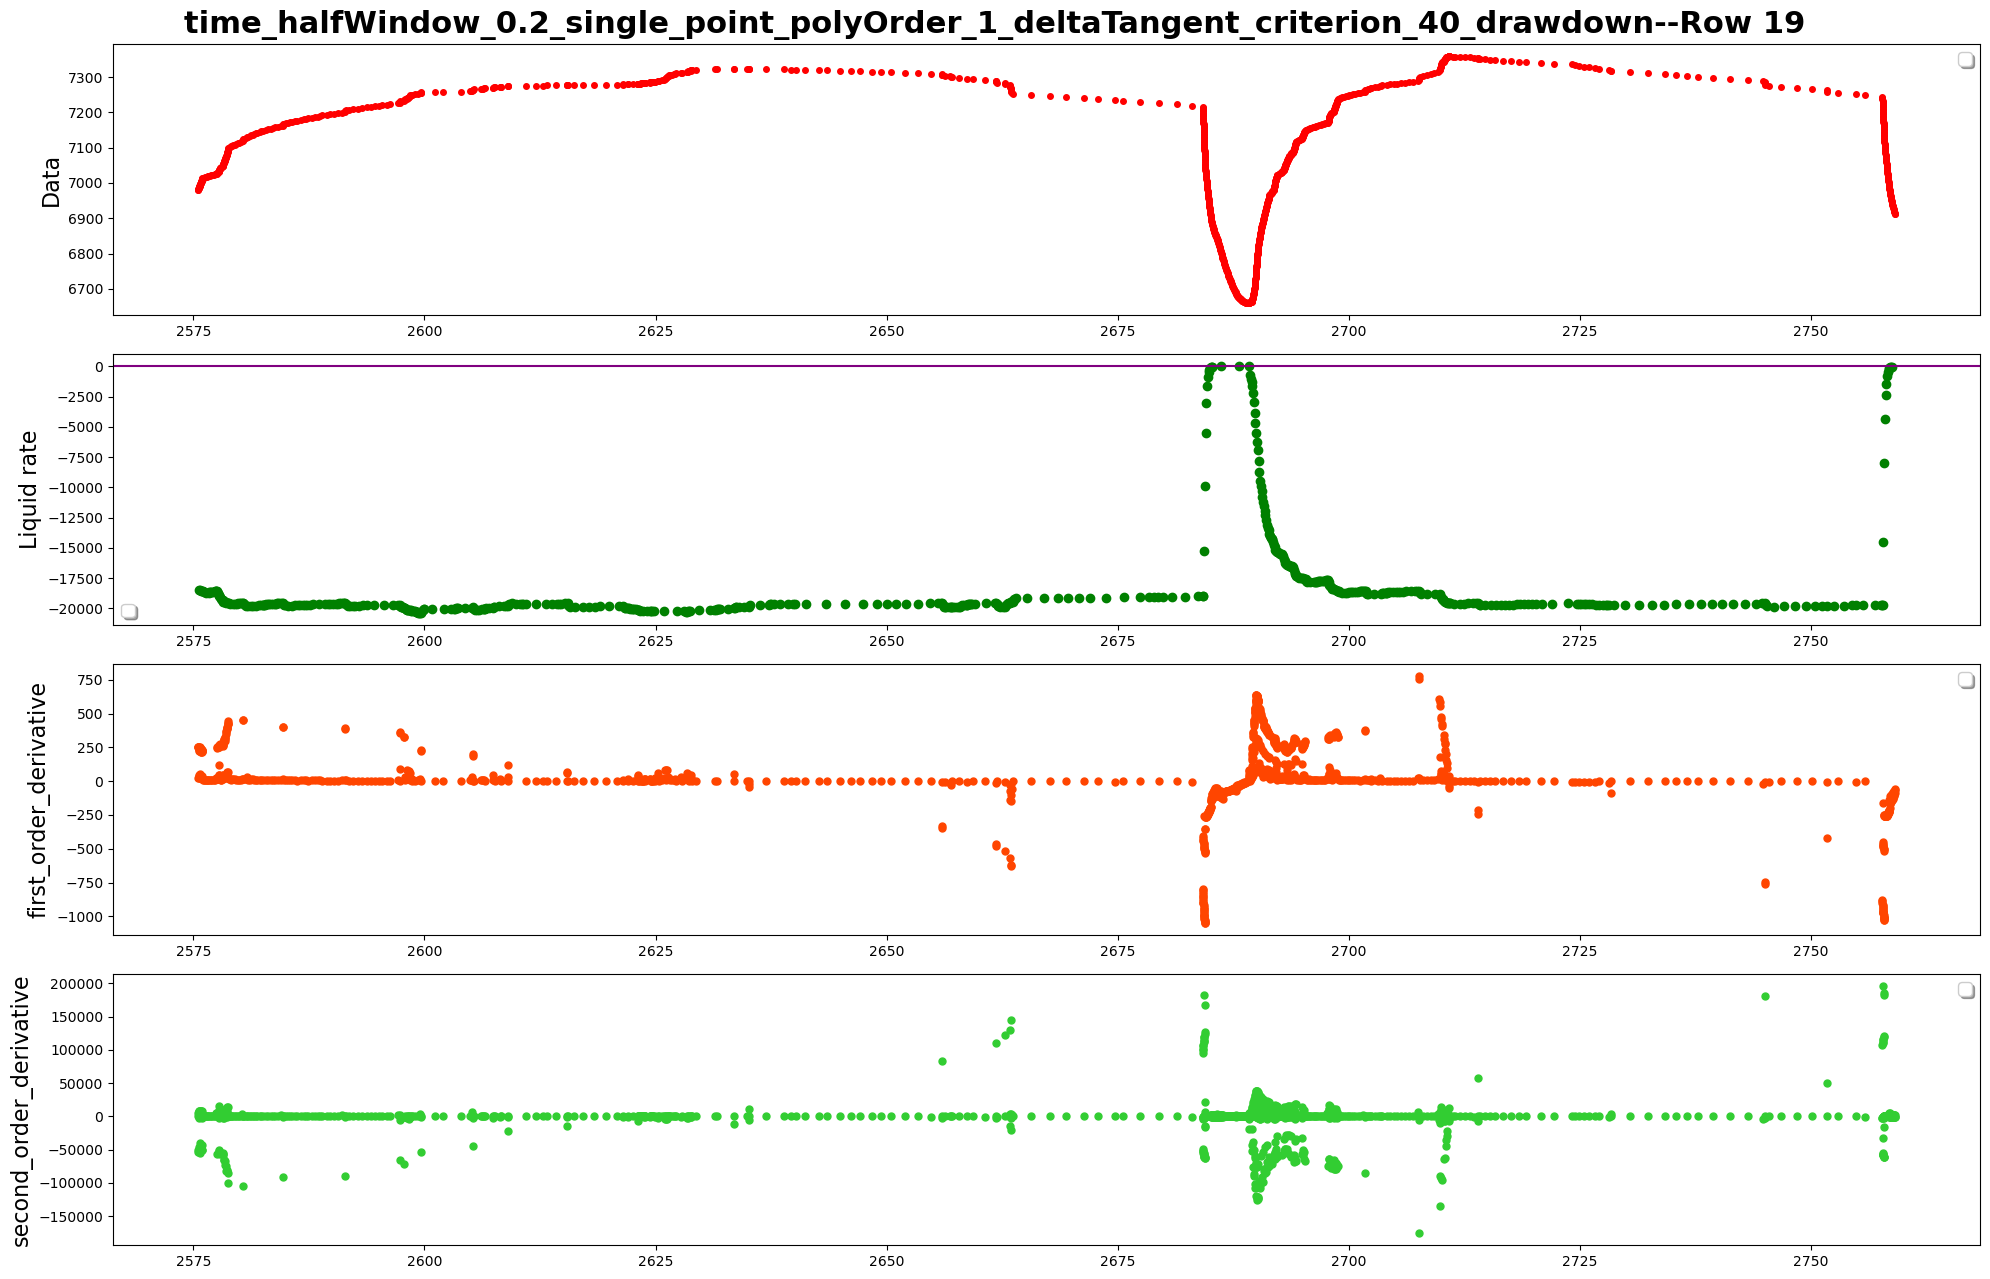

------row 20-----detected points:[]


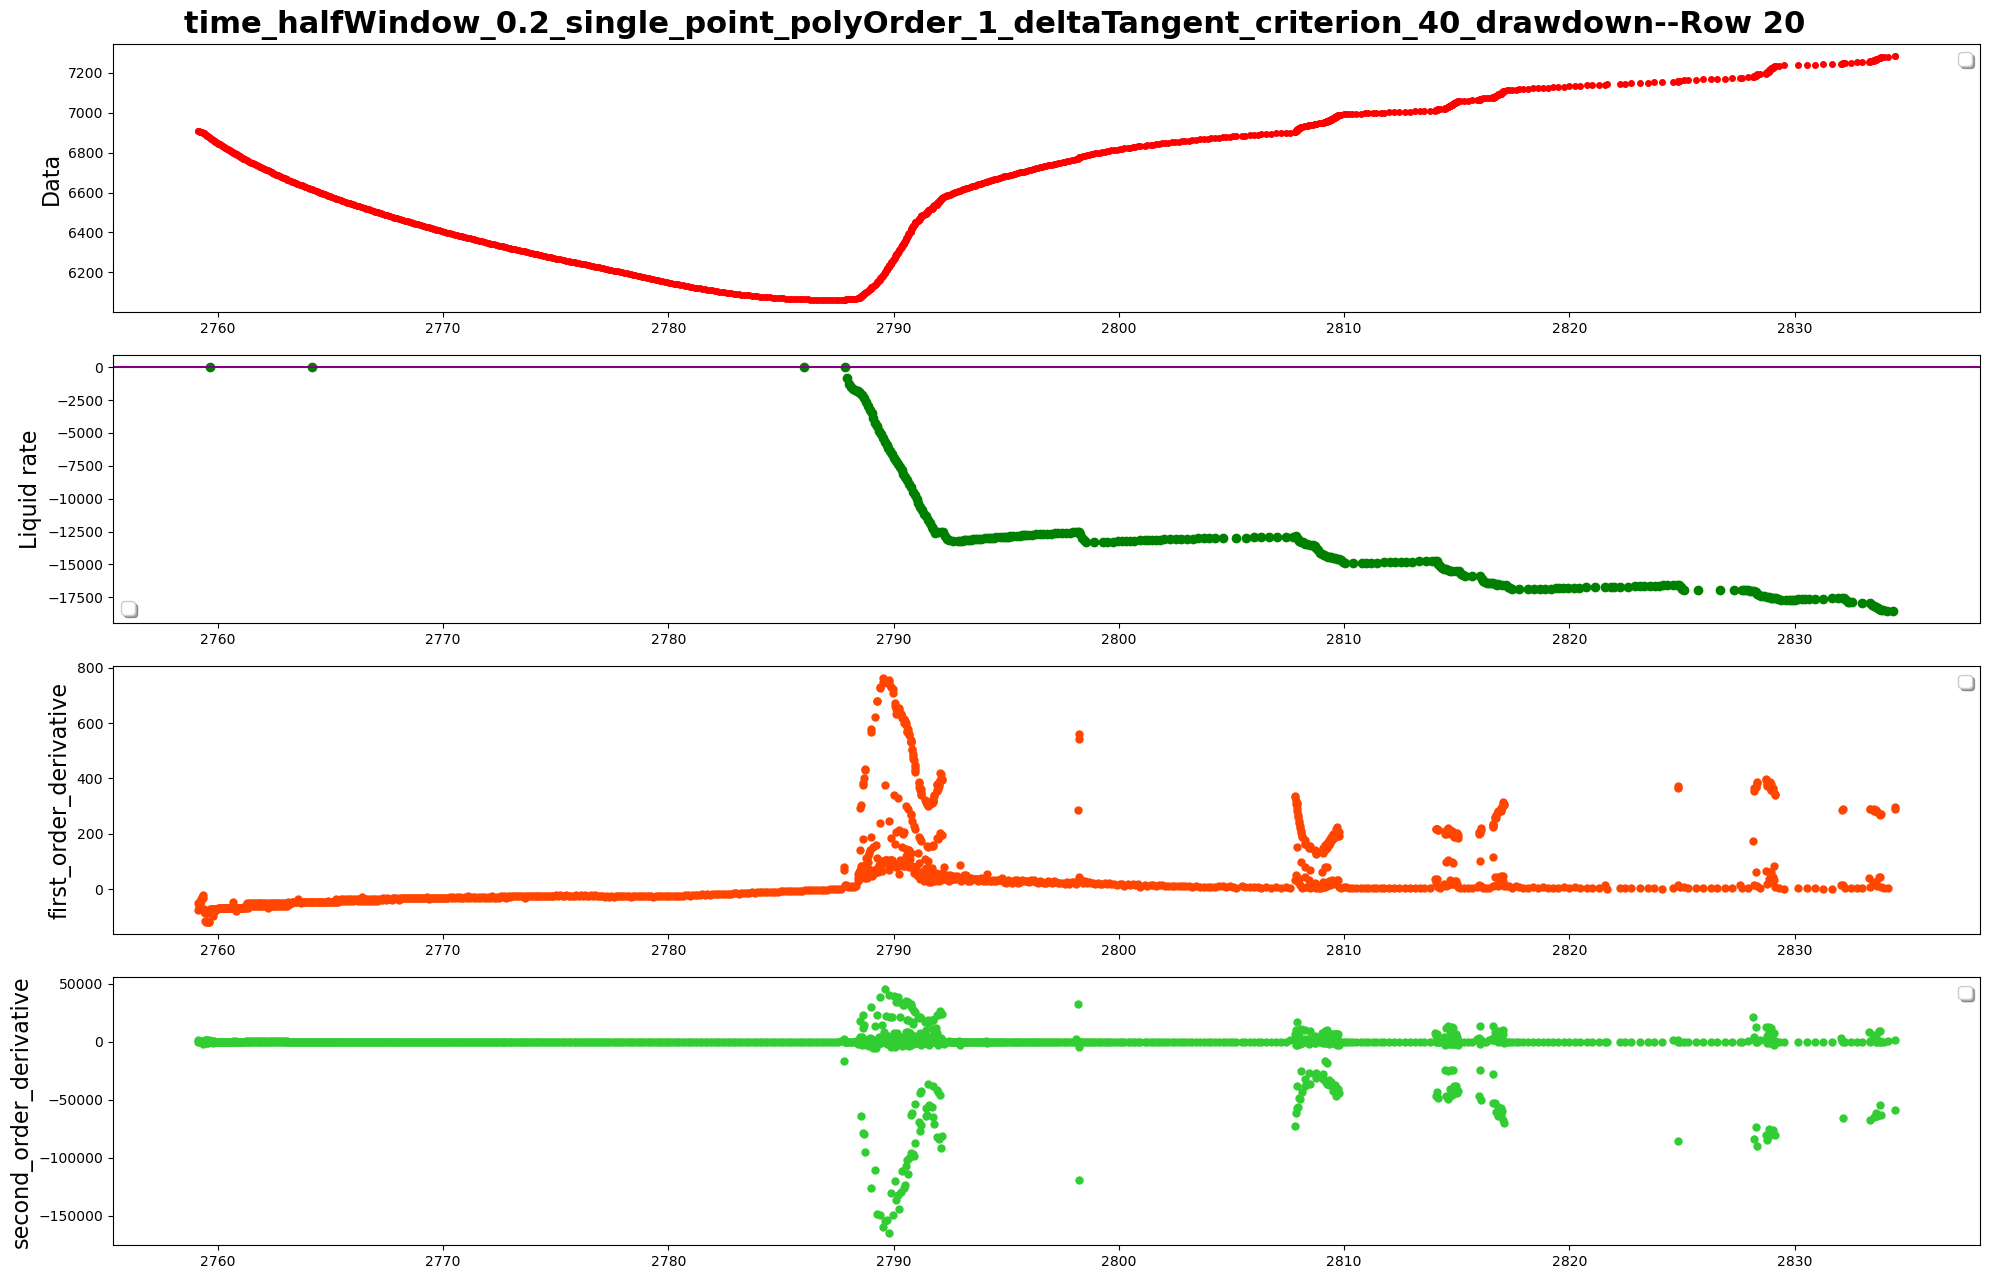

------row 21-----detected points:[24216]


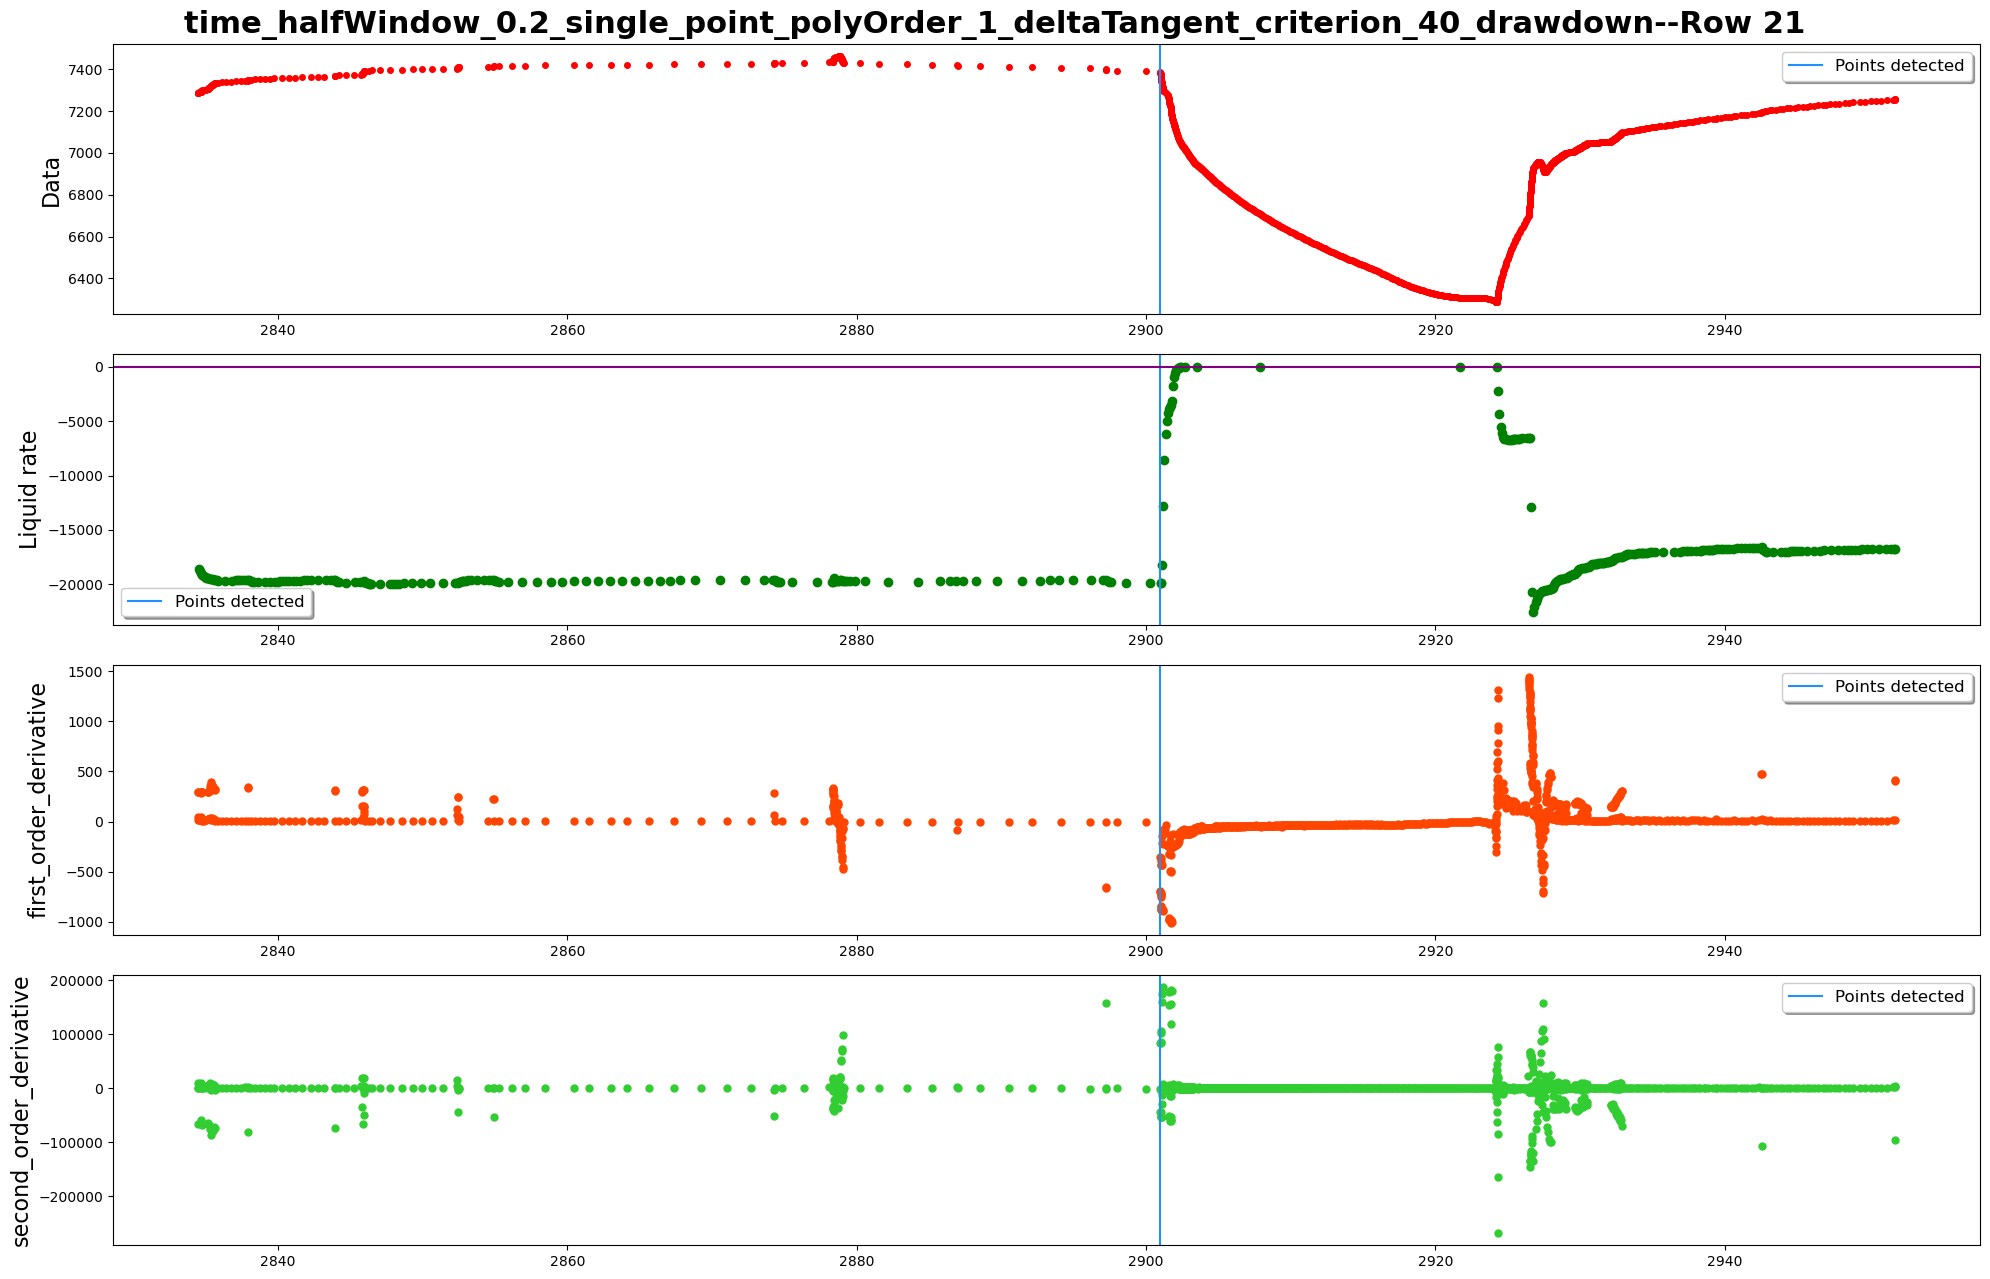

------row 22-----detected points:[25748, 25894]


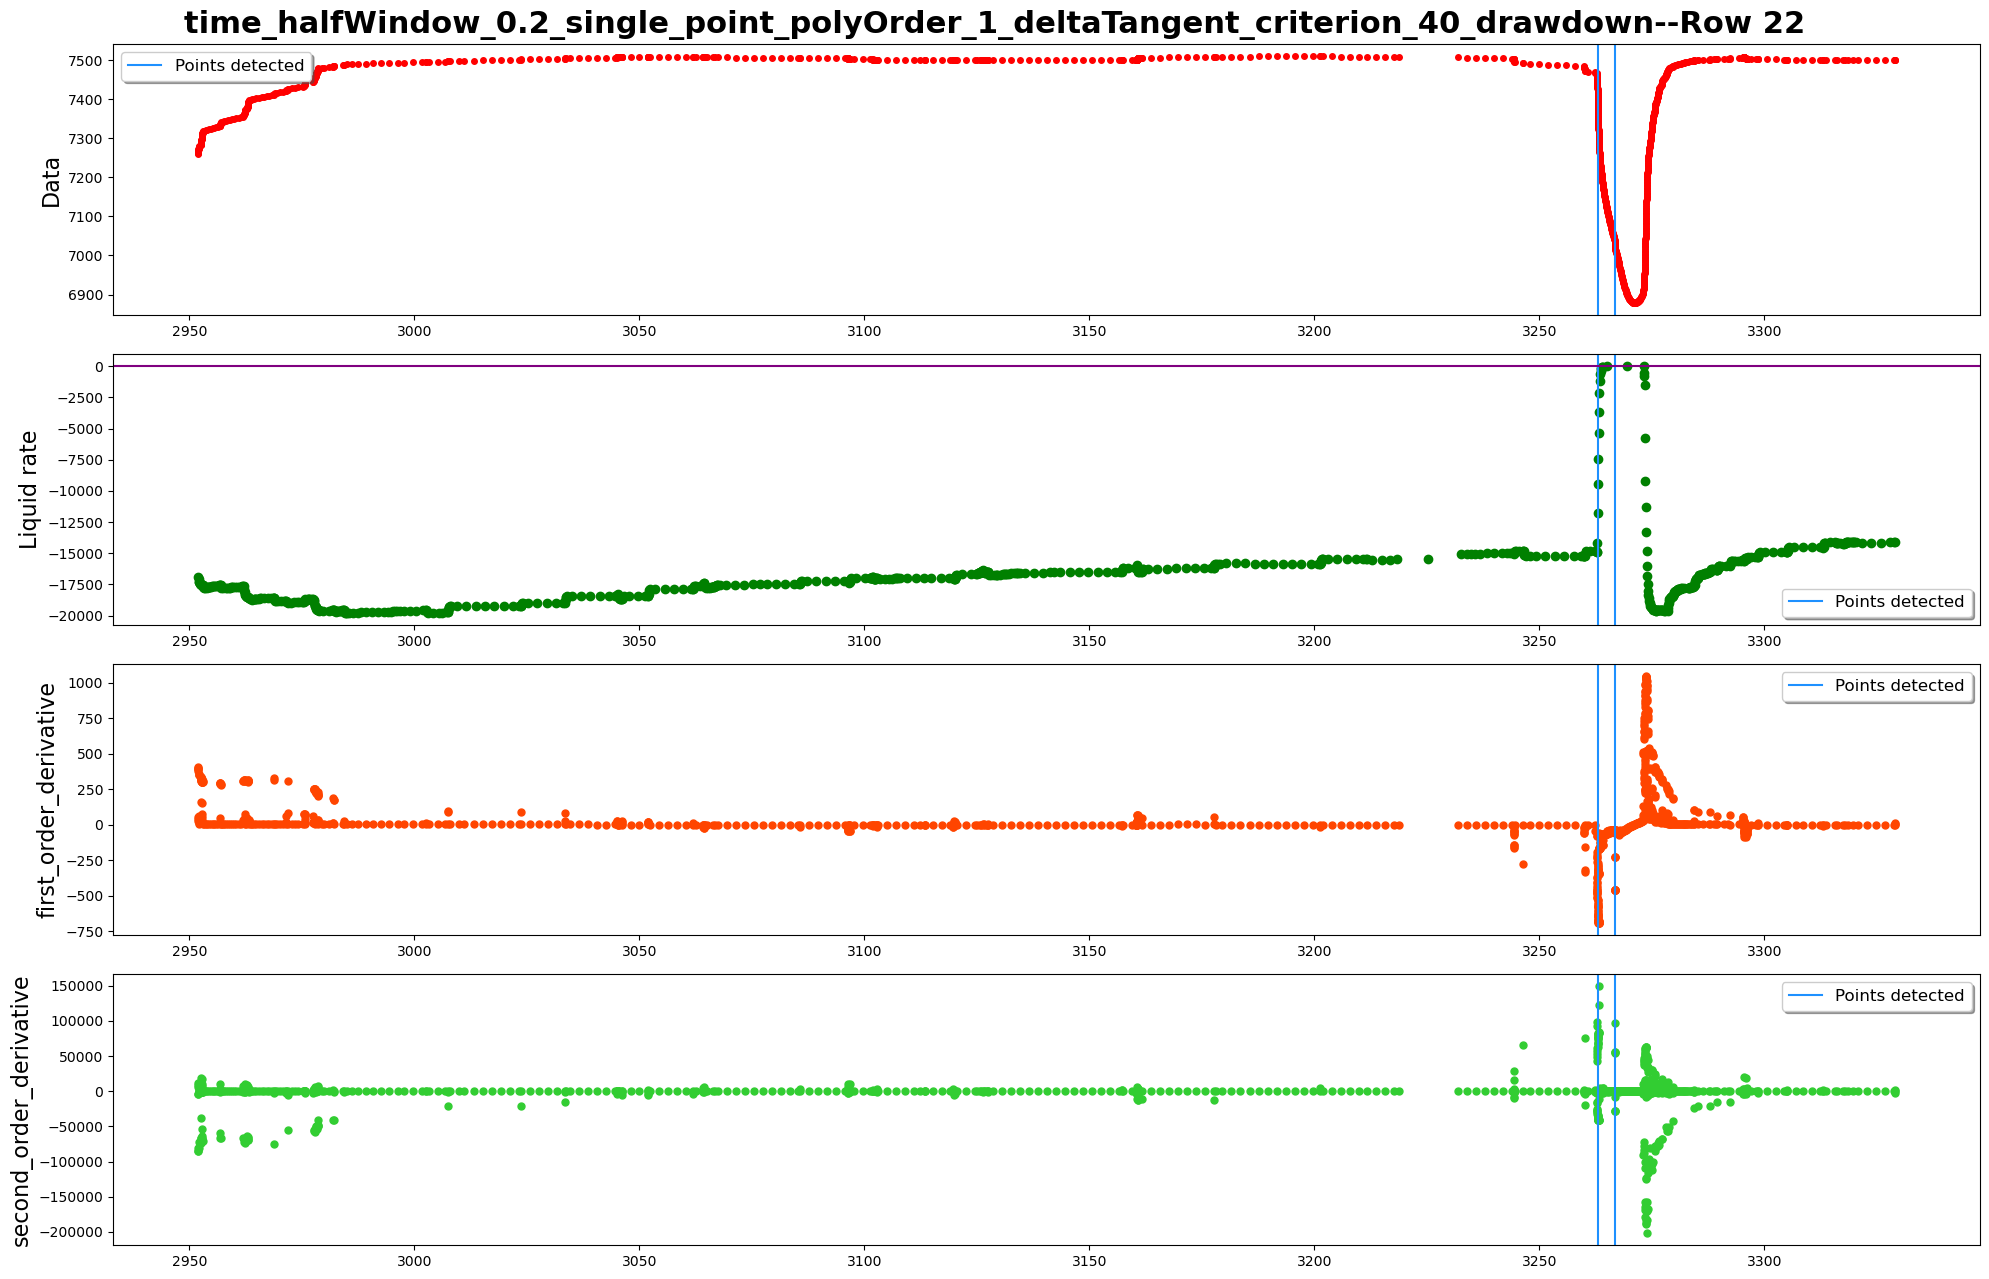

------row 23-----detected points:[]


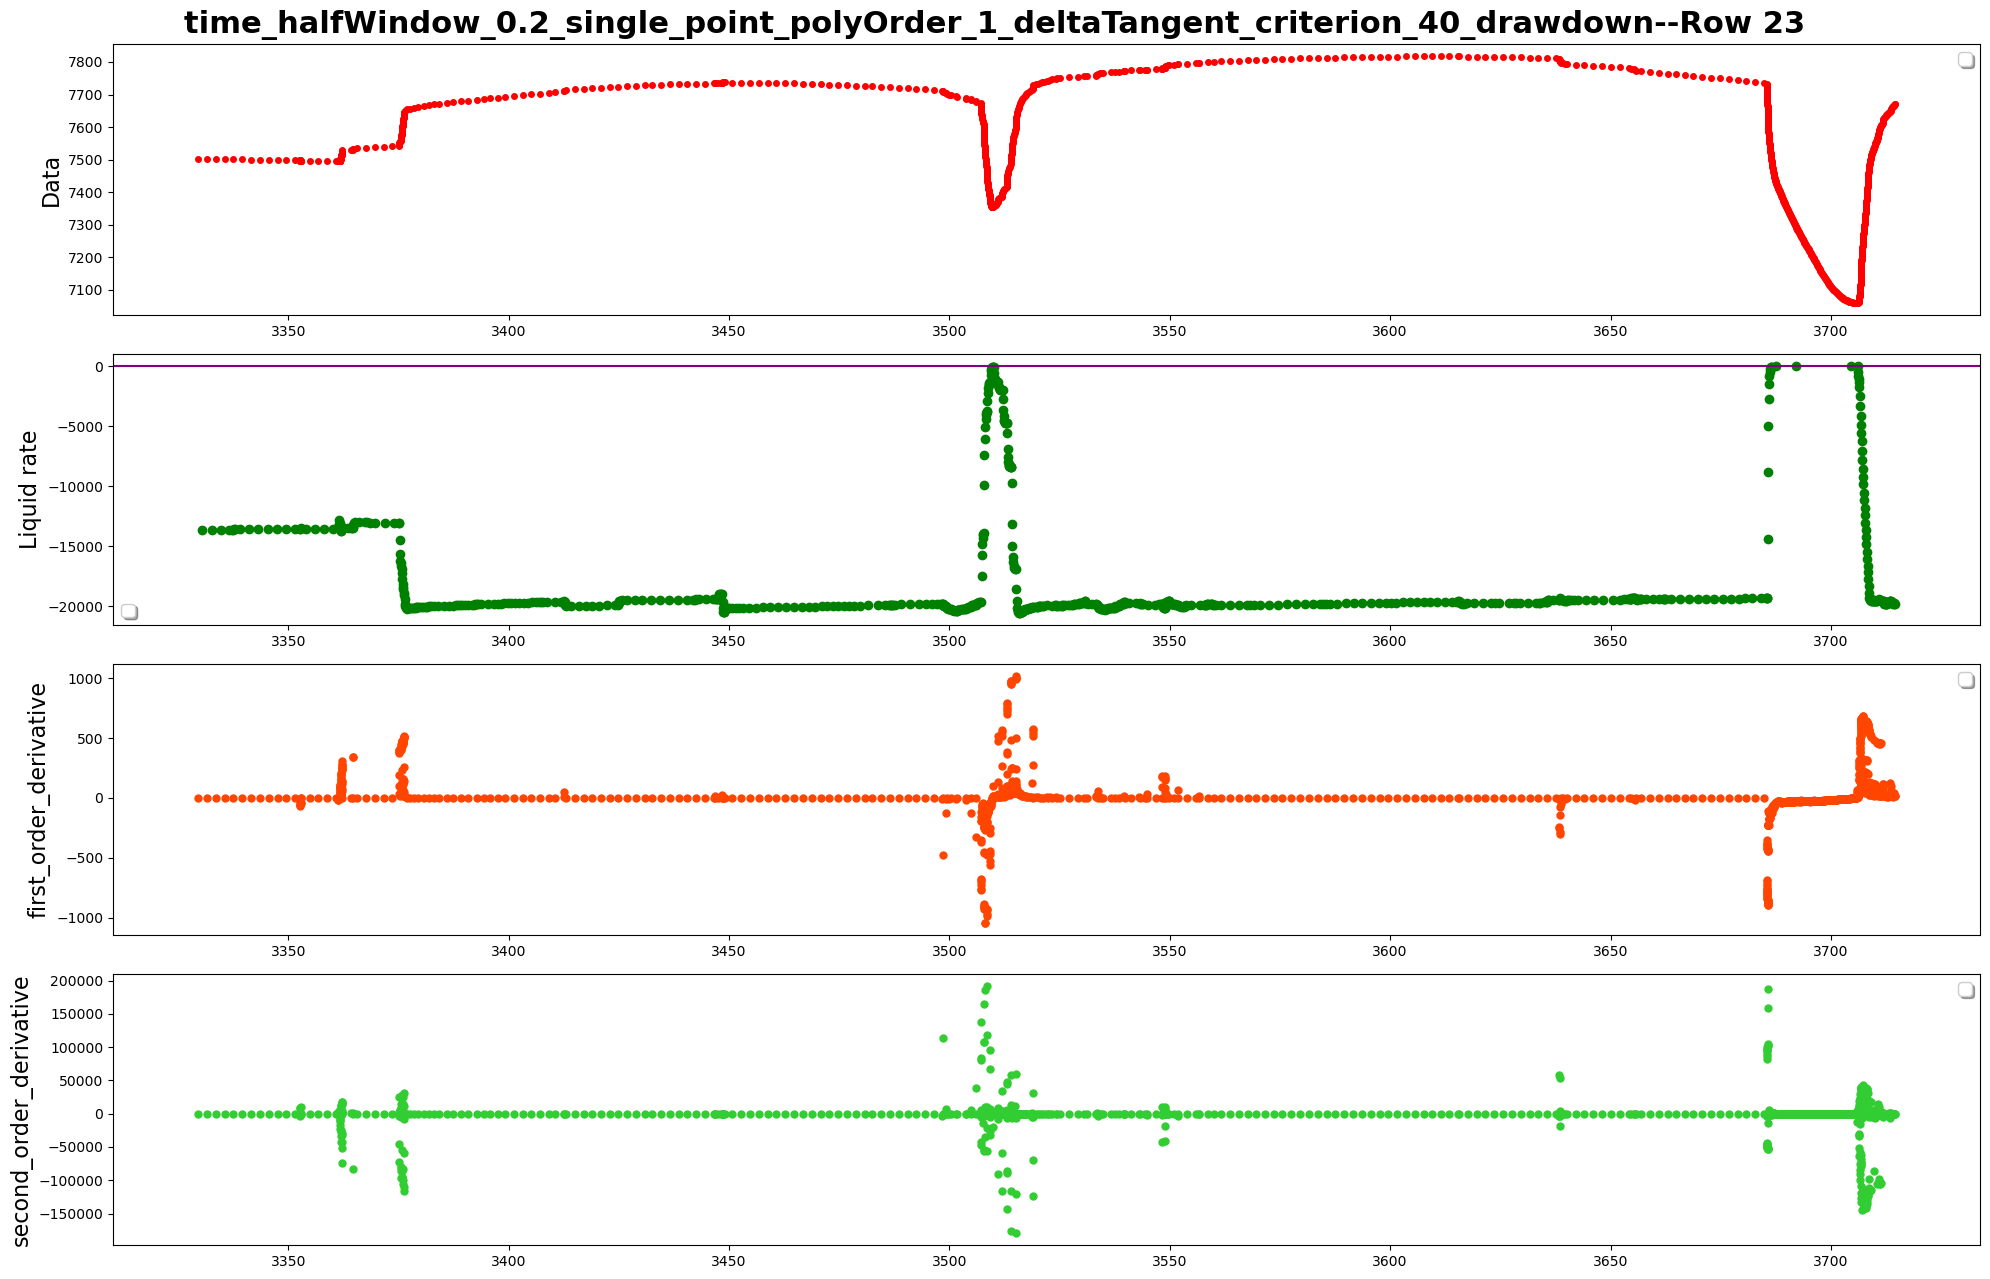

------row 24-----detected points:[27825]


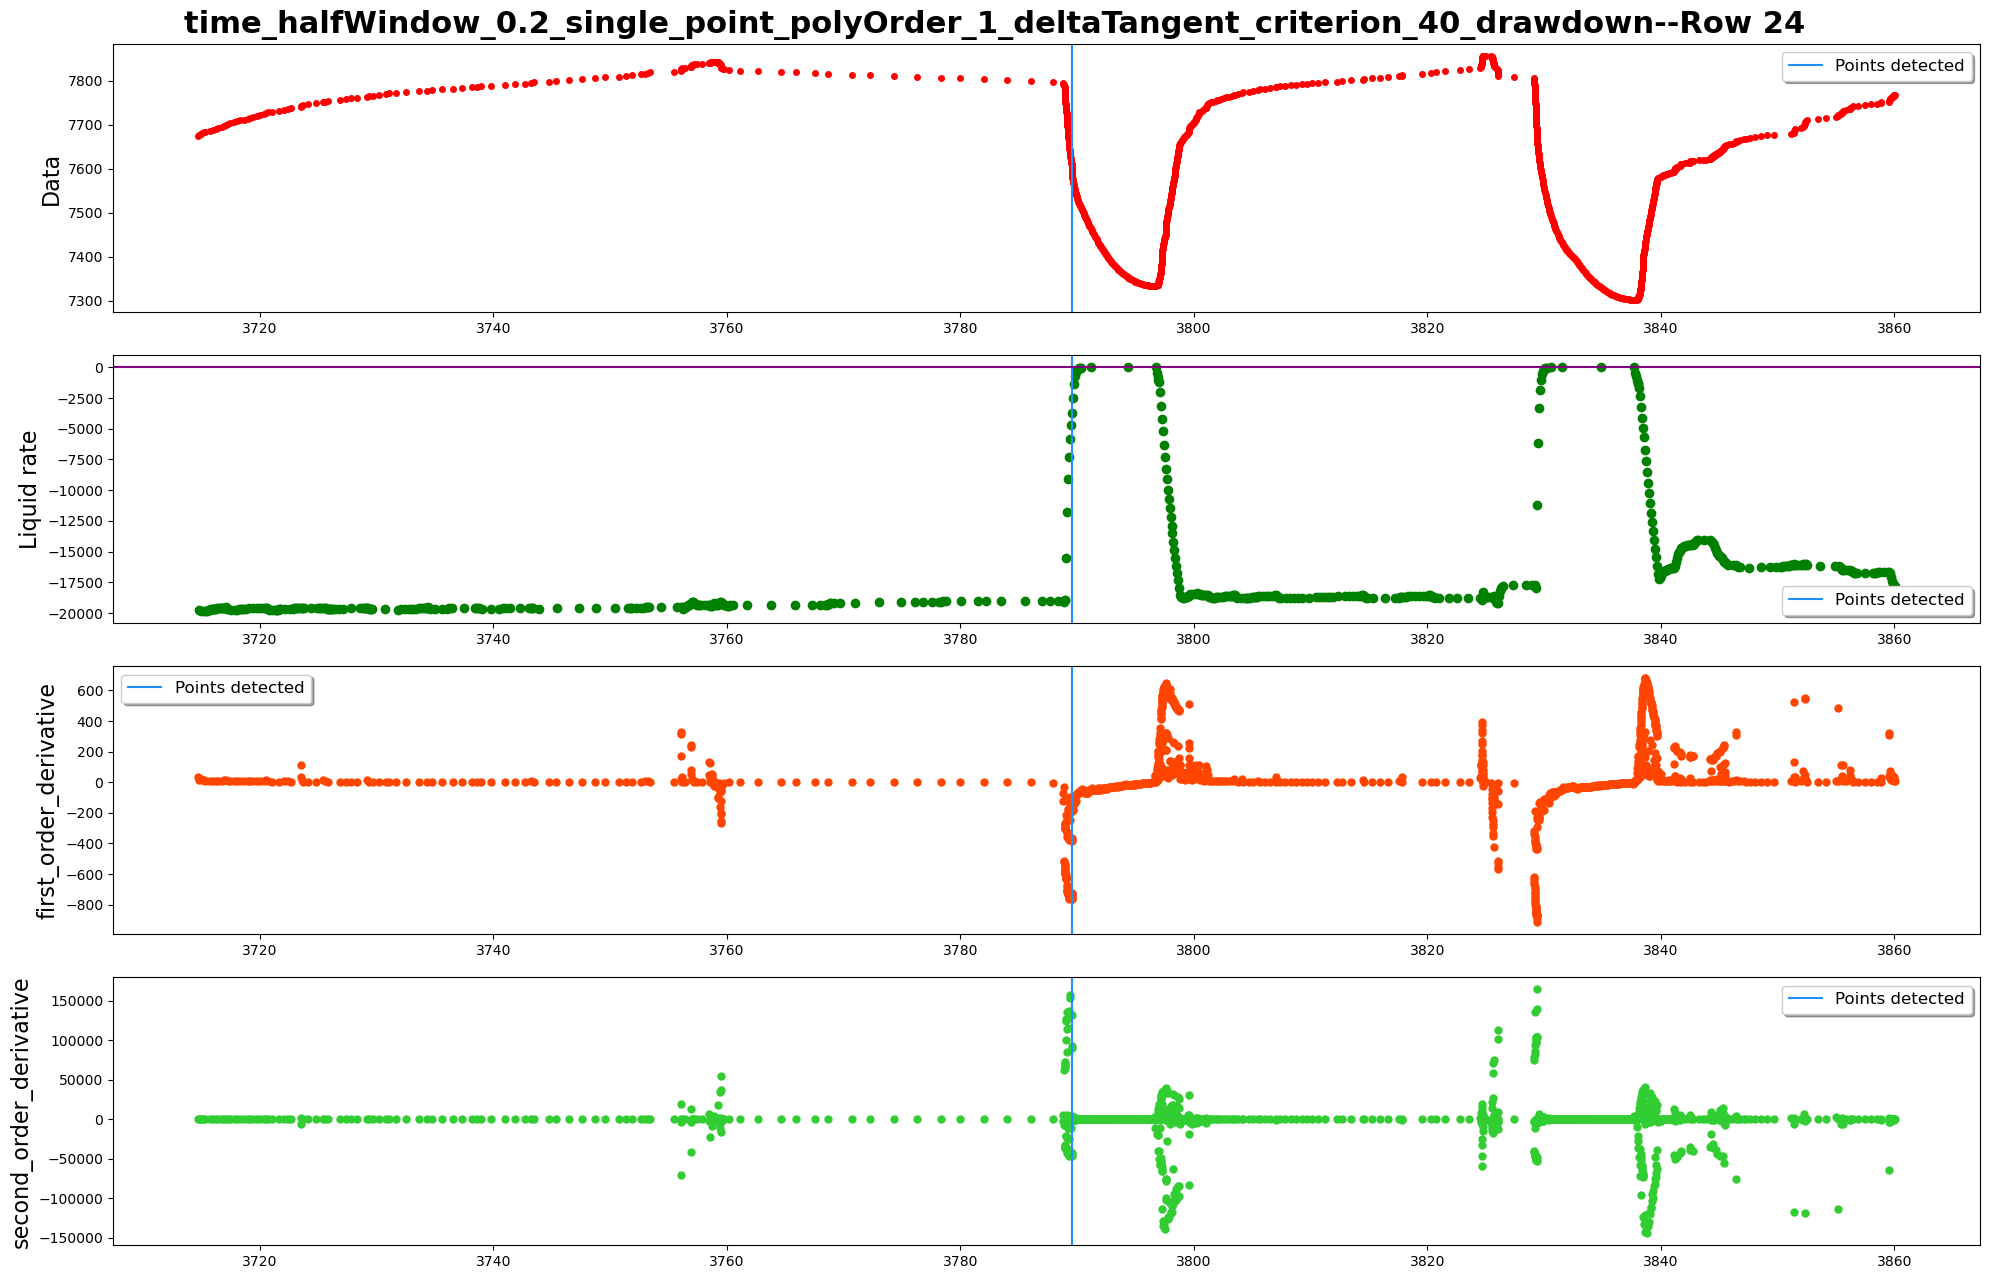

------row 25-----detected points:[28838]


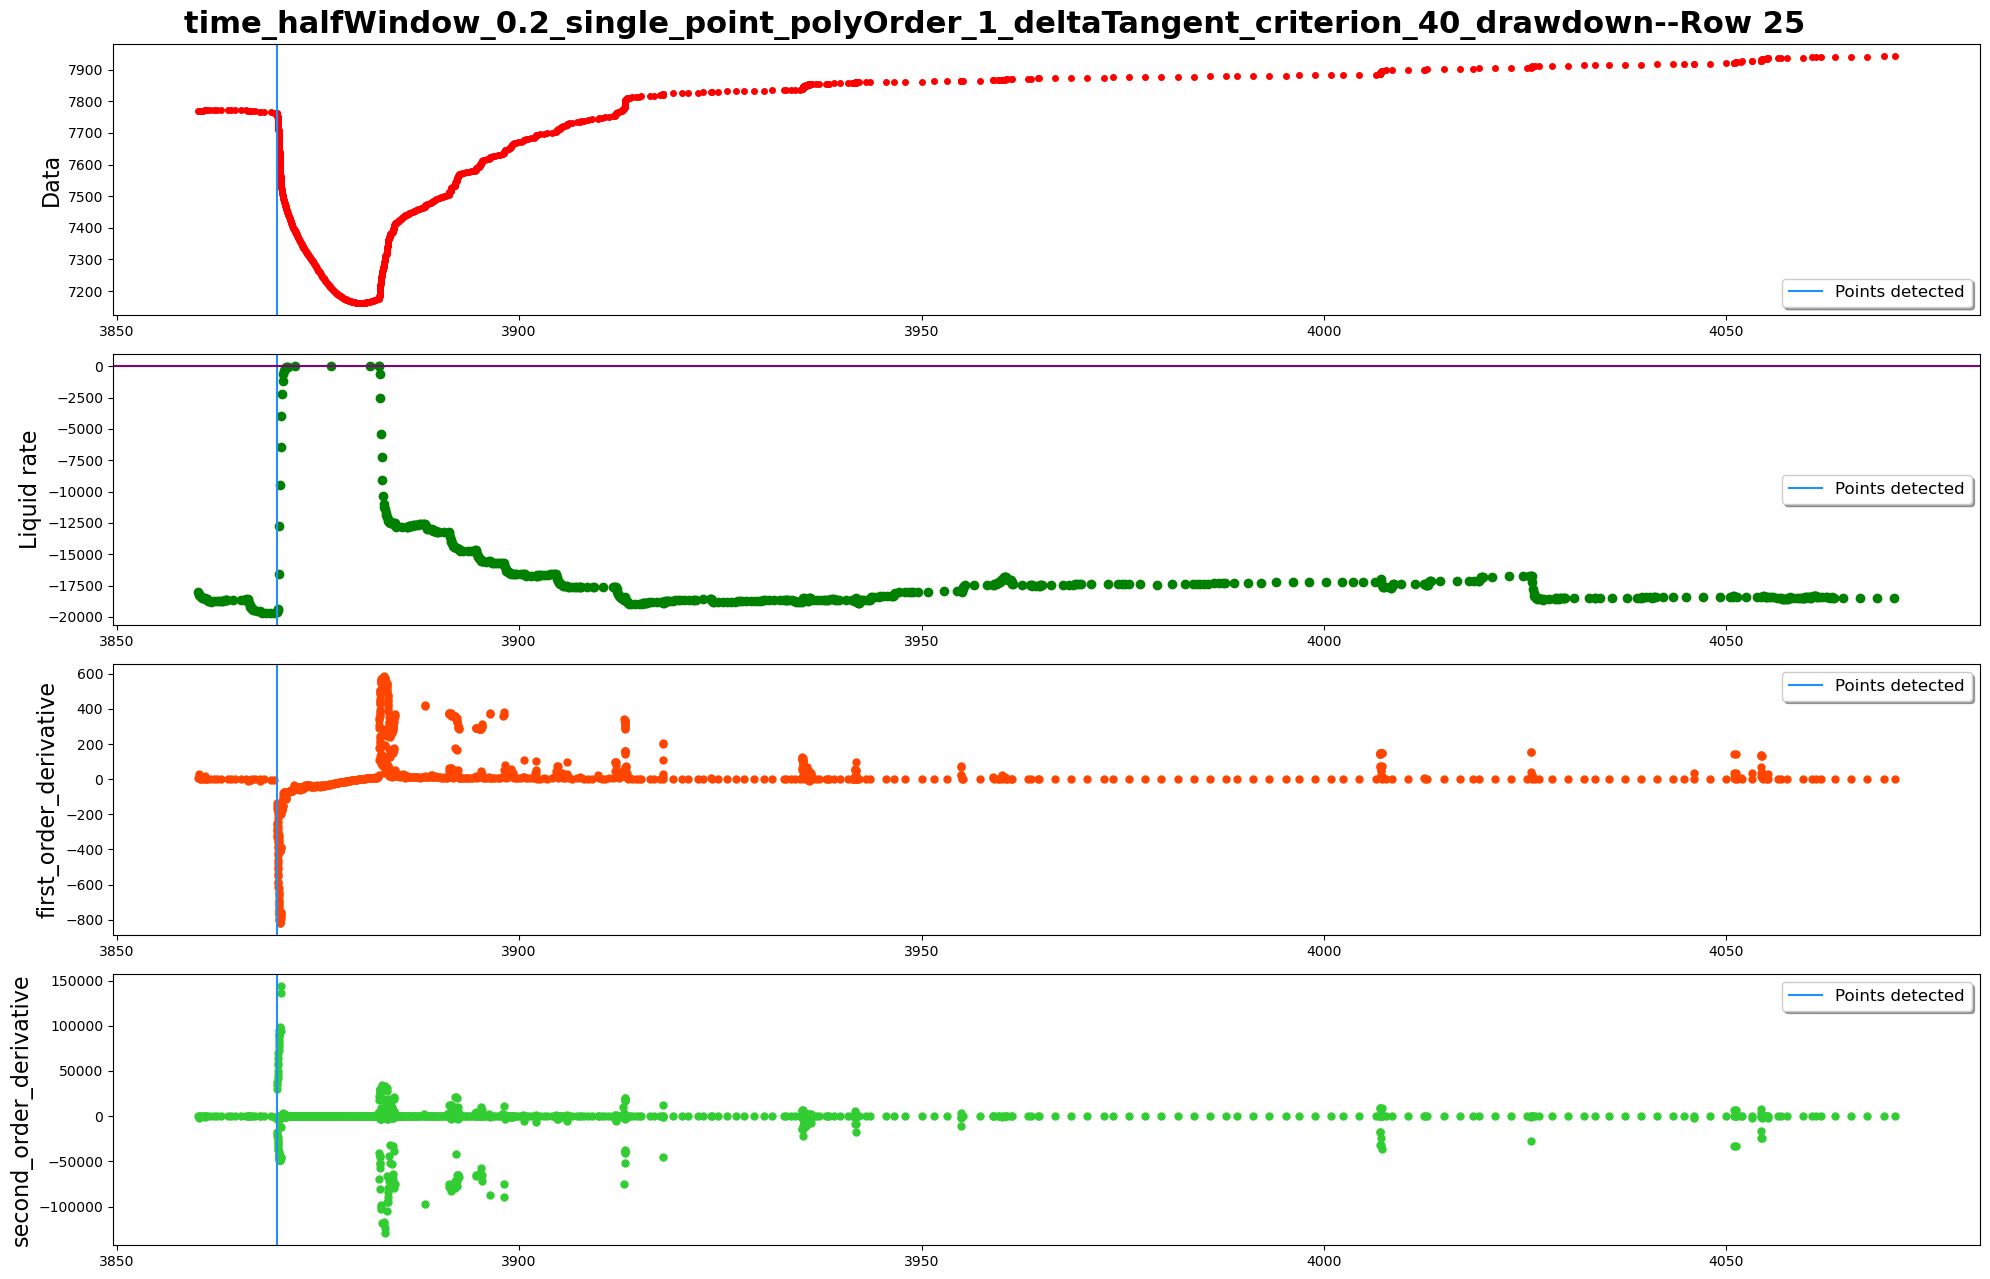

In [6]:
#plot & save
plot_whole=True
plot_details=True
plot_statistics=False

names=["buildup","drawdown"]
for points,name in zip([buildup_DT,drawdown_DT],names):    
    filename_toSave_whole=f"../data_output/MFOD_N_DeltaTangent_RealField_Denoised/deltaTangent_criterion_{deltaTangent_criterion}/time_halfWindow_{time_halfWindow}_{tangent_type}_polyOrder_{polynomial_order}_{name}_whole.pdf"
    filename_toSave_details=f"../data_output/MFOD_N_DeltaTangent_RealField_Denoised/deltaTangent_criterion_{deltaTangent_criterion}/time_halfWindow_{time_halfWindow}_{tangent_type}_polyOrder_{polynomial_order}_{name}_details.pdf"
    plot_name=f"time_halfWindow_{time_halfWindow}_{tangent_type}_polyOrder_{polynomial_order}_deltaTangent_criterion_{deltaTangent_criterion}_{name}"
    PlotNSave(pressure_df,
      rate_df,
      points,
      [],
      data_inOneRow,
      plot_name,
              txt,
      filename_toSave_whole,
      filename_toSave_details,
      plot_statistics,
      plot_whole,
      plot_details,
      colum_names)
     